In [6]:
.libPaths(c("/home/jpm73279/.conda/envs/final_r_install/lib/R/library"))

In [7]:
library("here")
library(devtools)
library(Seurat)
library(harmony)
library(RcppML)
library(reshape2)
library(tidyverse)
load_all('/home/jpm73279/Socrates')
data_path <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/sorghum_bicolor/QC_output/"

set.seed(12345)



Warning message:
“package ‘devtools’ was built under R version 4.1.3”


ERROR: Error: package or namespace load failed for ‘devtools’ in dyn.load(file, DLLpath = DLLpath, ...):
 unable to load shared object '/home/jpm73279/.conda/envs/final_r_install/lib/R/library/Rcpp/libs/Rcpp.so':
  /home/jpm73279/.conda/envs/r_env/lib/R/bin/exec/../../lib/../.././libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /home/jpm73279/.conda/envs/final_r_install/lib/R/library/Rcpp/libs/Rcpp.so)


In [2]:

library(randomcoloR)
other <- randomcoloR::distinctColorPalette(k = 55)
other <- sample(other)

In [3]:
# bed <- system.file("extdata", "test.tn5.bed.gz", package = "Socrates")
#ann <- system.file("extdata", "gencode.v19.annotation.gff3.gz", package = "Socrates")
#chr <- system.file("extdata", "hg19.txt", package = "Socrates")

reference_genome_path <- "/home/jpm73279/genome_downloads/Sbicolor.v5.1.prelim.annot/"
analysis_path <- "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/sorghum_bicolor/"

sb_leaf_rep_1 <- paste0(analysis_path, "Sorghum_leaf.sciATAC.merged.unique.tn5.sorted.bed")

# set-up arguments

#ann <- "Zm-B73-REFERENCE-NAM-5.0_Zm00001eb.1.nuclear.gff3"
#chr <- "Zm-B73-REFERENCE-NAM-5.0.chrom.size"
#pre <- "Sb.Leaf_rep1"
#output <- as.character(args[5])

ann <- paste0(reference_genome_path,"Sbicolorv5.1.primaryTrs.gff3")
chr <- paste0(reference_genome_path,"Sorghum_bicolor_var_BTx623.chrom.size")
pre <- "Sb.Leaf_merged_reps"



#Load Object
Sb.subcluster <- loadBEDandGenomeData(sb_leaf_rep_1, ann, chr)
#zea_m.rep.peaks  <- paste0(pre, "macs2_temp", sep=".")

Running pre-check on input files and executable paths ...

BED file path = /scratch/jpm73279/comparative_single_cell/01.alignments_annotations/sorghum_bicolor/Sorghum_leaf.sciATAC.merged.unique.tn5.sorted.bed ... ok

GFF file path = /home/jpm73279/genome_downloads/Sbicolor.v5.1.prelim.annot/Sbicolorv5.1.primaryTrs.gff3 ... ok

Chromosome sizes file path = /home/jpm73279/genome_downloads/Sbicolor.v5.1.prelim.annot/Sorghum_bicolor_var_BTx623.chrom.size ... ok

Macs2 is installed .... ok

 - loading data (this may take a while for big BED files) ...

 - finished loading data



In [2]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1          ✔ readr     2.1.4     
✔ forcats   1.0.0.9000     ✔ stringr   1.5.0     
✔ ggplot2   3.4.1          ✔ tibble    3.2.1     
✔ lubridate 1.9.2          ✔ tidyr     1.3.0     
✔ purrr     1.0.1          
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:

marker_list_sb_file <- "/home/jpm73279/genome_downloads/Sbicolor.v5.1.prelim.annot/markers/Sb.leaf_markers_from_zm.markers.txt"
marker_list_sb <- read_delim(marker_list_sb_file, delim='\t', 
                                       col_names = TRUE)

ERROR: Error: '/home/jpm73279/genome_downloads/Sbicolor.v5.1.prelim.annot/markers/Sb.leaf_markers_from_zm.markers.txt' does not exist.


In [4]:
loaded_socrates_data <- readRDS("/scratch/jpm73279/comparative_single_cell/02.QC_clustering/sorghum_bicolor/clustering/Sb.annotation_V3t.LC_results.rds")

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details, e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 8709 Columns: 24
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (5): cellID, total, umap1, LouvainClusters, Louvain_cluster_safe
dbl (19): tss, acrs, ptmt, nSites, log10nSites, pTSS, FRiP, pOrg, tss_z, acr...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [6]:

sb.loaded_socrates_data.epidermal <- loaded_socrates_data
cleaned_cluster_meta <- sb.loaded_socrates_data.epidermal$Clusters  %>% 
        group_by(LouvainClusters)  %>% 
        mutate(Louvain_cluster_safe = str_c("LouvainC_", LouvainClusters))
    
sb.loaded_socrates_data.epidermal$Clusters <- cleaned_cluster_meta

## SubClustering Epidermal Lineages:
"LouvainC_2", "LouvainC_12", "LouvainC_20", 
"LouvainC_4", "LouvainC_6", "LouvainC_18",
"LouvainC_15", "LouvainC_1"

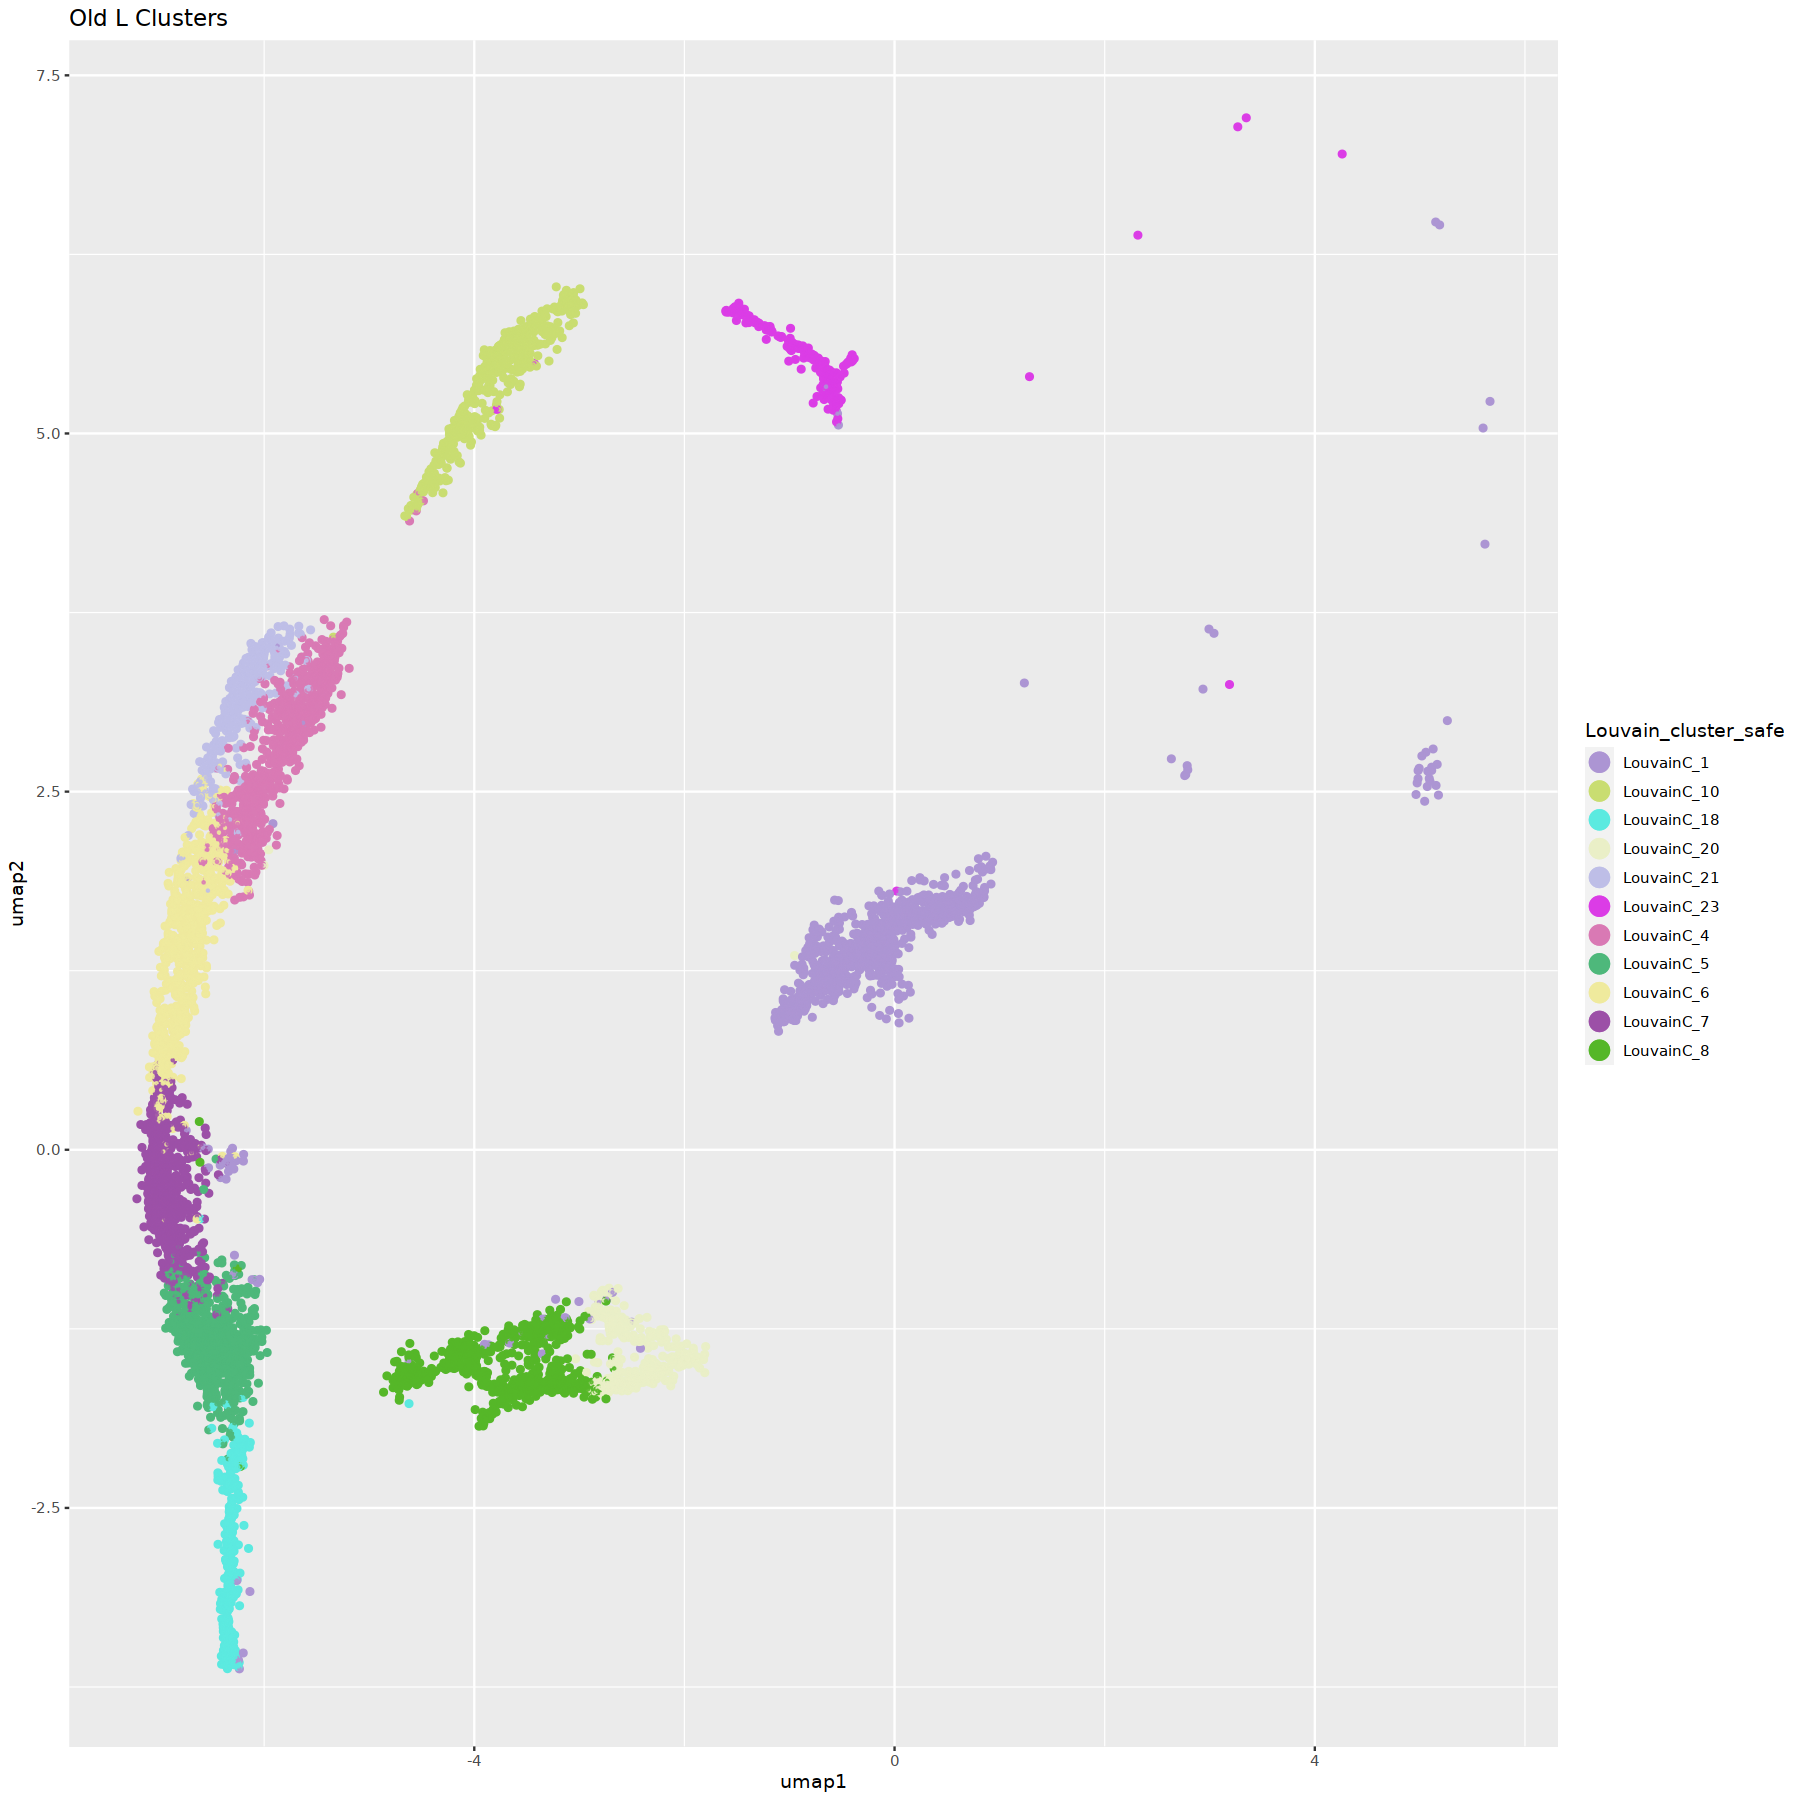

In [10]:
library(cowplot)
library(randomcoloR)
options(repr.plot.width=15, repr.plot.height=15)
other <- randomcoloR::distinctColorPalette(k = 55)
other <- sample(other)


Sb.subcluster.epidermal <- Sb.subcluster

clusters <- c("LouvainC_18","LouvainC_5","LouvainC_7","LouvainC_6","LouvainC_1",
  "LouvainC_4","LouvainC_21","LouvainC_8","LouvainC_20","LouvainC_23",
  "LouvainC_10")

#c("LouvainC_18","LouvainC_5","LouvainC_7","LouvainC_32",
#  "LouvainC_24","LouvainC_21","LouvainC_8","LouvainC_20","LouvainC_23")

sb.loaded_socrates_data.epidermal$Clusters  %>% 
    filter(Louvain_cluster_safe %in% clusters) %>% 
    group_by(Louvain_cluster_safe) %>% 
    ggplot(., aes(umap1, umap2, color = Louvain_cluster_safe)) + geom_point() +
 scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8) + ggtitle("Old L Clusters")

chosen_subcluster <- sb.loaded_socrates_data.epidermal$Clusters %>% 
    filter(Louvain_cluster_safe %in% clusters)

meta_df <- as.data.frame(chosen_subcluster)
rownames(meta_df) <- meta_df$cellID
Sb.subcluster.epidermal$meta <- meta_df
Sb.subcluster.epidermal$meta.v3 <- meta_df

In [11]:
Sb.subcluster.epidermal <- generateMatrix(Sb.subcluster.epidermal, 
                                              filtered=FALSE,
                                              peaks = FALSE,
                                              verbose=TRUE)

In [12]:
Sb.subcluster.epidermal <- convertSparseData(Sb.subcluster.epidermal, verbose = TRUE)

 - converting triplet format to sparseMatrix



In [13]:
# clean sparse counts matrix ---------------------------------------------
Sb.subcluster.epidermal.clean <- cleanData(Sb.subcluster.epidermal, 
                     min.t=0.005,  # minimum feature frequency across cells
                     #max.t=0.1, # maximum feature frequency across cells
                     verbose=T)


   * Input: cells = 6311 | peaks = 694096

   * Filtered: cells = 6311 | peaks = 91228



In [14]:
Sb.subcluster.epidermal.clean$meta  %>% 
    group_by(Louvain_cluster_safe)  %>% 
    summarise(n())
    

Louvain_cluster_safe n()
1  LouvainC_1           940
2  LouvainC_10          577
3  LouvainC_18          415
4  LouvainC_20          379
5  LouvainC_21          334
6  LouvainC_23          298
7  LouvainC_4           710
8  LouvainC_5           693
9  LouvainC_6           700
10 LouvainC_7           677
11 LouvainC_8           588

In [15]:
# normalize with TFIDF ---------------------------------------------------
Sb.subcluster.epidermal.tfidf <- tfidf(Sb.subcluster.epidermal.clean)

In [16]:
# project with NMF -------------------------------------------------------
Sb.subcluster.epidermal.tfidf <- reduceDims(Sb.subcluster.epidermal.tfidf,
                      method="SVD", 
                      n.pcs=50, 
                      svd_slotName="SVD")

 - non-linear dimensionality reduction with UMAP ...

12:01:46 UMAP embedding parameters a = 1.577 b = 0.8951

12:01:46 Read 6311 rows and found 49 numeric columns

12:01:46 Using Annoy for neighbor search, n_neighbors = 30

12:01:46 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:01:47 Writing NN index file to temp file /tmp/RtmpbRSHUn/file2ff8305d0f00

12:01:47 Searching Annoy index using 16 threads, search_k = 3000

12:01:48 Annoy recall = 100%

12:01:55 Commencing smooth kNN distance calibration using 16 threads

12:01:58 Initializing from normalized Laplacian + noise

12:01:59 Commencing optimization for 500 epochs, with 314906 positive edges

12:02:27 Optimization finished



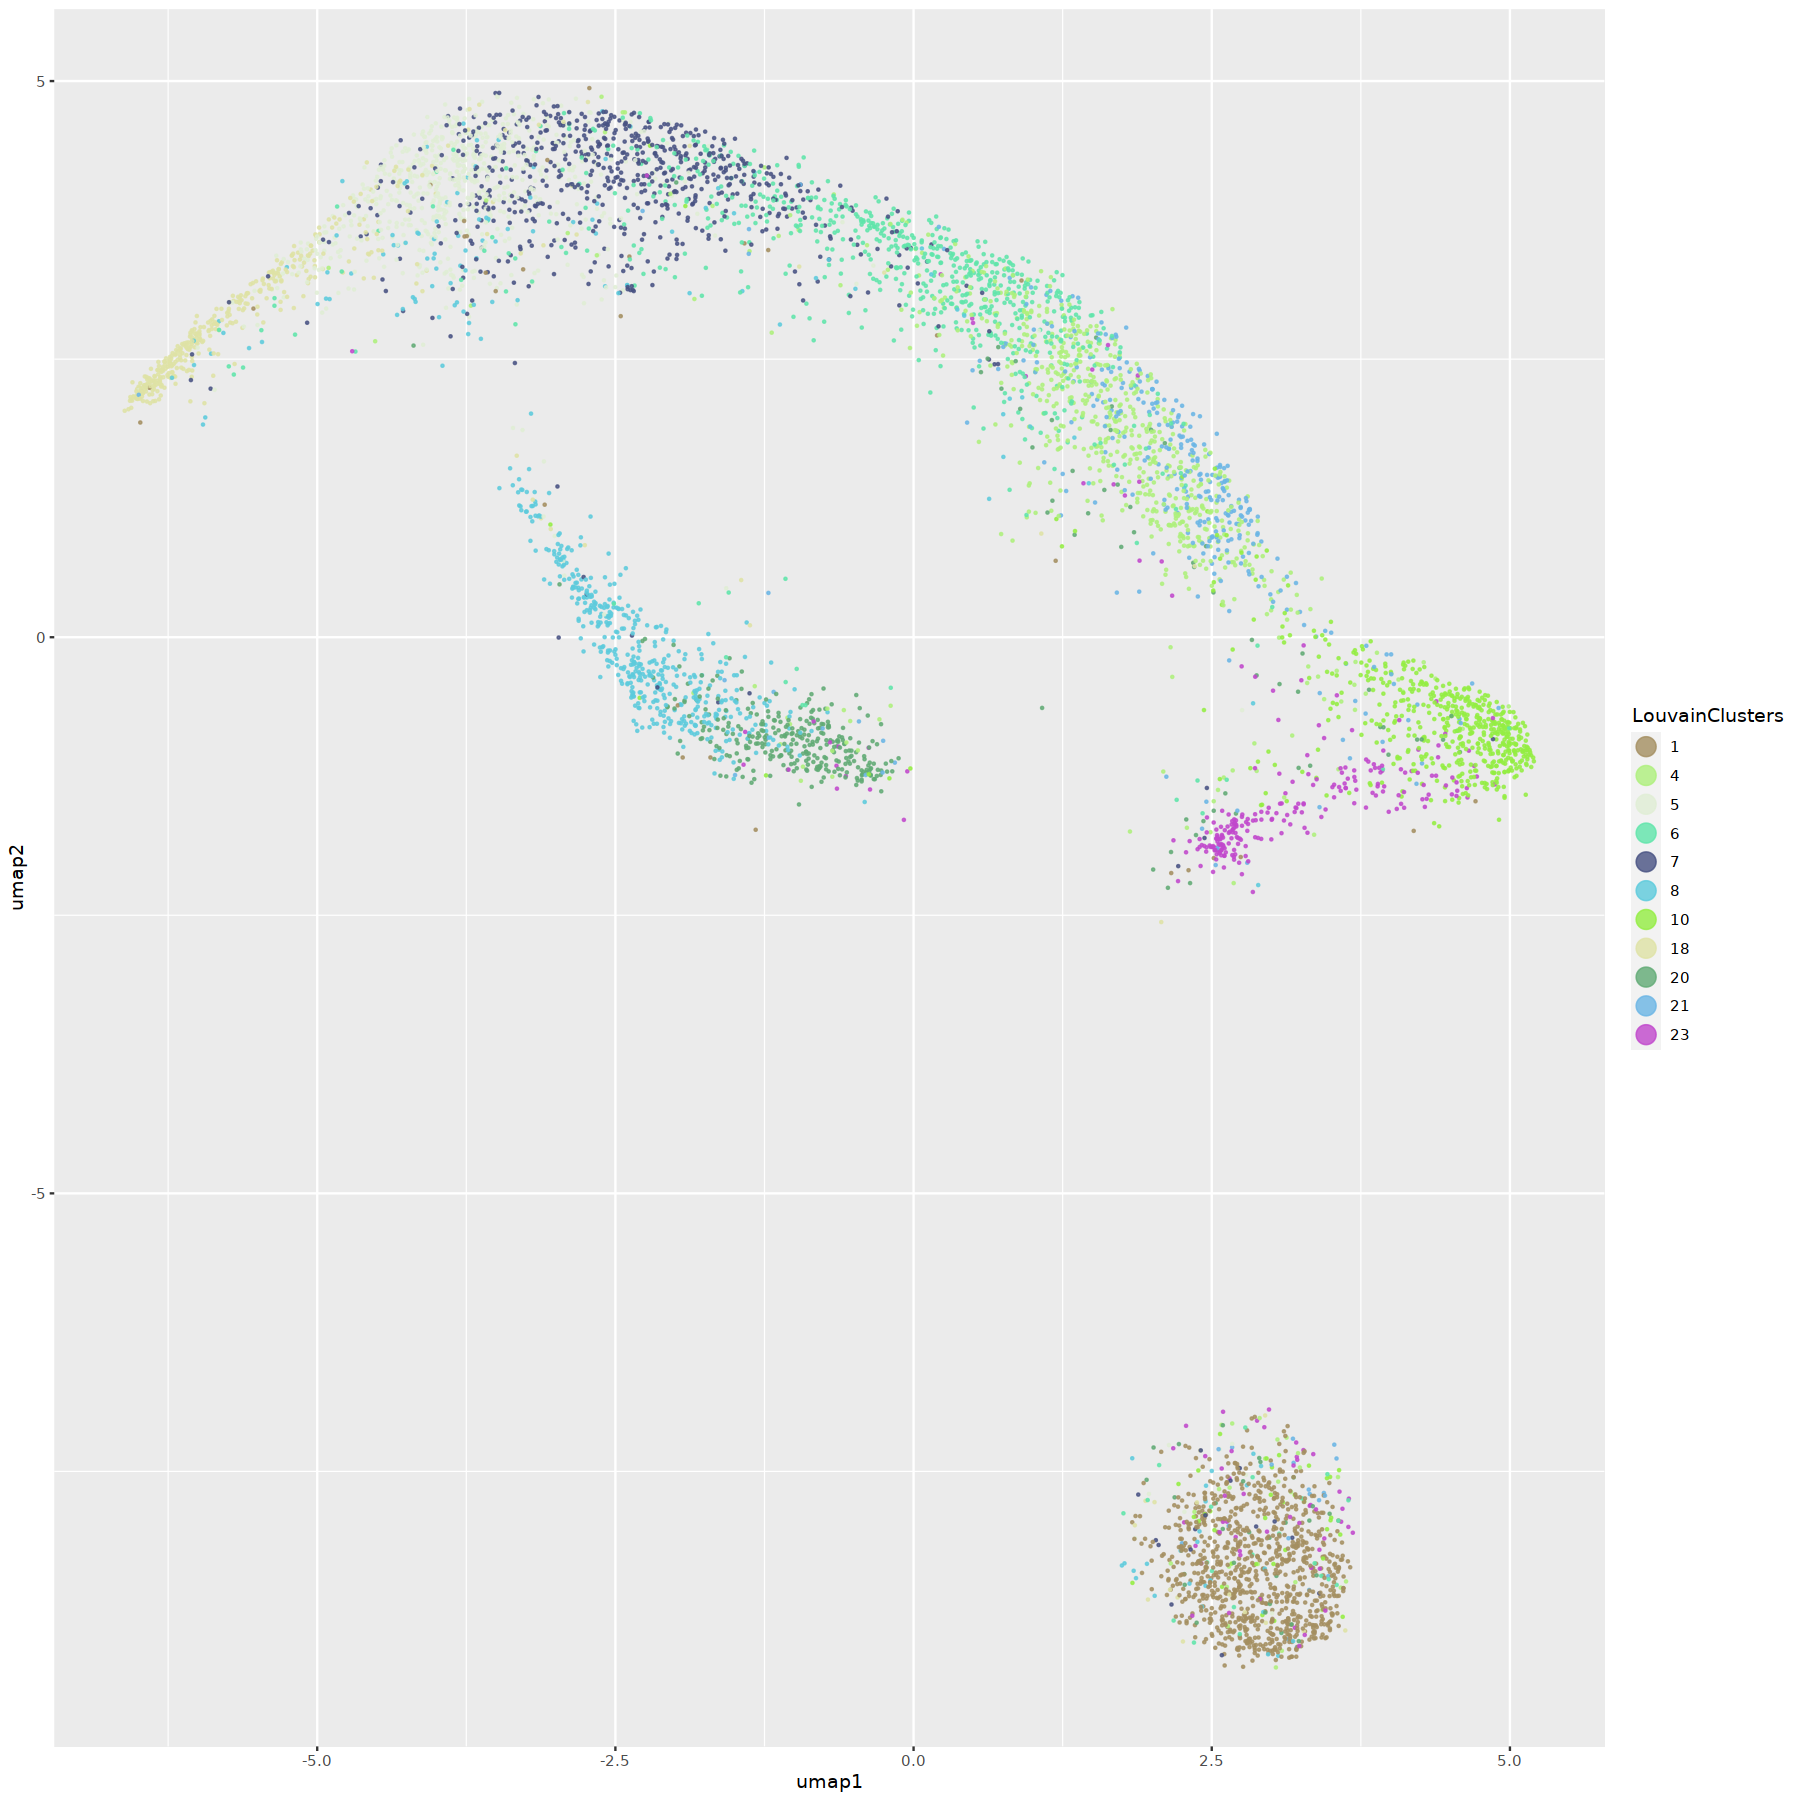

In [17]:
# reduce to 2-dimensions with UMAP ---------------------------------------
Sb.subcluster.epidermal.tfidf <- projectUMAP(Sb.subcluster.epidermal.tfidf, 
                       verbose=T,
                       k.near=30,
                       m.dist=0.1,
                       svd_slotName="SVD")

library(randomcoloR)
other <- randomcoloR::distinctColorPalette(k = 55)
other <- sample(other)

ggplot(Sb.subcluster.epidermal.tfidf$meta, aes(x=umap1, y = umap2, color = LouvainClusters)) +
  scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8)

In [18]:
# identify clusters using neighborhood graph -----------------------------
Sb.subcluster.epidermal.tfidf.clusters <- callClusters(Sb.subcluster.epidermal.tfidf, 
                        res=2.5,
                        k.near = 20,
                        #min.reads=1000,
                        verbose=T,
                        svd_slotName= "SVD",
                        cluster_slotName="sub_cluster",
                        cleanCluster=FALSE)


 - filtering outliers in UMAP manifold (z-score e.thresh = 3) ...

 - creating seurat object for graph-based clustering ...

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6192
Number of edges: 361475

Running Louvain algorithm...
Maximum modularity in 100 random starts: 0.6402
Number of communities: 18
Elapsed time: 7 seconds


4 singletons identified. 14 final clusters.

 - finished graph-based clustering ...

 - filtering clusters with low cell/read counts ...



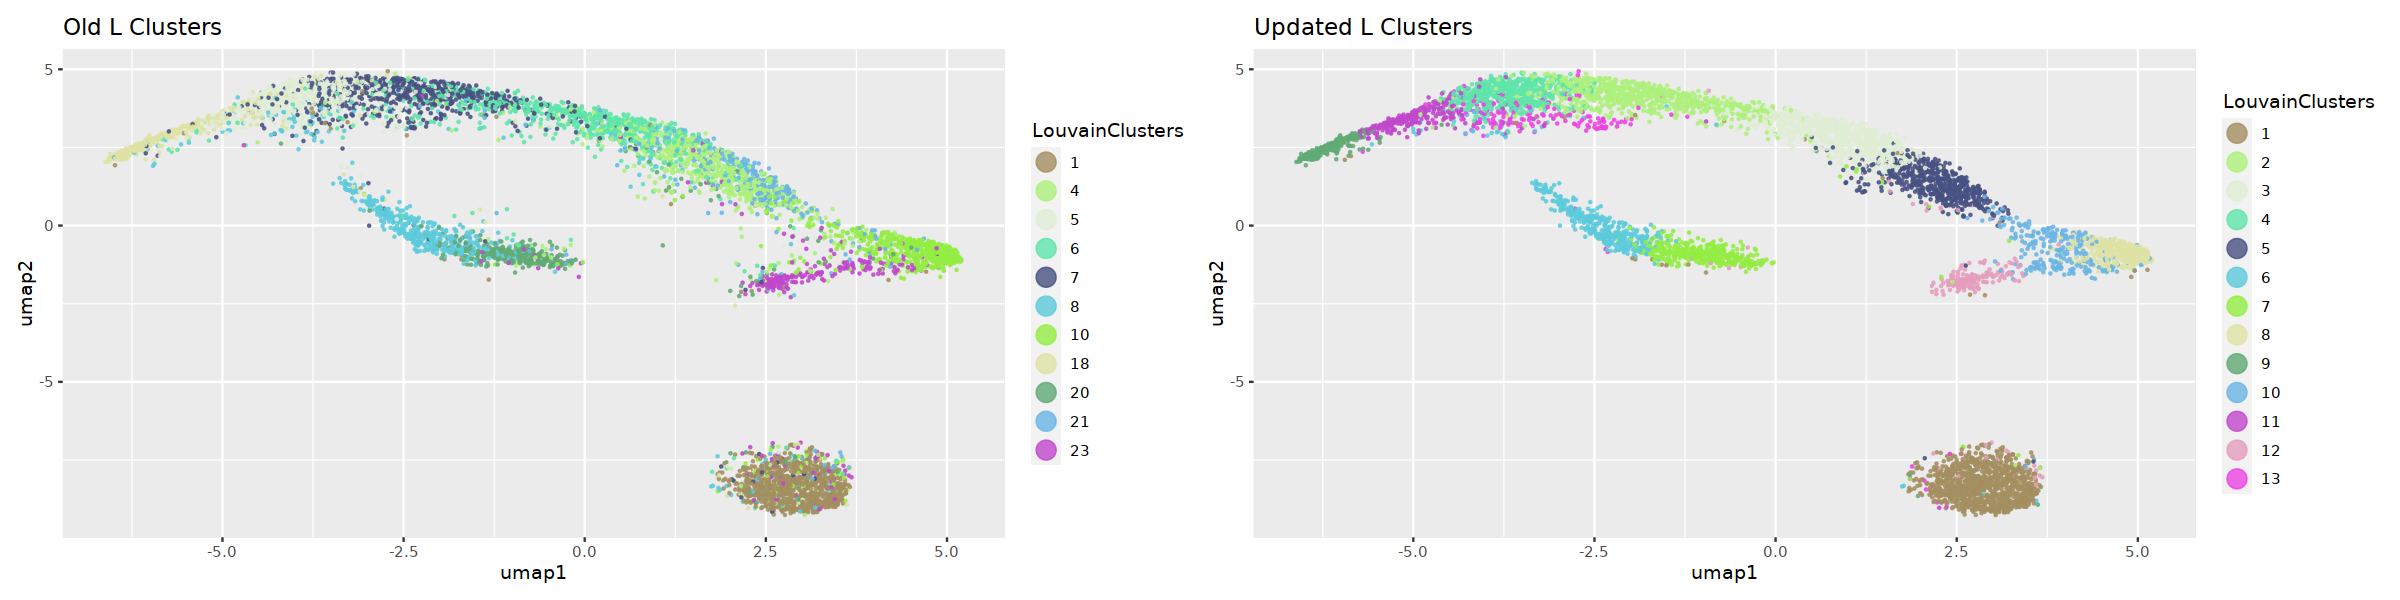

In [19]:
options(repr.plot.width=20, repr.plot.height=5)

old_clusters <- ggplot(Sb.subcluster.epidermal.tfidf.clusters$meta, aes(x=umap1, y = umap2, color = LouvainClusters)) +
  scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8)+ ggtitle("Old L Clusters")

new_clusters <- ggplot(Sb.subcluster.epidermal.tfidf.clusters$sub_cluster, aes(x=umap1, y = umap2, color = LouvainClusters)) +
  scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8) + ggtitle("Updated L Clusters")


old_clusters + new_clusters 

In [20]:
Sb.subcluster.epidermal.tfidf.clusters$sub_cluster  %>% 
    group_by(LouvainClusters)  %>% 
    summarise(n())

LouvainClusters n() 
1  1               1120
2  2                753
3  3                741
4  4                603
5  5                561
6  6                445
7  7                405
8  8                399
9  9                264
10 10               259
11 11               254
12 12               213
13 13               173

In [18]:
library("presto")
run_presto <- function(meta_obj, 
                       meta_slot = "Clusters", 
                       cluster_name = "LouvainClusters", 
                       counts_raw="acr_counts_raw"){
    ### Pull the correct meta datafrom the Socrates Object
    sparse_matrix <- meta_obj[[counts_raw]]
    meta_data <- meta_obj[[meta_slot]]
    
    print(head(as_tibble(meta_data)))
        
    ### Read the Giant Sparse Matrix
    loaded_sparse_matric <- read_delim(sparse_matrix, delim='\t', 
                                       col_names = c("gene_name", "barcode", "accessability"), 
                                       col_types = "ccn")
    
    print(head(loaded_sparse_matric))
    combined_large_w_sparse <- loaded_sparse_matric  %>% 
        filter(gene_name != "Annotation")  %>% 
        dplyr::select(gene_name, barcode, accessability)  %>% 
        left_join(., meta_data, by = c("barcode" = "cellID"))  %>% 
        filter(is.na(!!sym(cluster_name)) != TRUE)  %>% 
        arrange(!!sym(cluster_name))
    
    #order <- combined_large_w_sparse[!!sym(cluster_name)]

    combined_large_w_sparse <- combined_large_w_sparse  %>% 
        dplyr::select(gene_name, barcode, accessability)  %>% 
        mutate(across(accessability, as.numeric))
    
    
    gene_names <- unique(combined_large_w_sparse$gene_name)
    barcodes <- unique(combined_large_w_sparse$barcode)

    combined_large_w_sparse$row <- match(combined_large_w_sparse$gene_name, gene_names)
    combined_large_w_sparse$col <- match(combined_large_w_sparse$barcode, barcodes)


    UIMatrix <- sparseMatrix(i = combined_large_w_sparse$row,
                         j = combined_large_w_sparse$col,
                         x = combined_large_w_sparse$accessability,
                         dimnames=list(gene_names, barcodes))

    print(head(tibble(barcode = unlist(UIMatrix@Dimnames[2]))))
    barcode_tibble <- tibble(barcode = unlist(UIMatrix@Dimnames[2])) %>% 
        left_join(., as_tibble(meta_data), by = c("barcode" = "cellID"))  %>% 
        filter(is.na(total) != TRUE)
    
    print(dim(barcode_tibble))
    print(dim(UIMatrix))
    
    clust_name <- c(cluster_name)
    garbbed_louv_order <- pull(barcode_tibble,!!sym(clust_name))

    sparse_matrix_test <- wilcoxauc(UIMatrix, garbbed_louv_order)
    
    meta_obj[["presto_marker"]] <- sparse_matrix_test
    
    return(meta_obj)
}


In [23]:
setwd("/scratch/jpm73279/comparative_single_cell/dev_location")
Sb.subcluster.epidermal.tfidf.clusters$all_genes <- "/home/jpm73279/genome_downloads/Sbicolor.v5.1.prelim.annot/Sbicolorv5.1.gene.bed"
#bed_intersections <- "/scratch/jpm73279/comparative_single_cell/01.alignments_annotations/zea_mays/Zm.all_mergeed_repds.unique.mpq10.tn5.sorted.bed"
genome_file <- "/home/jpm73279/genome_downloads/Sbicolor.v5.1.prelim.annot/Sorghum_bicolor_var_BTx623.mainGenome.MtPt.fasta.fai"

In [24]:
### Kernal Corrupted to just linked to the previosly run gene body accessability calculations
tfidf.obj.dob.filt.clusters.counts <- Sb.subcluster.epidermal.tfidf.clusters
tfidf.obj.dob.filt.clusters.counts$acr_counts_raw <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/sorghum_bicolor/clustering/Sb.gene_counts.output"

In [25]:
## Execute Annotation Attempt #1

library(presto)
Sb.subcluster.tfidf.clusters.final <- run_presto(tfidf.obj.dob.filt.clusters.counts,
           meta_slot = "sub_cluster",
           counts_raw = "acr_counts_raw",
           cluster_name = "LouvainClusters")

Loading required package: data.table


Attaching package: 'data.table'


The following object is masked from 'package:GenomicRanges':

    shift


The following object is masked from 'package:IRanges':

    shift


The following objects are masked from 'package:S4Vectors':

    first, second


The following objects are masked from 'package:dplyr':

    between, first, last


The following object is masked from 'package:purrr':

    transpose


The following objects are masked from 'package:reshape2':

    dcast, melt




# A tibble: 6 × 14
  cellID       total    tss   acrs  ptmt nSites log10nSites sampleID umap1 umap2
  <chr>        <dbl>  <dbl>  <dbl> <dbl>  <dbl>       <dbl> <chr>    <dbl> <dbl>
1 BC:Z:GCCAA… 193716 115473 154235     0  47166        4.67 rep1      4.71 -1.47
2 BC:Z:CGATG… 159908  50092  29336     0  69127        4.84 rep1      3.04 -9.20
3 BC:Z:TTAGG… 137820  80881  99700     0  40325        4.61 rep1      2.61 -1.97
4 BC:Z:ACAGT… 116704  44610  44540     0  48813        4.69 rep1      3.06 -9.16
5 BC:Z:ACAGT…  99224  62412  83029     0  29116        4.46 rep1      4.87 -1.22
6 BC:Z:ACAGT…  98568  56617  71027     0  32074        4.51 rep1      2.54 -1.95
# … with 4 more variables: doubletscore <dbl>, d.type <chr>,
#   LouvainClusters <fct>, Louvain_cluster_safe <chr>
# A tibble: 6 × 3
  gene_name        barcode                                         accessability
  <chr>            <chr>                                                   <dbl>
1 Sobic.001G125600 BC:Z:ACAGTGCTTGTATG

In [26]:
grabbed_top_marker_per_cluster <- top_markers(Sb.subcluster.tfidf.clusters.final$presto_marker, 200)


represented_marker_lst <- list()
for (i in unique(Sb.subcluster.tfidf.clusters.final$sub_cluster$LouvainClusters)) {
    
    make_set <- setNames("geneID",i) 
    markers_present_in_presto <- left_join(grabbed_top_marker_per_cluster, 
                                           marker_list_sb, by = make_set)  %>% 
    dplyr::filter(is.na(chr) != TRUE)  %>% 
    dplyr::select(rank, i, chr:tissue) %>% 
    dplyr::rename("geneID" = i)
    
    represented_marker_lst[[i]] <- markers_present_in_presto
}
                 
represented_marker_lst

In [114]:
gathered_markers <- bind_rows(represented_marker_lst, .id = "LouvainCluster")  %>% 
    arrange(LouvainCluster, rank)


write_delim(gathered_markers, 
            "/home/jpm73279/Mendieta_et_al_comparative_single_cell/metrics/annotations/V3_annotations/Sb_leaf.merged_replicates.Subclustering_epidermal.LouvainCluster_annot_V3.presto.txt", 
            col_names = TRUE, quote = "none", delim = "\t")

gathered_markers

LouvainCluster rank geneID                        chr   start    end     
1  1                1  Sobic.010G160700              Chr10 48834723 48842334
2  1               14  Sobic.005G042000              Chr05  3935393  3936843
3  1              133  Sorbiv5.1_pg15362.valid.m24.g Chr03 63610236 63623676
4  1              181  Sorbiv5.1_pg29398.valid.m9.g  Chr09 61877772 61883554
5  10             130  Sorbiv5.1_pg8284.m1.g         Chr06 58961699 58963698
6  10             162  Sobic.001G221900              Chr01 21229983 21235639
7  11               8  Sorbiv5.1_pg9159.m1.g         Chr06 41574374 41588764
8  12               3  Sobic.010G160700              Chr10 48834723 48842334
9  12              14  Sorbiv5.1_pg15362.valid.m24.g Chr03 63610236 63623676
10 13               8  Sorbiv5.1_pg15531.m1.g        Chr03  3341071  3347117
11 13              41  Sorbiv5.1_pg18563.valid.m1.g  Chr07  6900132  6906079
12 13              79  Sobic.002G207900              Chr02 61233338 61239219
13 13             158  Sobic.009G162000              Chr09 55658168 55661565
14 2               11  Sorbiv5.1_pg9159.m1.g         Chr06 41574374 41588764
15 2               20  Sobic.002G207900              Chr02 61233338 61239219
16 3               34  Sorbiv5.1_pg9159.m1.g         Chr06 41574374 41588764
17 4                1  Sobic.002G207900              Chr02 61233338 61239219
18 4               68  Sobic.001G537300              Chr01 84195608 84203525
19 4              143  Sobic.009G162000              Chr09 55658168 55661565
20 4              152  Sobic.008G193300              Chr08 65745228 65750046
21 5                2  Sobic.002G207900              Chr02 61233338 61239219
22 5               40  Sobic.009G162000              Chr09 55658168 55661565
23 5               78  Sobic.008G193300              Chr08 65745228 65750046
24 5              187  Sobic.008G171100              Chr08 63608809 63612638
25 6               41  Sobic.002G207900              Chr02 61233338 61239219
26 6               65  Sorbiv5.1_pg15531.m1.g        Chr03  3341071  3347117
27 7               16  Sobic.001G075101              Chr01  5763796  5774227
28 7               40  Sorbiv5.1_pg9159.m1.g         Chr06 41574374 41588764
29 7              112  Sorbiv5.1_pg5044.valid.m7.g   Chr01 66616555 66619678
30 7              135  Sobic.004G167500              Chr04 54235401 54236447
31 8               72  Sobic.001G221900              Chr01 21229983 21235639
32 8               84  Sobic.001G499200              Chr01 81035681 81040362
33 8              110  Sobic.002G032500              Chr02  3002965  3011531
34 9               23  Sorbiv5.1_pg15531.m1.g        Chr03  3341071  3347117
   name             
1  pepc1            
2  ssu2__ssu1       
3  cah1             
4  agp2             
5  epf2__epf1       
6  ad1              
7  ba2              
8  pepc1            
9  cah1             
10 me3_ortho_count_1
11 ocl5             
12 gl1              
13 gpat11__gpat12   
14 ba2              
15 gl1              
16 ba2              
17 gl1              
18 rld1             
19 gpat11__gpat12   
20 sut2             
21 gl1              
22 gpat11__gpat12   
23 sut2             
24 gcp_rh1          
25 gl1              
26 me3_ortho_count_1
27 knox8            
28 ba2              
29 bk1              
30 acl2             
31 ad1              
32 nod              
33 pan2             
34 me3_ortho_count_1
   type                                                                                                                                                                                                                                                                             
1  mesophyll                                                                                                                                                                                                                                                                        
2  bundle_sheath   

In [28]:
represented_marker_lst

$`10`
# A tibble: 1 × 8
   rank geneID           chr     start     end name  type                 tissue
  <int> <chr>            <chr>   <dbl>   <dbl> <chr> <chr>                <chr> 
1   172 Sobic.002G032500 Chr02 3002965 3011531 pan2  subsidiary_mother_c… axill…

$`1`
# A tibble: 0 × 8
# … with 8 variables: rank <int>, geneID <chr>, chr <chr>, start <dbl>,
#   end <dbl>, name <chr>, type <chr>, tissue <chr>

$`12`
# A tibble: 2 × 8
   rank geneID                      chr      start      end name  type    tissue
  <int> <chr>                       <chr>    <dbl>    <dbl> <chr> <chr>   <chr> 
1     5 Sorbiv5.1_pg9159.m1.g       Chr06 41574374 41588764 ba2   axilla… axill…
2    24 Sorbiv5.1_pg5044.valid.m7.g Chr01 66616555 66619678 bk1   vascul… axill…

$`8`
# A tibble: 4 × 8
   rank geneID                       chr      start      end name  type   tissue
  <int> <chr>                        <chr>    <dbl>    <dbl> <chr> <chr>  <chr> 
1    58 Sobic.001G221900             Chr01 21229983 21235639 ad1   proto… axill…
2    75 Sorbiv5.1_pg14938.valid.m7.g Chr03  8560607  8567782 ocl1  proto… axill…
3    80 Sobic.001G499200             Chr01 81035681 81040362 nod   stoma… axill…
4   107 Sobic.002G032500             Chr02  3002965  3011531 pan2  subsi… axill…

$`3`
# A tibble: 2 × 8
   rank geneID                chr      start      end name  type          tissue
  <int> <chr>                 <chr>    <dbl>    <dbl> <chr> <chr>         <chr> 
1     5 Sorbiv5.1_pg9159.m1.g Chr06 41574374 41588764 ba2   axillary_mer… axill…
2    38 Sobic.002G207900      Chr02 61233338 61239219 gl1   epidermis     axill…

$`4`
# A tibble: 3 × 8
   rank geneID           chr      start      end name           type      tissue
  <int> <chr>            <chr>    <dbl>    <dbl> <chr>          <chr>     <chr> 
1     1 Sobic.002G207900 Chr02 61233338 61239219 gl1            epidermis axill…
2   123 Sobic.001G537300 Chr01 84195608 84203525 rld1           SAM,leaf… axill…
3   197 Sobic.009G162000 Chr09 55658168 55661565 gpat11__gpat12 epidermi… axill…

$`7`
# A tibble: 4 × 8
   rank geneID                chr      start      end name  type          tissue
  <int> <chr>                 <chr>    <dbl>    <dbl> <chr> <chr>         <chr> 
1    46 Sobic.001G075101      Chr01  5763796  5774227 knox8 SAM,ground_m… axill…
2    75 Sobic.007G141200      Chr07 60395810 60403219 ccr1  vascular_scl… axill…
3    90 Sorbiv5.1_pg9159.m1.g Chr06 41574374 41588764 ba2   axillary_mer… axill…
4   168 Sobic.004G167500      Chr04 54235401 54236447 acl2  bulliform_ce… axill…

$`11`
# A tibble: 1 × 8
   rank geneID                 chr     start     end name           type  tissue
  <int> <chr>                  <chr>   <dbl>   <dbl> <chr>          <chr> <chr> 
1    92 Sorbiv5.1_pg15531.m1.g Chr03 3341071 3347117 me3_ortho_cou… bund… axill…

$`2`
# A tibble: 2 × 8
   rank geneID           chr      start      end name  type               tissue
  <int> <chr>            <chr>    <dbl>    <dbl> <chr> <chr>              <chr> 
1     5 Sobic.002G207900 Chr02 61233338 61239219 gl1   epidermis          axill…
2   185 Sobic.008G193300 Chr08 65745228 65750046 sut2  companion_cells,x… axill…

$`5`
# A tibble: 4 × 8
   rank geneID                       chr      start      end name   type  tissue
  <int> <chr>                        <chr>    <dbl>    <dbl> <chr>  <chr> <chr> 
1    49 Sorbiv5.1_pg9159.m1.g        Chr06 41574374 41588764 ba2    axil… axill…
2   140 Sobic.002G207900             Chr02 61233338 61239219 gl1    epid… axill…
3   150 Sobic.002G343500             Chr02 72301461 72308725 ZmCPK… guar… axill…
4   199 Sorbiv5.1_pg31052.valid.m1.g Chr09 63154998 63156307 mute   guar… axill…

$`6`
# A tibble: 2 × 8
   rank geneID                 chr      start      end name         type  tissue
  <int> <chr>                  <chr>    <dbl>    <dbl> <chr>        <chr> <chr> 
1    37 Sobic.002G207900       Chr02 61233338 61239219 gl1          epid… axill…
2    94 Sorbiv5.1_pg15531.m1.g Chr03  3341071 

## Write the output for marker visualization

In [29]:

prefix <- "Sb_leaf.merged_replicates.Subclustering_epidermal"
output_location <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/sorghum_bicolor/clustering/"

# output text files
nmf.meta <- Sb.subcluster.tfidf.clusters.final$sub_cluster
nmf.rd <- Sb.subcluster.tfidf.clusters.final$SVD

write.table(nmf.meta, file=paste0(output_location,prefix, ".SVD.full.metadata.txt"), quote=F, row.names=T, col.names=T, sep="\t")
write.table(nmf.rd, file=paste0(output_location, prefix, ".SVD.full.reduced_dimensions.txt"), quote=F, row.names=T, col.names=T, sep="\t")


#Generate Sparse Matrix-
trip <- as.data.frame(summary(Sb.subcluster.tfidf.clusters.final$counts))
trip$i <- rownames(Sb.subcluster.tfidf.clusters.final$counts)[trip$i]
trip$j <- colnames(Sb.subcluster.tfidf.clusters.final$counts)[trip$j]

write.table(trip, file=paste0(output_location, prefix, ".SVD.sparse"), quote=F, row.names=T, col.names=T, sep="\t")



In [30]:
saveRDS(Sb.subcluster.tfidf.clusters.final, file = paste0(output_location, prefix, ".rds"))

## SubClustering Vasculature

In [6]:

sb.loaded_socrates_data.vasculature <- loaded_socrates_data
cleaned_cluster_meta <- sb.loaded_socrates_data.vasculature$Clusters  %>% 
        group_by(LouvainClusters)  %>% 
        mutate(Louvain_cluster_safe = str_c("LouvainC_", LouvainClusters))
    
sb.loaded_socrates_data.vasculature$Clusters <- cleaned_cluster_meta

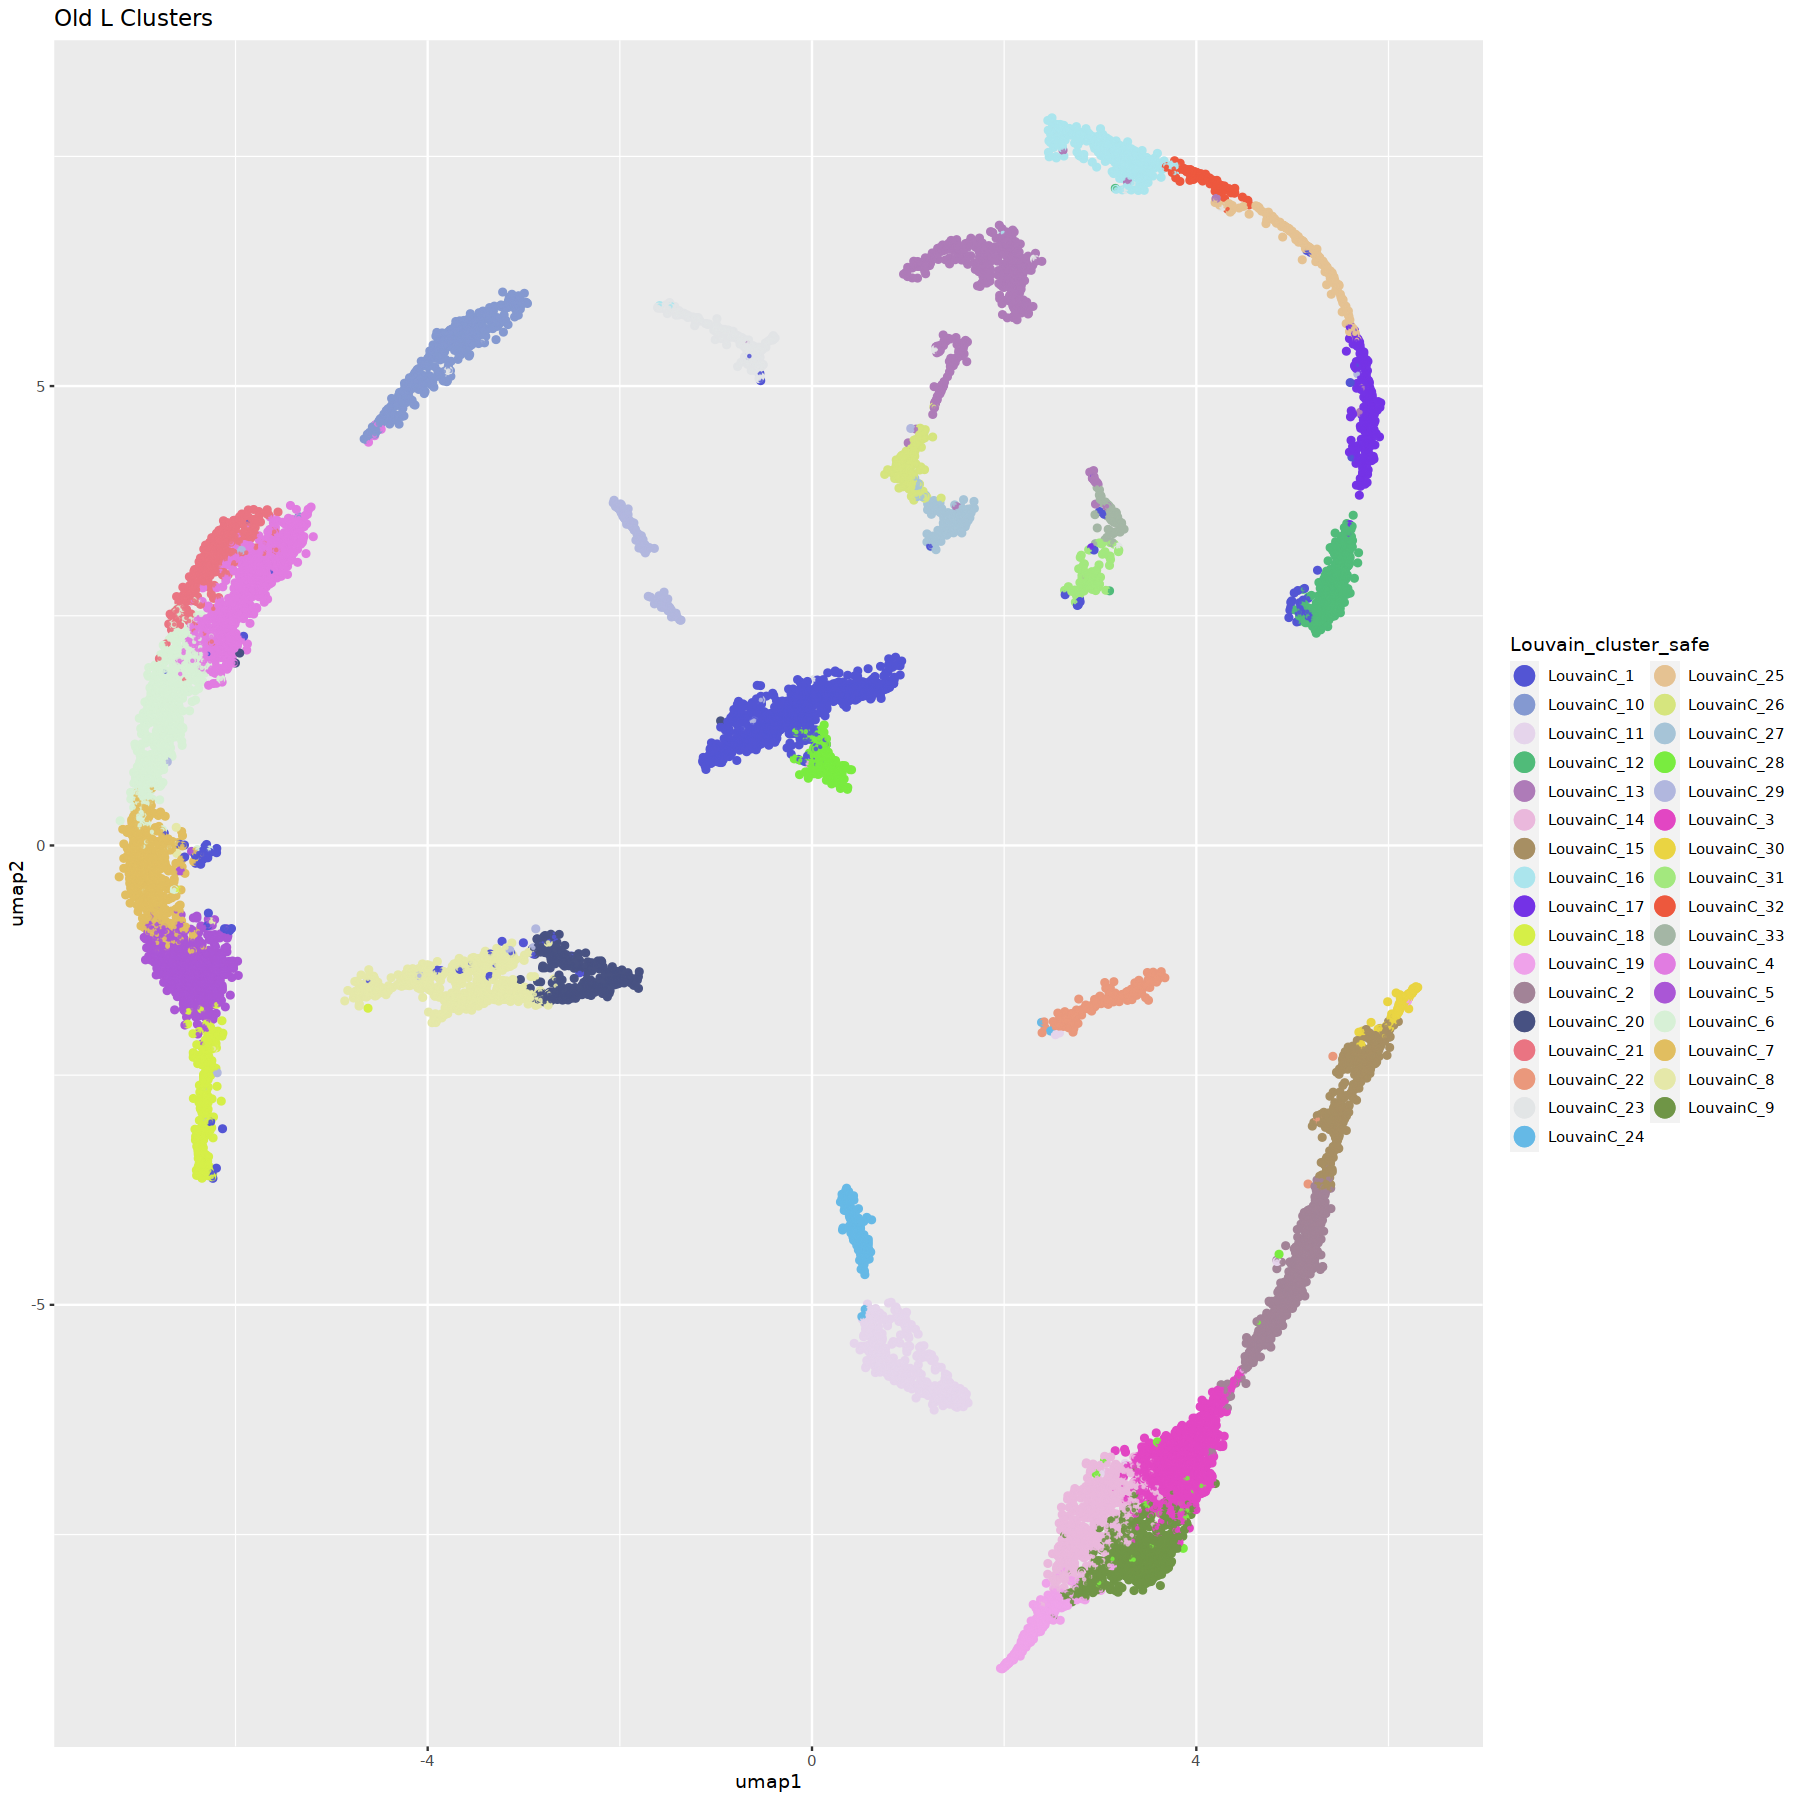

In [8]:
options(repr.plot.width=15, repr.plot.height=15)
ggplot(sb.loaded_socrates_data.vasculature$Clusters, aes(umap1, umap2, color = Louvain_cluster_safe)) + geom_point() +
 scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8) + ggtitle("Old L Clusters")

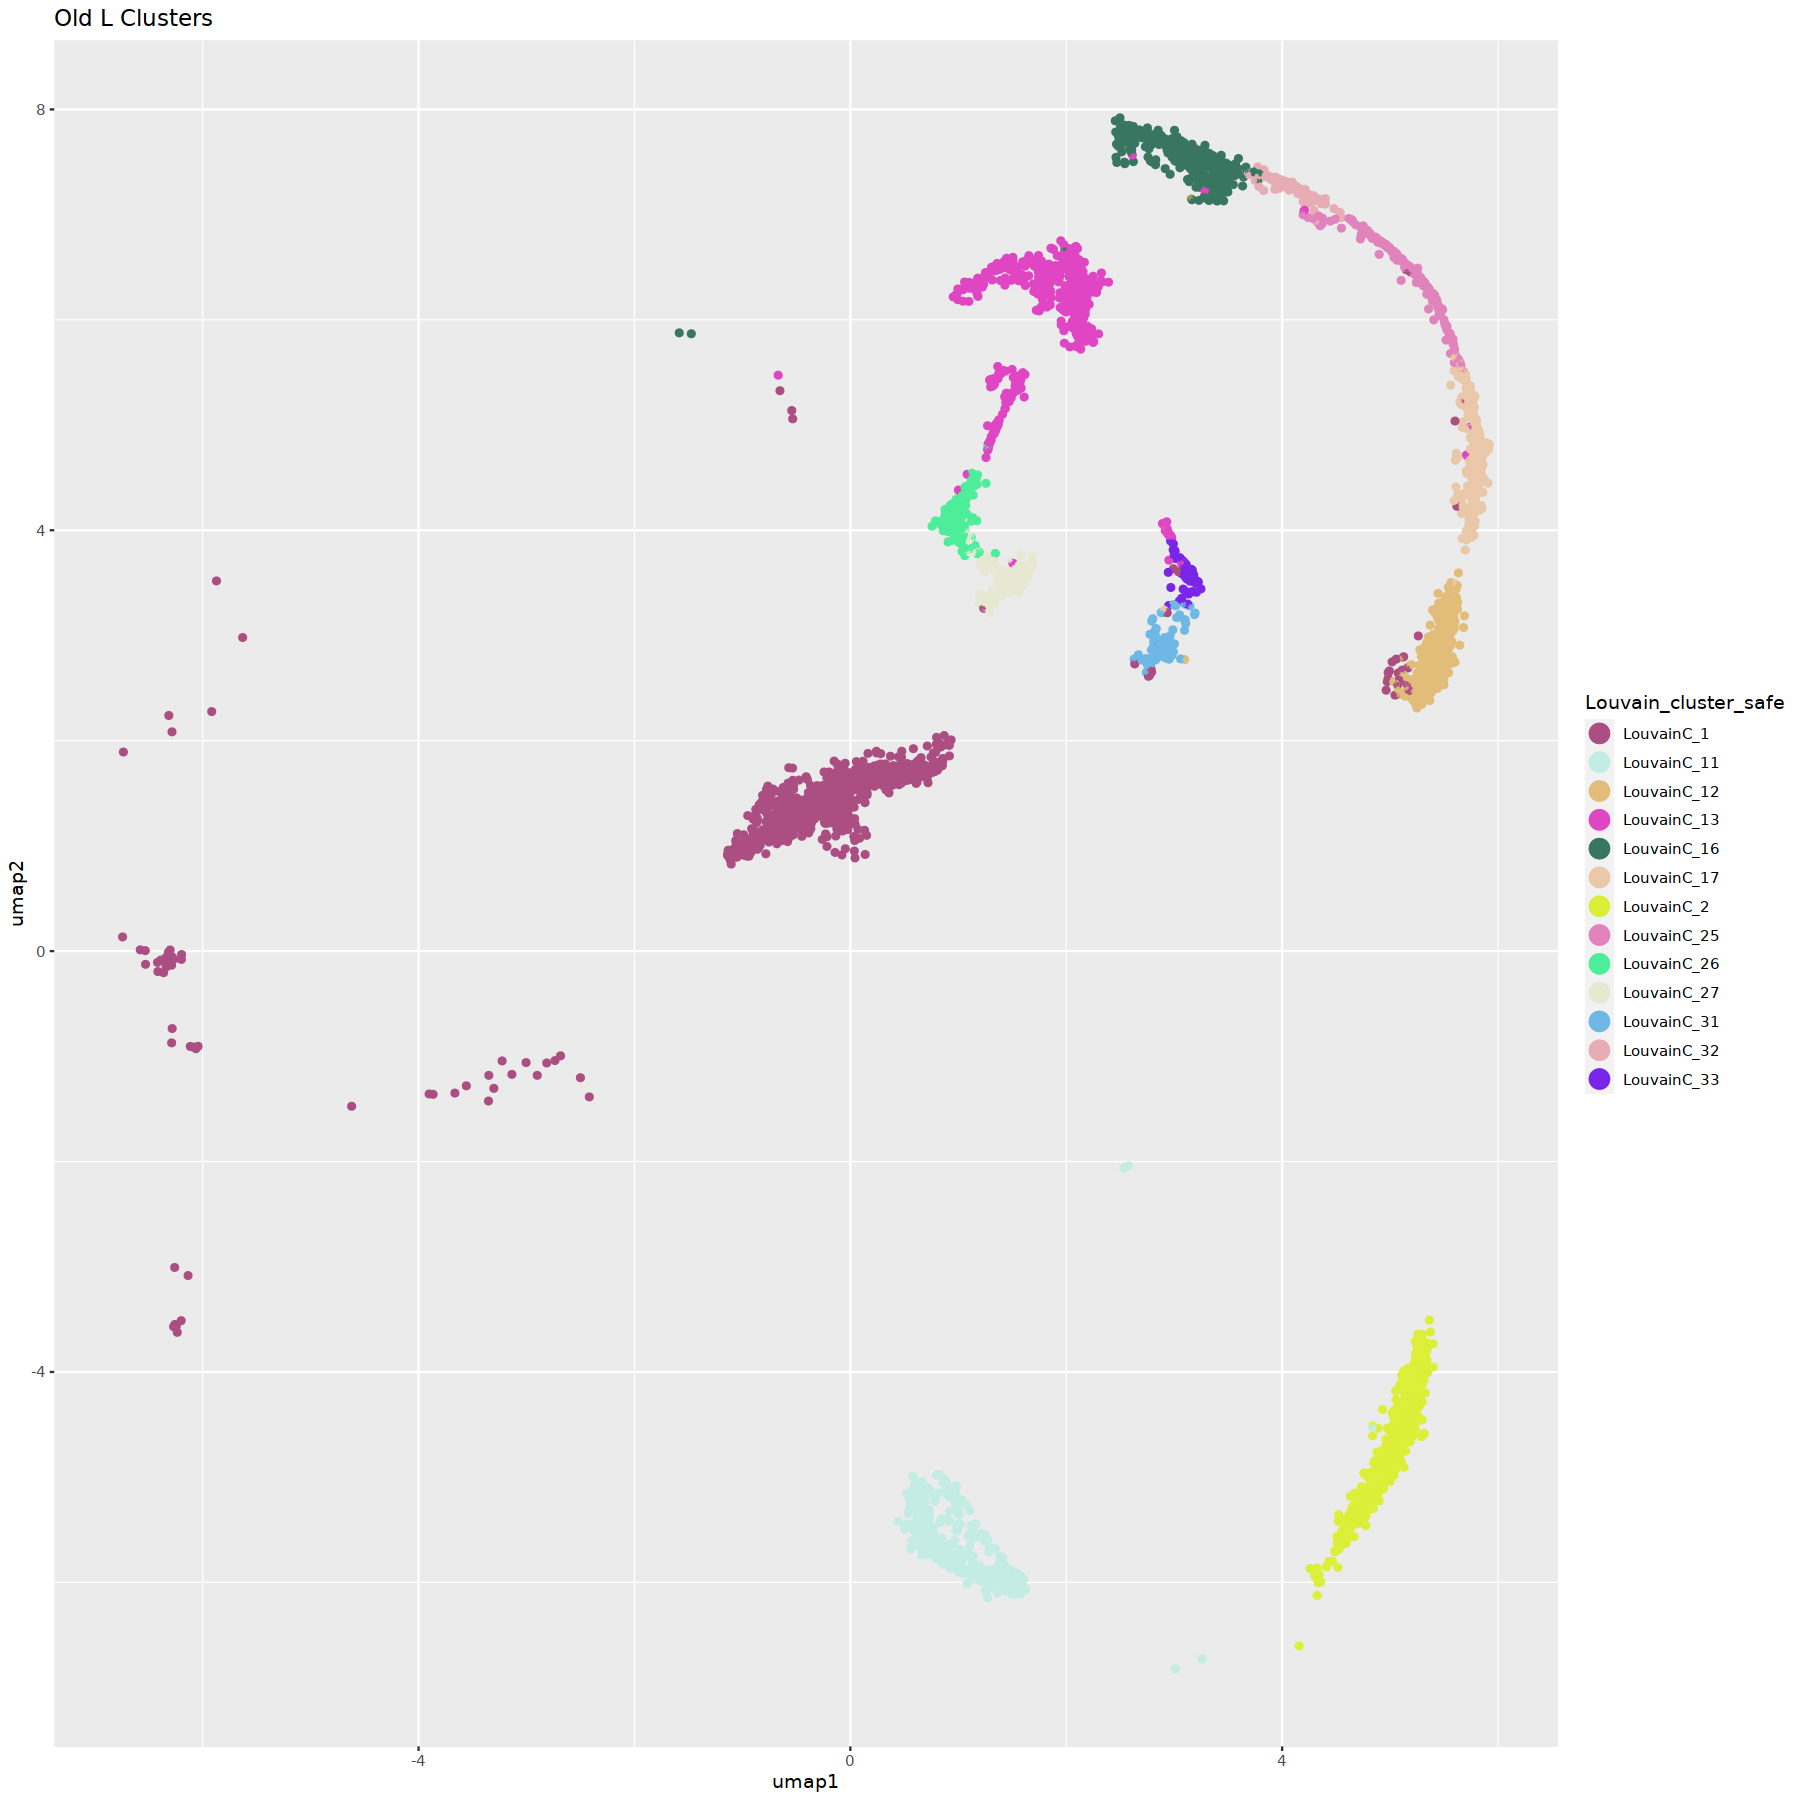

In [15]:
library(cowplot)
library(randomcoloR)
options(repr.plot.width=15, repr.plot.height=15)
other <- randomcoloR::distinctColorPalette(k = 55)
other <- sample(other)


Sb.subcluster.vasculature <- Sb.subcluster

#clusters <- c("LouvainC_9","LouvainC_19","LouvainC_12","LouvainC_17","LouvainC_13",
#  "LouvainC_35","LouvainC_16","LouvainC_32","LouvainC_24","LouvainC_9","LouvainC_14","LouvainC_23",
#              "LouvainC_25","LouvainC_26","LouvainC_27","LouvainC_31", "LouvainC_1")


## New Cluster selection round 2 
clusters <- c("LouvainC_16","LouvainC_32","LouvainC_25","LouvainC_17","LouvainC_12",
  "LouvainC_13","LouvainC_33","LouvainC_31","LouvainC_2","LouvainC_11",
              "LouvainC_25","LouvainC_26","LouvainC_27","LouvainC_31", "LouvainC_1")


sb.loaded_socrates_data.vasculature$Clusters  %>% 
    dplyr::filter(Louvain_cluster_safe %in% clusters) %>% 
    group_by(Louvain_cluster_safe) %>% 
    ggplot(., aes(umap1, umap2, color = Louvain_cluster_safe)) + geom_point() +
 scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8) + ggtitle("Old L Clusters")

chosen_subcluster <- sb.loaded_socrates_data.vasculature$Clusters %>% 
    filter(Louvain_cluster_safe %in% clusters)

meta_df <- as.data.frame(chosen_subcluster)
rownames(meta_df) <- meta_df$cellID
Sb.subcluster.vasculature$meta <- meta_df
Sb.subcluster.vasculature$meta.v3 <- meta_df

In [16]:
Sb.subcluster.vasculature <- generateMatrix(Sb.subcluster.vasculature, 
                                              filtered=FALSE,
                                              peaks = FALSE,
                                              verbose=TRUE)


## Generate Sparse Matrix
Sb.subcluster.vasculature <- convertSparseData(Sb.subcluster.vasculature, verbose = TRUE)

 - converting triplet format to sparseMatrix



In [19]:
# clean sparse counts matrix ---------------------------------------------
Sb.subcluster.vasculature <- cleanData(Sb.subcluster.vasculature, 
                     min.t=0.005,  # minimum feature frequency across cells
                                       max.t = .01,
                     verbose=T)


   * Input: cells = 5546 | peaks = 694096

   * Filtered: cells = 5546 | peaks = 89639



In [20]:
# normalize with TFIDF ---------------------------------------------------
Sb.subcluster.vasculature.tfidf <- tfidf(Sb.subcluster.vasculature)

# project with NMF -------------------------------------------------------
Sb.subcluster.vasculature.tfidf <- reduceDims(Sb.subcluster.vasculature.tfidf,
                      method="SVD", 
                      n.pcs=30, 
                      svd_slotName="SVD")

 - non-linear dimensionality reduction with UMAP ...

10:29:29 UMAP embedding parameters a = 1.577 b = 0.8951

10:29:29 Read 5546 rows and found 29 numeric columns

10:29:30 Using Annoy for neighbor search, n_neighbors = 15

10:29:31 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:29:32 Writing NN index file to temp file /tmp/RtmpeK001b/file33d174c927ca9

10:29:32 Searching Annoy index using 16 threads, search_k = 1500

10:29:33 Annoy recall = 100%

10:29:37 Commencing smooth kNN distance calibration using 16 threads

10:29:41 Initializing from normalized Laplacian + noise

10:29:51 Commencing optimization for 500 epochs, with 129914 positive edges

10:30:11 Optimization finished



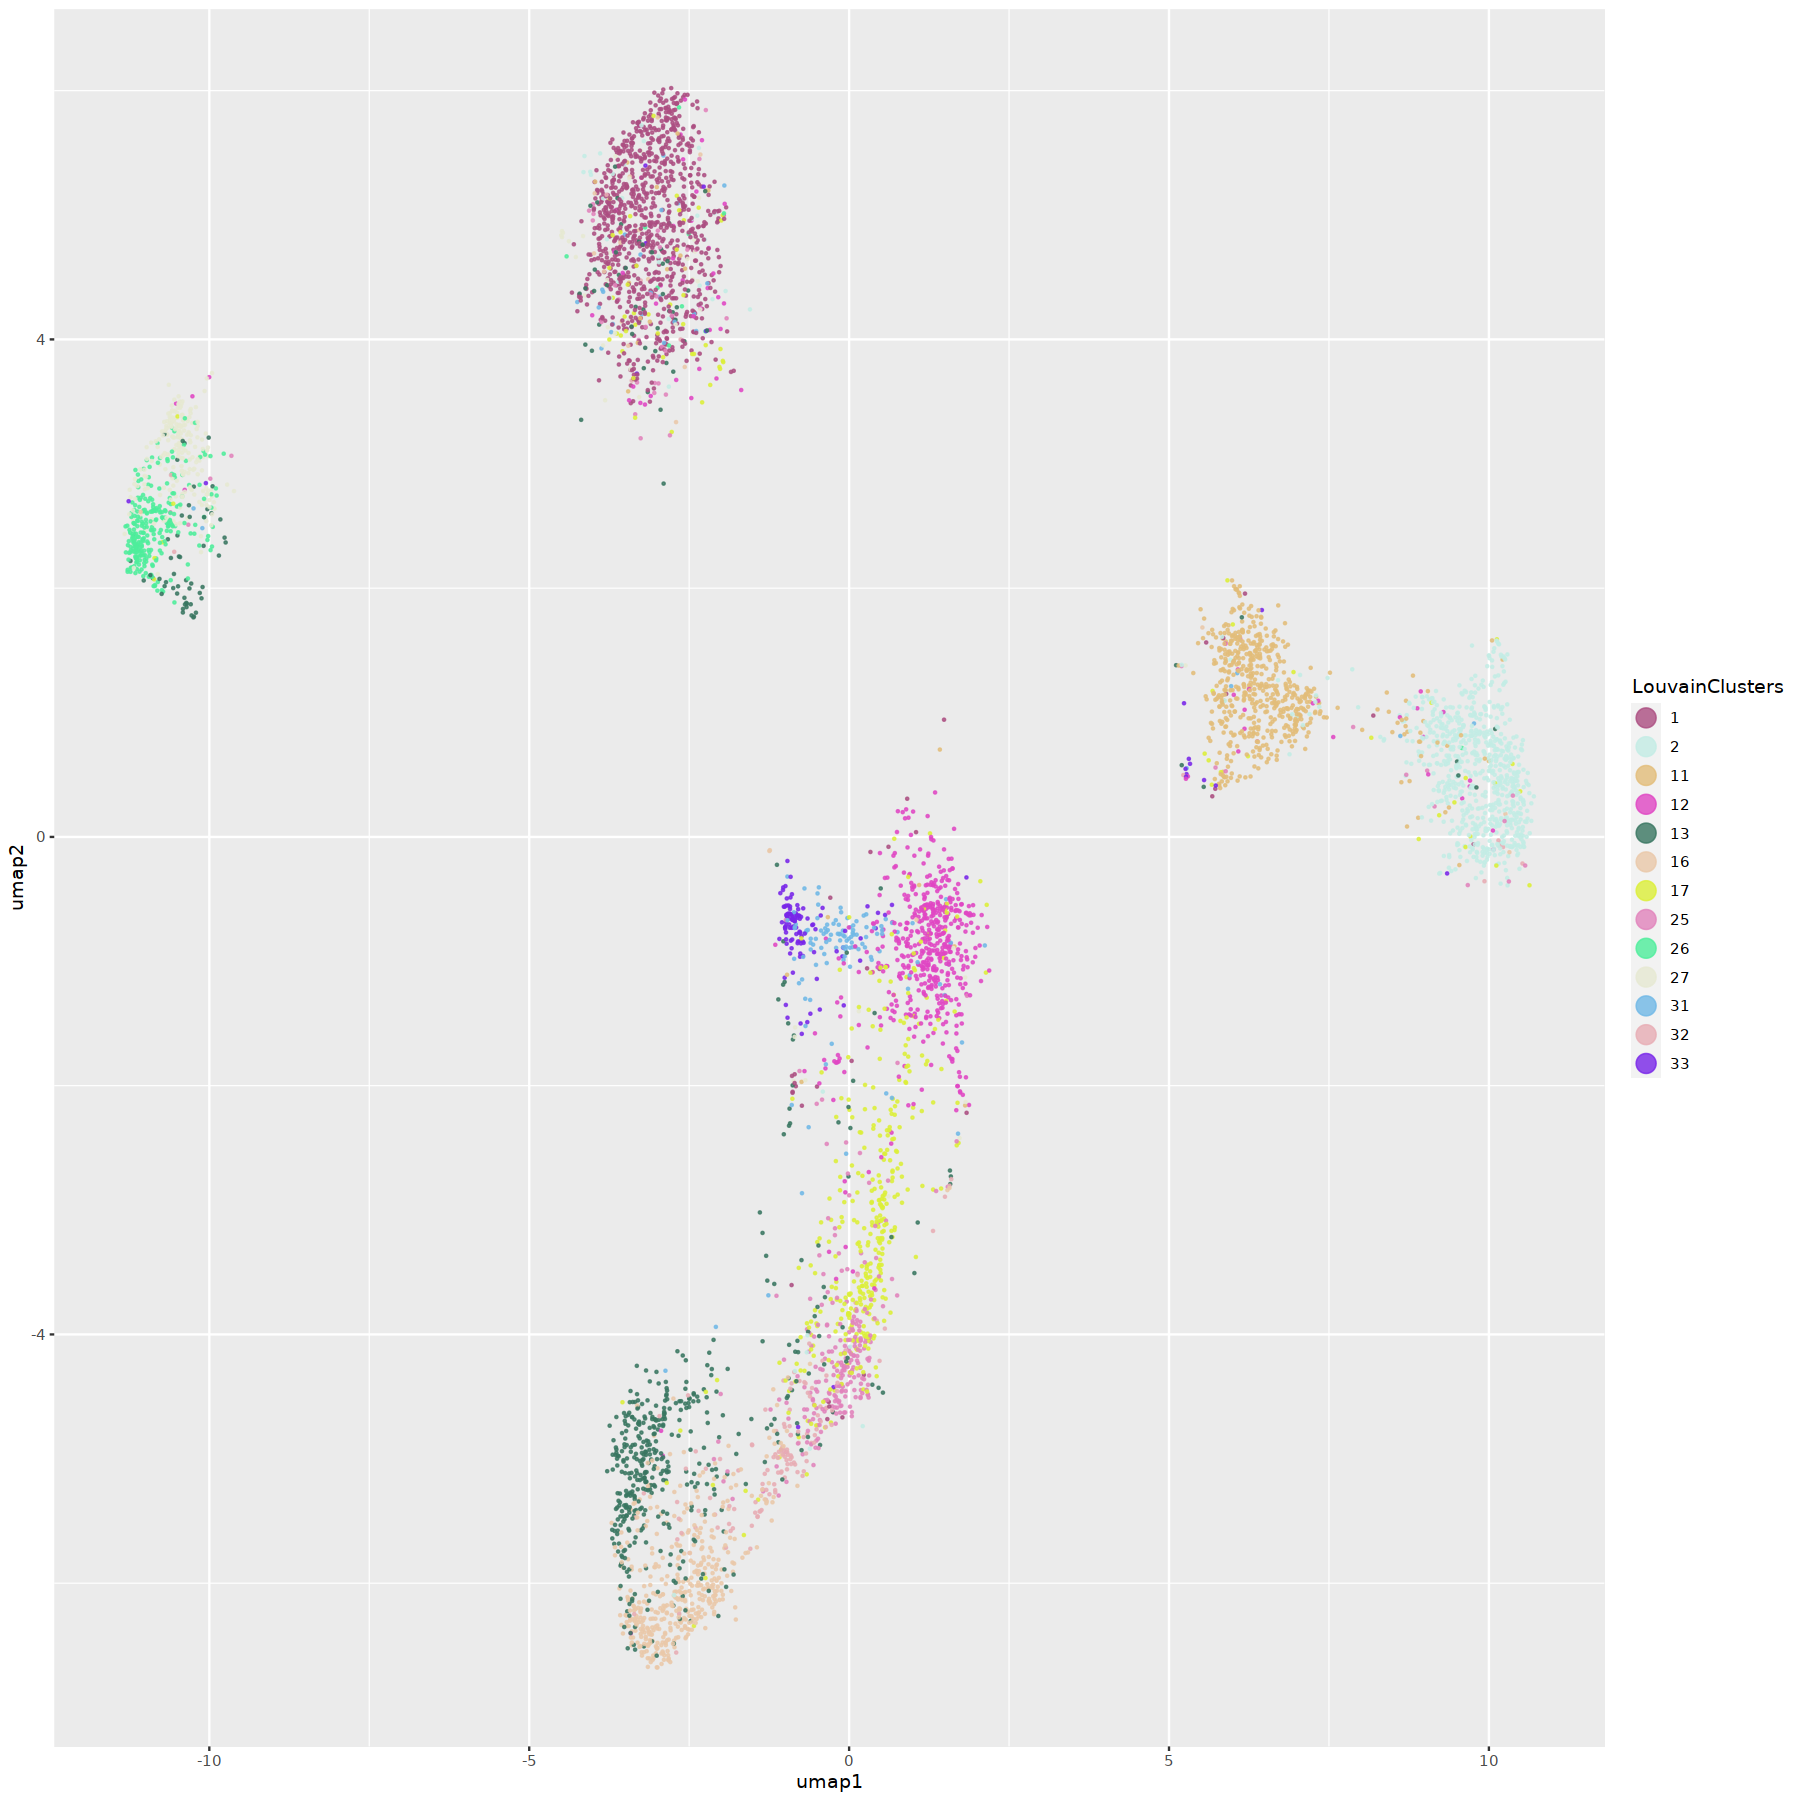

In [21]:
# reduce to 2-dimensions with UMAP ---------------------------------------
Sb.subcluster.vasculature.tfidf <- projectUMAP(Sb.subcluster.vasculature.tfidf, 
                       verbose=T,
                       k.near=15,
                       m.dist=0.1,
                       svd_slotName="SVD")


ggplot(Sb.subcluster.vasculature.tfidf$meta, aes(x=umap1, y = umap2, color = LouvainClusters)) +
  scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8)

In [26]:
# identify clusters using neighborhood graph -----------------------------
Sb.subcluster.vasculature.tfidf.cluster <- callClusters(Sb.subcluster.vasculature.tfidf, 
                        res=2.5,
                        k.near = 15,
                        #min.reads=1000,
                        verbose=T,
                        svd_slotName= "SVD",
                        cluster_slotName="sub_cluster",
                        cleanCluster=FALSE)


 - filtering outliers in UMAP manifold (z-score e.thresh = 3) ...

 - creating seurat object for graph-based clustering ...

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 5437
Number of edges: 262760

Running Louvain algorithm...
Maximum modularity in 100 random starts: 0.6688
Number of communities: 14
Elapsed time: 5 seconds


 - finished graph-based clustering ...

 - filtering clusters with low cell/read counts ...



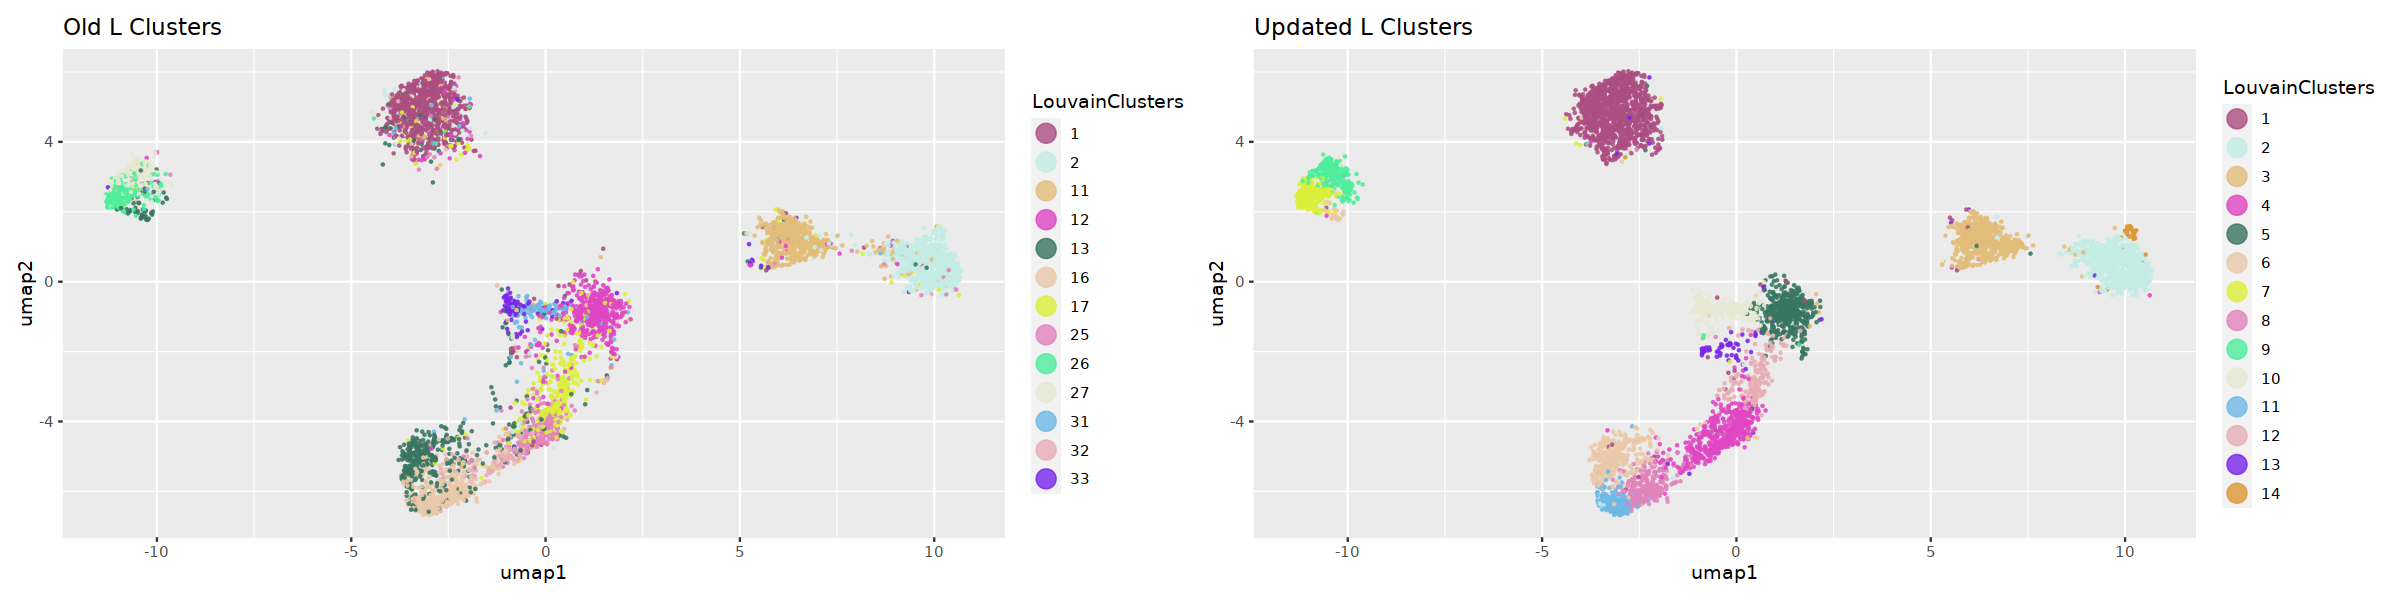

In [27]:
options(repr.plot.width=20, repr.plot.height=5)

old_clusters <- ggplot(Sb.subcluster.vasculature.tfidf.cluster$meta, aes(x=umap1, y = umap2, color = LouvainClusters)) +
  scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8)+ ggtitle("Old L Clusters")

new_clusters <- ggplot(Sb.subcluster.vasculature.tfidf.cluster$sub_cluster, aes(x=umap1, y = umap2, color = LouvainClusters)) +
  scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8) + ggtitle("Updated L Clusters")


old_clusters + new_clusters 

In [30]:
### Kernal Corrupted to just linked to the previosly run gene body accessability calculations
Sb.subcluster.vasculature.tfidf.cluster <- Sb.subcluster.vasculature.tfidf.cluster
Sb.subcluster.vasculature.tfidf.cluster$acr_counts_raw <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/sorghum_bicolor/clustering/Sb.gene_counts.output"
## Execute Annotation Attempt #1

library(presto)
Sb.subcluster.vasculature.tfidf.cluster <- run_presto(Sb.subcluster.vasculature.tfidf.cluster,
           meta_slot = "sub_cluster",
           counts_raw = "acr_counts_raw",
           cluster_name = "LouvainClusters")

# A tibble: 6 × 14
  cellID    total    tss   acrs  ptmt nSites log10nSites sampleID  umap1   umap2
  <chr>     <dbl>  <dbl>  <dbl> <dbl>  <dbl>       <dbl> <chr>     <dbl>   <dbl>
1 BC:Z:GC… 193716 115473 154235     0  47166        4.67 rep1      9.76  -0.0595
2 BC:Z:CG… 159908  50092  29336     0  69127        4.84 rep1     -3.94   5.20  
3 BC:Z:TT…  97214  55597  66879     0  34587        4.54 rep1     -2.59   5.95  
4 BC:Z:AC…  85372  44652  47133     0  34058        4.53 rep1     -2.74   5.94  
5 BC:Z:GC…  83441  49165  67016     0  27966        4.45 rep1     -0.828 -0.729 
6 BC:Z:AC…  76967  29710  25436     0  33813        4.53 rep1     -3.72   5.44  
# … with 4 more variables: doubletscore <dbl>, d.type <chr>,
#   LouvainClusters <fct>, Louvain_cluster_safe <chr>
# A tibble: 6 × 3
  gene_name        barcode                                         accessability
  <chr>            <chr>                                                   <dbl>
1 Sobic.001G125600 BC:Z:ACAGTGCTTGTATG

In [31]:
grabbed_top_marker_per_cluster <- top_markers(Sb.subcluster.vasculature.tfidf.cluster$presto_marker, 200)

represented_marker_lst <- list()
for (i in unique(Sb.subcluster.vasculature.tfidf.cluster$sub_cluster$LouvainClusters)) {
    
    make_set <- setNames("geneID",i) 
    markers_present_in_presto <- left_join(grabbed_top_marker_per_cluster, 
                                           marker_list_sb, by = make_set)  %>% 
    dplyr::filter(is.na(chr) != TRUE)  %>% 
    dplyr::select(rank, i, chr:tissue) %>% 
    dplyr::rename("geneID" = i)
    
    represented_marker_lst[[i]] <- markers_present_in_presto
}
                 
represented_marker_lst

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(i)` instead of `i` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.


$`2`
# A tibble: 5 × 8
   rank geneID                        chr      start      end name  type  tissue
  <int> <chr>                         <chr>    <dbl>    <dbl> <chr> <chr> <chr> 
1     1 Sobic.010G160700              Chr10 48834723 48842334 pepc1 meso… axill…
2     3 Sorbiv5.1_pg15362.valid.m24.g Chr03 63610236 63623676 cah1  meso… axill…
3    42 Sobic.005G042000              Chr05  3935393  3936843 ssu2… bund… axill…
4    91 Sorbiv5.1_pg24873.valid.m3.g  Chr02  2529322  2534592 ZmAA… xyle… axill…
5   140 Sobic.002G207900              Chr02 61233338 61239219 gl1   epid… axill…

$`1`
# A tibble: 0 × 8
# … with 8 variables: rank <int>, geneID <chr>, chr <chr>, start <dbl>,
#   end <dbl>, name <chr>, type <chr>, tissue <chr>

$`10`
# A tibble: 3 × 8
   rank geneID           chr      start      end name  type               tissue
  <int> <chr>            <chr>    <dbl>    <dbl> <chr> <chr>              <chr> 
1    20 Sobic.002G083600 Chr02  8962876  8967240 SID1  spikelet_pair_mer… axill…
2    59 Sobic.007G141200 Chr07 60395810 60403219 ccr1  vascular_sclerenc… axill…
3   183 Sobic.001G327900 Chr01 65660828 65664161 shr1  mature_vascular_b… axill…

$`5`
# A tibble: 2 × 8
   rank geneID                 chr     start     end name           type  tissue
  <int> <chr>                  <chr>   <dbl>   <dbl> <chr>          <chr> <chr> 
1    30 Sobic.005G042000       Chr05 3935393 3936843 ssu2__ssu1     bund… axill…
2    65 Sorbiv5.1_pg15531.m1.g Chr03 3341071 3347117 me3_ortho_cou… bund… axill…

$`12`
# A tibble: 3 × 8
   rank geneID                chr      start      end name       type     tissue
  <int> <chr>                 <chr>    <dbl>    <dbl> <chr>      <chr>    <chr> 
1     4 Sorbiv5.1_pg9159.m1.g Chr06 41574374 41588764 ba2        axillar… axill…
2    36 Sobic.007G141200      Chr07 60395810 60403219 ccr1       vascula… axill…
3   192 Sobic.005G042000      Chr05  3935393  3936843 ssu2__ssu1 bundle_… axill…

$`8`
# A tibble: 0 × 8
# … with 8 variables: rank <int>, geneID <chr>, chr <chr>, start <dbl>,
#   end <dbl>, name <chr>, type <chr>, tissue <chr>

$`3`
# A tibble: 2 × 8
   rank geneID                        chr      start      end name  type  tissue
  <int> <chr>                         <chr>    <dbl>    <dbl> <chr> <chr> <chr> 
1     2 Sobic.010G160700              Chr10 48834723 48842334 pepc1 meso… axill…
2     3 Sorbiv5.1_pg15362.valid.m24.g Chr03 63610236 63623676 cah1  meso… axill…

$`6`
# A tibble: 3 × 8
   rank geneID           chr      start      end name  type               tissue
  <int> <chr>            <chr>    <dbl>    <dbl> <chr> <chr>              <chr> 
1    20 Sobic.002G032500 Chr02  3002965  3011531 pan2  subsidiary_mother… axill…
2    94 Sobic.007G211200 Chr07 67406141 67408727 pan1  subsidary_mother_… axill…
3   192 Sobic.001G145200 Chr01 11750927 11755977 cvp2  phloem_sieve_elem… axill…

$`7`
# A tibble: 4 × 8
   rank geneID                        chr      start      end name  type  tissue
  <int> <chr>                         <chr>    <dbl>    <dbl> <chr> <chr> <chr> 
1    42 Sorbiv5.1_pg26238.m1.g        Chr02 19991876 19997282 hp2   prot… axill…
2    43 Sorbiv5.1_pg29247.valid.m13.g Chr09 53708860 53712249 ZmAA… xyle… axill…
3    44 Sobic.004G058700              Chr04  4774060  4777174 ZmAPL prot… axill…
4   128 Sobic.001G488700              Chr01 80047831 80054246 sut1… comp… axill…

$`4`
# A tibble: 3 × 8
   rank geneID                chr      start      end name          type  tissue
  <int> <chr>                 <chr>    <dbl>    <dbl> <chr>         <chr> <chr> 
1     1 Sorbiv5.1_pg9159.m1.g Chr06 41574374 41588764 ba2           axil… axill…
2   150 Sobic.009G162000      Chr09 55658168 55661565 gpat11__gpat… epid… axill…
3   151 Sobic.007G141200      Chr07 60395810 60403219 ccr1          vasc… axill…

$`9`
# A tibble: 2 × 8
   rank geneID                 chr      start      end name       type    tissue
  <int> <chr>                  <chr>    <dbl>    <dbl> <chr>      <chr>   <chr> 
1   

In [32]:
gathered_markers <- bind_rows(represented_marker_lst, .id = "LouvainCluster")  %>% 
    arrange(LouvainCluster, rank)


write_delim(gathered_markers, 
            "/home/jpm73279/Mendieta_et_al_comparative_single_cell/metrics/annotations/V3_annotations/Sb_leaf.merged_replicates.Subclustering_vaculature.LouvainCluster_annot_V3.presto.txt", 
            col_names = TRUE, quote = "none", delim = "\t")

gathered_markers

LouvainCluster rank geneID                        chr   start    end     
1  10              20  Sobic.002G083600              Chr02  8962876  8967240
2  10              59  Sobic.007G141200              Chr07 60395810 60403219
3  10             183  Sobic.001G327900              Chr01 65660828 65664161
4  11             178  Sobic.002G032500              Chr02  3002965  3011531
5  11             185  Sobic.007G211200              Chr07 67406141 67408727
6  12               4  Sorbiv5.1_pg9159.m1.g         Chr06 41574374 41588764
7  12              36  Sobic.007G141200              Chr07 60395810 60403219
8  12             192  Sobic.005G042000              Chr05  3935393  3936843
9  13              19  Sobic.008G112300              Chr08 54955030 54960410
10 13              66  Sobic.010G027300              Chr10  2227880  2229782
11 14              52  Sobic.010G160700              Chr10 48834723 48842334
12 14             178  Sobic.004G348800              Chr04 70314888 70316188
13 2                1  Sobic.010G160700              Chr10 48834723 48842334
14 2                3  Sorbiv5.1_pg15362.valid.m24.g Chr03 63610236 63623676
15 2               42  Sobic.005G042000              Chr05  3935393  3936843
16 2               91  Sorbiv5.1_pg24873.valid.m3.g  Chr02  2529322  2534592
17 2              140  Sobic.002G207900              Chr02 61233338 61239219
18 3                2  Sobic.010G160700              Chr10 48834723 48842334
19 3                3  Sorbiv5.1_pg15362.valid.m24.g Chr03 63610236 63623676
20 4                1  Sorbiv5.1_pg9159.m1.g         Chr06 41574374 41588764
21 4              150  Sobic.009G162000              Chr09 55658168 55661565
22 4              151  Sobic.007G141200              Chr07 60395810 60403219
23 5               30  Sobic.005G042000              Chr05  3935393  3936843
24 5               65  Sorbiv5.1_pg15531.m1.g        Chr03  3341071  3347117
25 6               20  Sobic.002G032500              Chr02  3002965  3011531
26 6               94  Sobic.007G211200              Chr07 67406141 67408727
27 6              192  Sobic.001G145200              Chr01 11750927 11755977
28 7               42  Sorbiv5.1_pg26238.m1.g        Chr02 19991876 19997282
29 7               43  Sorbiv5.1_pg29247.valid.m13.g Chr09 53708860 53712249
30 7               44  Sobic.004G058700              Chr04  4774060  4777174
31 7              128  Sobic.001G488700              Chr01 80047831 80054246
32 9               51  Sorbiv5.1_pg26238.m1.g        Chr02 19991876 19997282
33 9               55  Sobic.001G488700              Chr01 80047831 80054246
   name             
1  SID1             
2  ccr1             
3  shr1             
4  pan2             
5  pan1             
6  ba2              
7  ccr1             
8  ssu2__ssu1       
9  omt1             
10 BAF1             
11 pepc1            
12 ZmLBD29b         
13 pepc1            
14 cah1             
15 ssu2__ssu1       
16 ZmAAP6_1         
17 gl1              
18 pepc1            
19 cah1             
20 ba2              
21 gpat11__gpat12   
22 ccr1             
23 ssu2__ssu1       
24 me3_ortho_count_1
25 pan2             
26 pan1             
27 cvp2             
28 hp2              
29 ZmAAP6_2         
30 ZmAPL            
31 sut1__sut7       
32 hp2              
33 sut1__sut7       
   type                                                                                                                                                                                                                                                               
1  spikelet_pair_meristem,spikelet_meristem,pistil_primordia,stamen_primordia,lower_flora                                                                                                                                                                             
2  vascular_sclerenchyma                                                                                                                         

In [33]:

prefix <- "Sb_leaf.merged_replicates.Subclustering_vasculature"
output_location <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/sorghum_bicolor/clustering/"

# output text files
nmf.meta <- Sb.subcluster.vasculature.tfidf.cluster$sub_cluster
nmf.rd <- Sb.subcluster.vasculature.tfidf.cluster$SVD

write.table(nmf.meta, file=paste0(output_location,prefix, ".SVD.full.metadata.txt"), quote=F, row.names=T, col.names=T, sep="\t")
write.table(nmf.rd, file=paste0(output_location, prefix, ".SVD.full.reduced_dimensions.txt"), quote=F, row.names=T, col.names=T, sep="\t")


#Generate Sparse Matrix-
trip <- as.data.frame(summary(Sb.subcluster.vasculature.tfidf.cluster$counts))
trip$i <- rownames(Sb.subcluster.vasculature.tfidf.cluster$counts)[trip$i]
trip$j <- colnames(Sb.subcluster.vasculature.tfidf.cluster$counts)[trip$j]

write.table(trip, file=paste0(output_location, prefix, ".SVD.sparse"), quote=F, row.names=T, col.names=T, sep="\t")



In [34]:
saveRDS(Sb.subcluster.vasculature.tfidf.cluster, file = paste0(output_location, prefix, ".rds"))

In [3]:
## After Inital Analysis - wanting to re-run presto while dropping the identified mesophyll clusters to add resolution tl
## Louvain cluster 1 


re_run_presto <- readRDS("/scratch/jpm73279/comparative_single_cell/02.QC_clustering/sorghum_bicolor/clustering/Sb_leaf.merged_replicates.Subclustering_vasculature.rds")

In [11]:
unique(re_run_presto$sub_cluster$LouvainClusters)

[1] 8  1  4  9  3  5  11 2  6  7  13 10 12
Levels: 1 2 3 4 5 6 7 8 9 10 11 12 13

In [24]:
`%notin%` <- Negate(`%in%`)
filtered_clusters <- re_run_presto$sub_cluster  %>% 
    dplyr::filter(LouvainClusters %notin% c("2", "10", "7"))

re_run_presto$sub_cluster <- as.data.frame(filtered_clusters)

In [25]:
unique(filtered_clusters$LouvainClusters)

[1] 8  1  4  9  3  5  11 6  13 12
Levels: 1 2 3 4 5 6 7 8 9 10 11 12 13

In [26]:
Sb.subcluster.vasculature.tfidf.cluster.2 <- run_presto(re_run_presto,
           meta_slot = "sub_cluster",
           counts_raw = "acr_counts_raw",
           cluster_name = "LouvainClusters")

# A tibble: 6 × 14
  cellID     total    tss   acrs  ptmt nSites log10nSites sampleID  umap1  umap2
  <chr>      <dbl>  <dbl>  <dbl> <dbl>  <dbl>       <dbl> <chr>     <dbl>  <dbl>
1 BC:Z:GCC… 193716 115473 154235     0  47166        4.67 rep1     -0.815  0.191
2 BC:Z:CGA… 159908  50092  29336     0  69127        4.84 rep1     -3.95  -0.879
3 BC:Z:TTA… 137820  80881  99700     0  40325        4.61 rep1     -1.09   0.698
4 BC:Z:ACA…  98568  56617  71027     0  32074        4.51 rep1     -1.01   0.531
5 BC:Z:TTA…  97214  55597  66879     0  34587        4.54 rep1     -1.40   0.154
6 BC:Z:ACA…  85372  44652  47133     0  34058        4.53 rep1     -2.09  -0.533
# … with 4 more variables: doubletscore <dbl>, d.type <chr>,
#   LouvainClusters <fct>, Louvain_cluster_safe <chr>
# A tibble: 6 × 3
  gene_name        barcode                                         accessability
  <chr>            <chr>                                                   <dbl>
1 Sobic.001G125600 BC:Z:ACAGTGCTTGTATG

In [27]:
grabbed_top_marker_per_cluster <- top_markers(Sb.subcluster.vasculature.tfidf.cluster.2$presto_marker, 200)

represented_marker_lst <- list()
for (i in unique(Sb.subcluster.vasculature.tfidf.cluster.2$sub_cluster$LouvainClusters)) {
    
    make_set <- setNames("geneID",i) 
    markers_present_in_presto <- left_join(grabbed_top_marker_per_cluster, 
                                           marker_list_sb, by = make_set)  %>% 
    dplyr::filter(is.na(chr) != TRUE)  %>% 
    dplyr::select(rank, i, chr:tissue) %>% 
    dplyr::rename("geneID" = i)
    
    represented_marker_lst[[i]] <- markers_present_in_presto
}
                 
represented_marker_lst

$`8`
# A tibble: 3 × 8
   rank geneID                      chr      start      end name  type    tissue
  <int> <chr>                       <chr>    <dbl>    <dbl> <chr> <chr>   <chr> 
1     1 Sobic.002G207900            Chr02 61233338 61239219 gl1   epider… axill…
2     9 Sorbiv5.1_pg9159.m1.g       Chr06 41574374 41588764 ba2   axilla… axill…
3    35 Sorbiv5.1_pg5044.valid.m7.g Chr01 66616555 66619678 bk1   vascul… axill…

$`1`
# A tibble: 1 × 8
   rank geneID                       chr      start      end name  type   tissue
  <int> <chr>                        <chr>    <dbl>    <dbl> <chr> <chr>  <chr> 
1   155 Sorbiv5.1_pg7967.valid.m15.g Chr06 58346770 58354051 pdf2  proto… axill…

$`4`
# A tibble: 2 × 8
   rank geneID                 chr     start     end name           type  tissue
  <int> <chr>                  <chr>   <dbl>   <dbl> <chr>          <chr> <chr> 
1    12 Sobic.005G042000       Chr05 3935393 3936843 ssu2__ssu1     bund… axill…
2   130 Sorbiv5.1_pg15531.m1.g Chr03 3341071 3347117 me3_ortho_cou… bund… axill…

$`9`
# A tibble: 3 × 8
   rank geneID                chr      start      end name       type     tissue
  <int> <chr>                 <chr>    <dbl>    <dbl> <chr>      <chr>    <chr> 
1     3 Sorbiv5.1_pg9159.m1.g Chr06 41574374 41588764 ba2        axillar… axill…
2     7 Sobic.007G141200      Chr07 60395810 60403219 ccr1       vascula… axill…
3    11 Sobic.005G042000      Chr05  3935393  3936843 ssu2__ssu1 bundle_… axill…

$`3`
# A tibble: 3 × 8
   rank geneID           chr      start      end name  type               tissue
  <int> <chr>            <chr>    <dbl>    <dbl> <chr> <chr>              <chr> 
1   109 Sobic.002G032500 Chr02  3002965  3011531 pan2  subsidiary_mother… axill…
2   138 Sobic.007G211200 Chr07 67406141 67408727 pan1  subsidary_mother_… axill…
3   144 Sobic.001G499200 Chr01 81035681 81040362 nod   stomata            axill…

$`5`
# A tibble: 4 × 8
   rank geneID                        chr      start      end name  type  tissue
  <int> <chr>                         <chr>    <dbl>    <dbl> <chr> <chr> <chr> 
1    29 Sorbiv5.1_pg26238.m1.g        Chr02 19991876 19997282 hp2   prot… axill…
2    68 Sobic.001G488700              Chr01 80047831 80054246 sut1… comp… axill…
3   120 Sorbiv5.1_pg29247.valid.m13.g Chr09 53708860 53712249 ZmAA… xyle… axill…
4   132 Sobic.004G058700              Chr04  4774060  4777174 ZmAPL prot… axill…

$`11`
# A tibble: 6 × 8
   rank geneID                        chr      start      end name  type  tissue
  <int> <chr>                         <chr>    <dbl>    <dbl> <chr> <chr> <chr> 
1    15 Sobic.001G075101              Chr01  5763796  5774227 knox8 SAM,… axill…
2    16 Sobic.002G207900              Chr02 61233338 61239219 gl1   epid… axill…
3    21 Sorbiv5.1_pg9159.m1.g         Chr06 41574374 41588764 ba2   axil… axill…
4   130 Sorbiv5.1_pg15362.valid.m24.g Chr03 63610236 63623676 cah1  meso… axill…
5   138 Sorbiv5.1_pg24873.valid.m3.g  Chr02  2529322  2534592 ZmAA… xyle… axill…
6   154 Sobic.001G537300              Chr01 84195608 84203525 rld1  SAM,… axill…

$`6`
# A tibble: 3 × 8
   rank geneID                       chr      start      end name   type  tissue
  <int> <chr>                        <chr>    <dbl>    <dbl> <chr>  <chr> <chr> 
1     7 Sorbiv5.1_pg9159.m1.g        Chr06 41574374 41588764 ba2    axil… axill…
2    55 Sobic.009G162000             Chr09 55658168 55661565 gpat1… epid… axill…
3   116 Sorbiv5.1_pg31052.valid.m1.g Chr09 63154998 63156307 mute   guar… axill…

$`13`
# A tibble: 2 × 8
   rank geneID           chr      start      end name               type  tissue
  <int> <chr>            <chr>    <dbl>    <dbl> <chr>              <chr> <chr> 
1    24 Sobic.008G094000 Chr08 46768135 46771205 sweet13a_ortho_co… abax… leaf  
2   132 Sobic.006G262100 Chr06 61127079 61135209 ZmMP_3             proc… axill…

$`12`
# A tibble: 0 × 8
# … with 8 variables: rank <int>, geneID <chr>, chr <chr>, start <dbl>,
#   end <dbl>, name <chr>, type <chr>, ti

# Subclustering Mesophyll and Unknown Clusters

In [16]:
sb.loaded_socrates_data.mesophyll <- loaded_socrates_data
cleaned_cluster_meta <- sb.loaded_socrates_data.mesophyll$Clusters  %>% 
        group_by(LouvainClusters)  %>% 
        mutate(Louvain_cluster_safe = str_c("LouvainC_", LouvainClusters))
    
sb.loaded_socrates_data.mesophyll$Clusters <- cleaned_cluster_meta

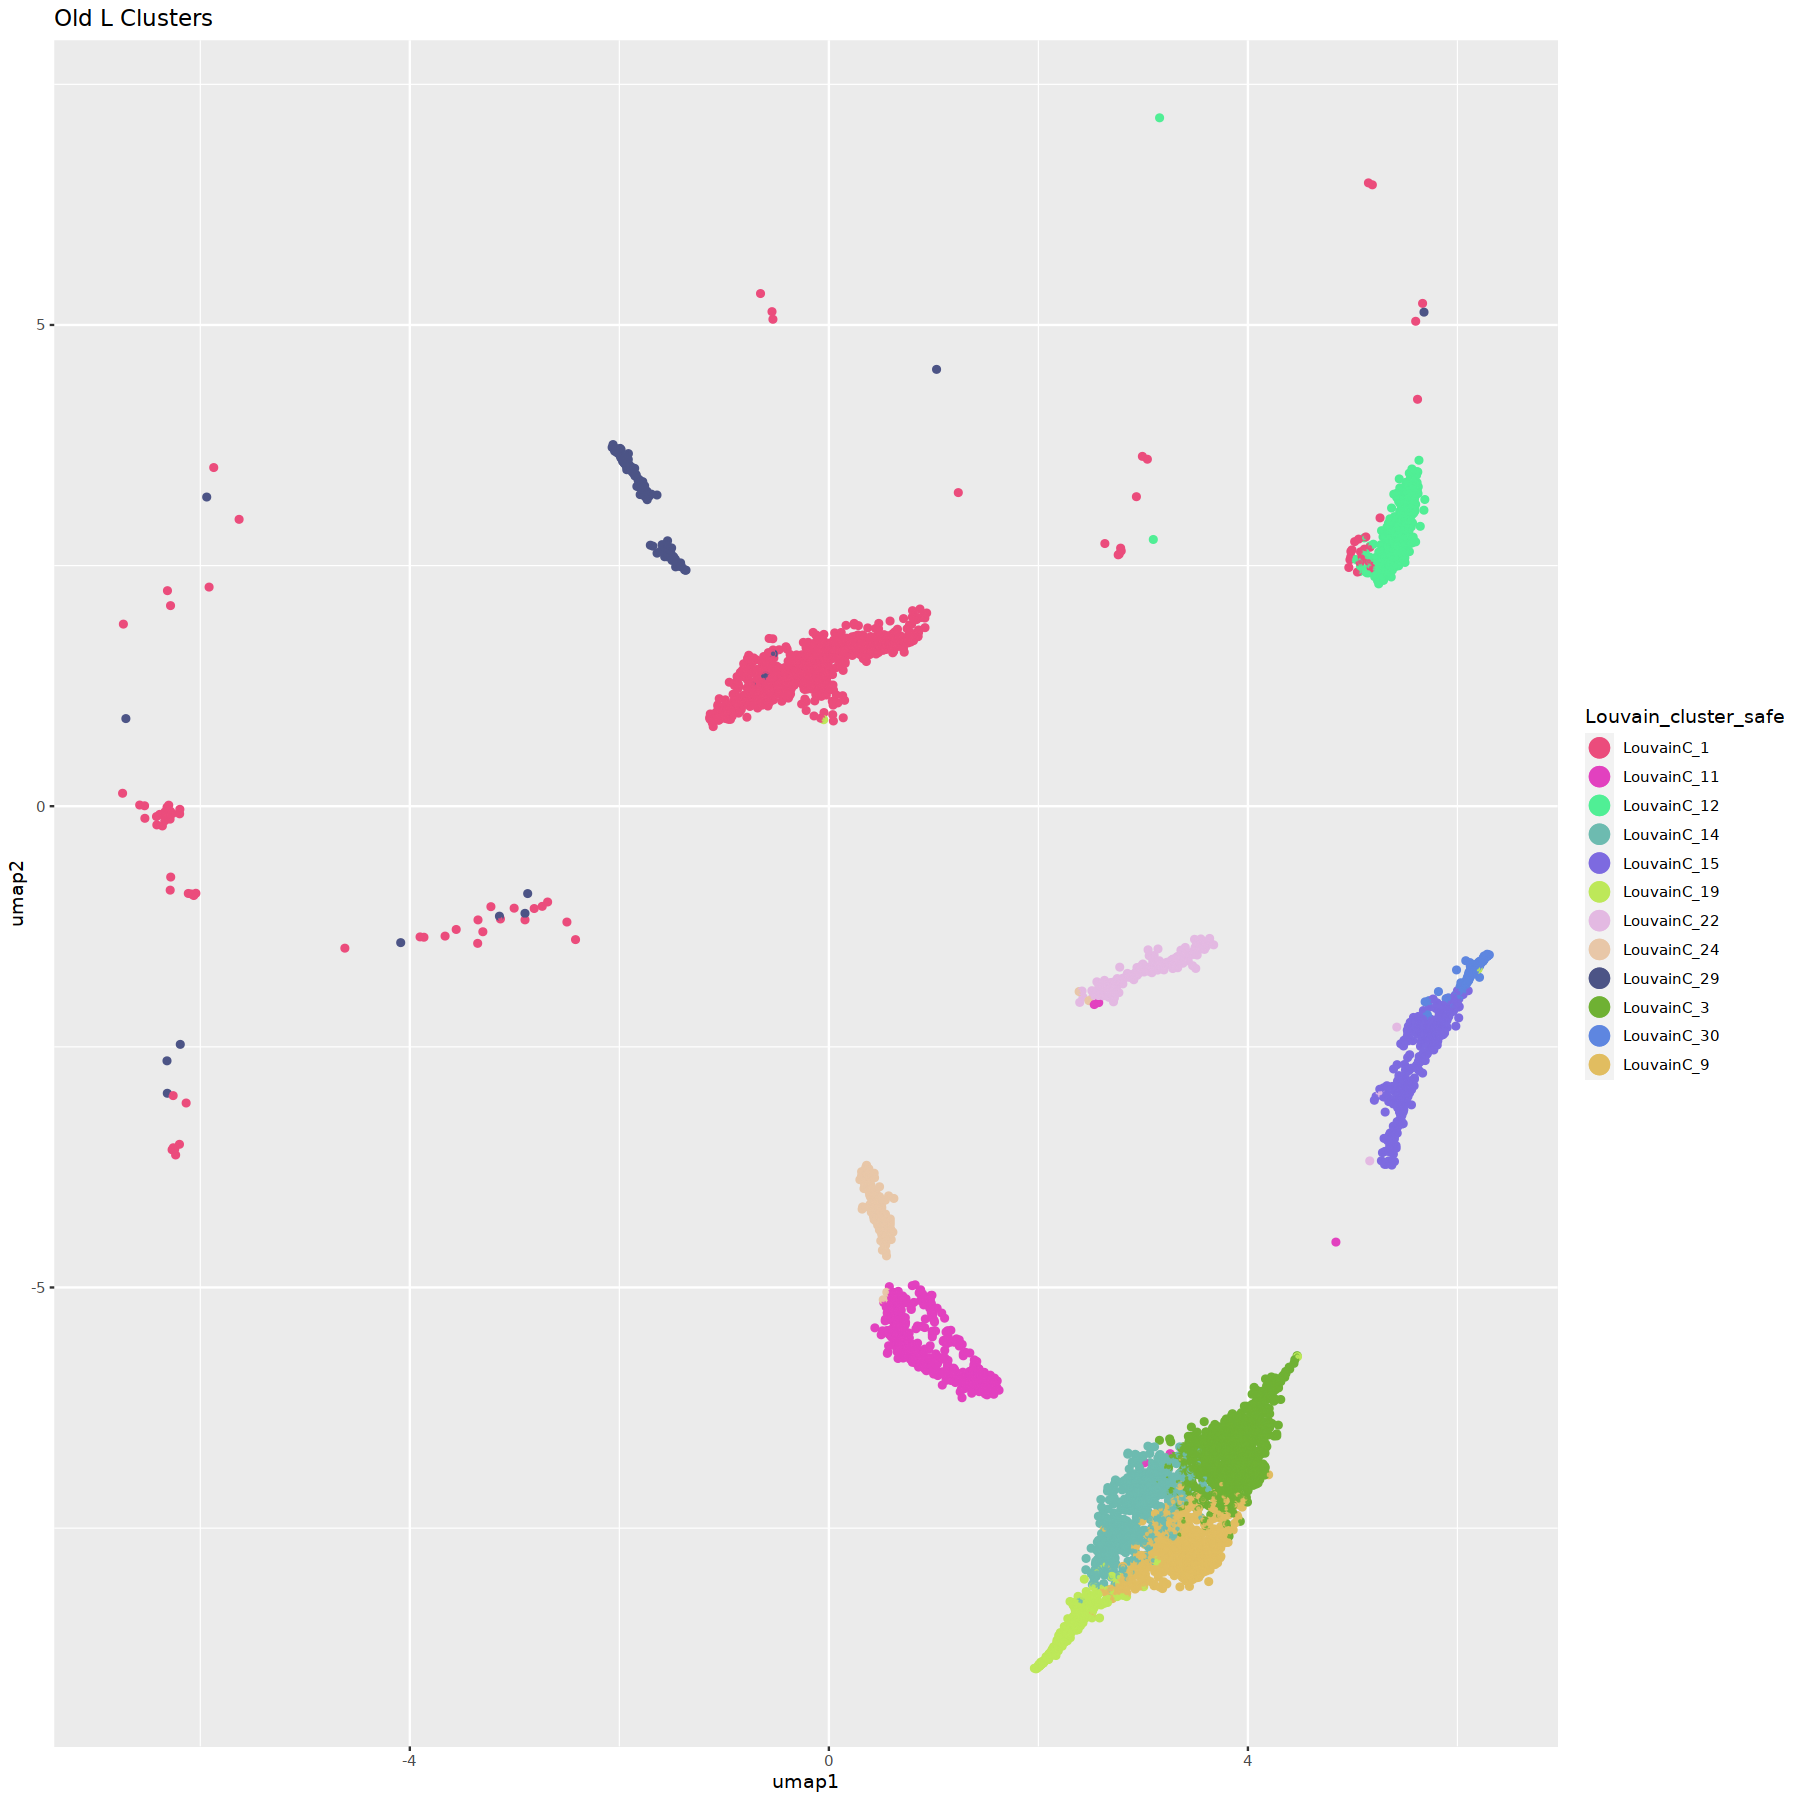

In [19]:
library(cowplot)
library(randomcoloR)
options(repr.plot.width=15, repr.plot.height=15)
other <- randomcoloR::distinctColorPalette(k = 55)
other <- sample(other)


Sb.subcluster.mesophyll <- Sb.subcluster

clusters <- c("LouvainC_9","LouvainC_14","LouvainC_19","LouvainC_3","LouvainC_24",
              "LouvainC_19","LouvainC_12", "LouvainC_1",
  "LouvainC_15","LouvainC_30","LouvainC_22","LouvainC_11", "LouvainC_29")

#c("LouvainC_18","LouvainC_5","LouvainC_7","LouvainC_32",
#  "LouvainC_24","LouvainC_21","LouvainC_8","LouvainC_20","LouvainC_23")

sb.loaded_socrates_data.mesophyll$Clusters  %>% 
    dplyr::filter(Louvain_cluster_safe %in% clusters) %>% 
    group_by(Louvain_cluster_safe) %>% 
    ggplot(., aes(umap1, umap2, color = Louvain_cluster_safe)) + geom_point() +
 scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8) + ggtitle("Old L Clusters")

chosen_subcluster <- sb.loaded_socrates_data.mesophyll$Clusters %>% 
    filter(Louvain_cluster_safe %in% clusters)

meta_df <- as.data.frame(chosen_subcluster)
rownames(meta_df) <- meta_df$cellID
Sb.subcluster.mesophyll$meta <- meta_df
Sb.subcluster.mesophyll$meta.v3 <- meta_df

In [20]:
Sb.subcluster.mesophyll <- generateMatrix(Sb.subcluster.mesophyll, 
                                              filtered=FALSE,
                                              peaks = FALSE,
                                              verbose=TRUE)


## Generate Sparse Matrix
Sb.subcluster.mesophyll <- convertSparseData(Sb.subcluster.mesophyll, verbose = TRUE)

 - converting triplet format to sparseMatrix



In [21]:
# clean sparse counts matrix ---------------------------------------------
Sb.subcluster.mesophyll <- cleanData(Sb.subcluster.mesophyll, 
                     min.t=0.005,  # minimum feature frequency across cells
                     max.t = .01,
                     verbose=T)


   * Input: cells = 5847 | peaks = 694096

   * Filtered: cells = 5847 | peaks = 81208



In [22]:
# normalize with TFIDF ---------------------------------------------------
Sb.subcluster.mesophyll.tfidf <- tfidf(Sb.subcluster.mesophyll)

# project with NMF -------------------------------------------------------
Sb.subcluster.mesophyll.tfidf <- reduceDims(Sb.subcluster.mesophyll.tfidf,
                      method="SVD", 
                      n.pcs=30, 
                      svd_slotName="SVD")

 - non-linear dimensionality reduction with UMAP ...

09:44:30 UMAP embedding parameters a = 1.577 b = 0.8951

09:44:30 Read 5847 rows and found 29 numeric columns

09:44:30 Using Annoy for neighbor search, n_neighbors = 30

09:44:30 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

09:44:31 Writing NN index file to temp file /tmp/Rtmpa9B3RO/file2537862ad4d9

09:44:31 Searching Annoy index using 16 threads, search_k = 3000

09:44:31 Annoy recall = 100%

09:44:40 Commencing smooth kNN distance calibration using 16 threads

09:44:43 Initializing from normalized Laplacian + noise

09:44:43 Commencing optimization for 500 epochs, with 268114 positive edges

09:45:09 Optimization finished



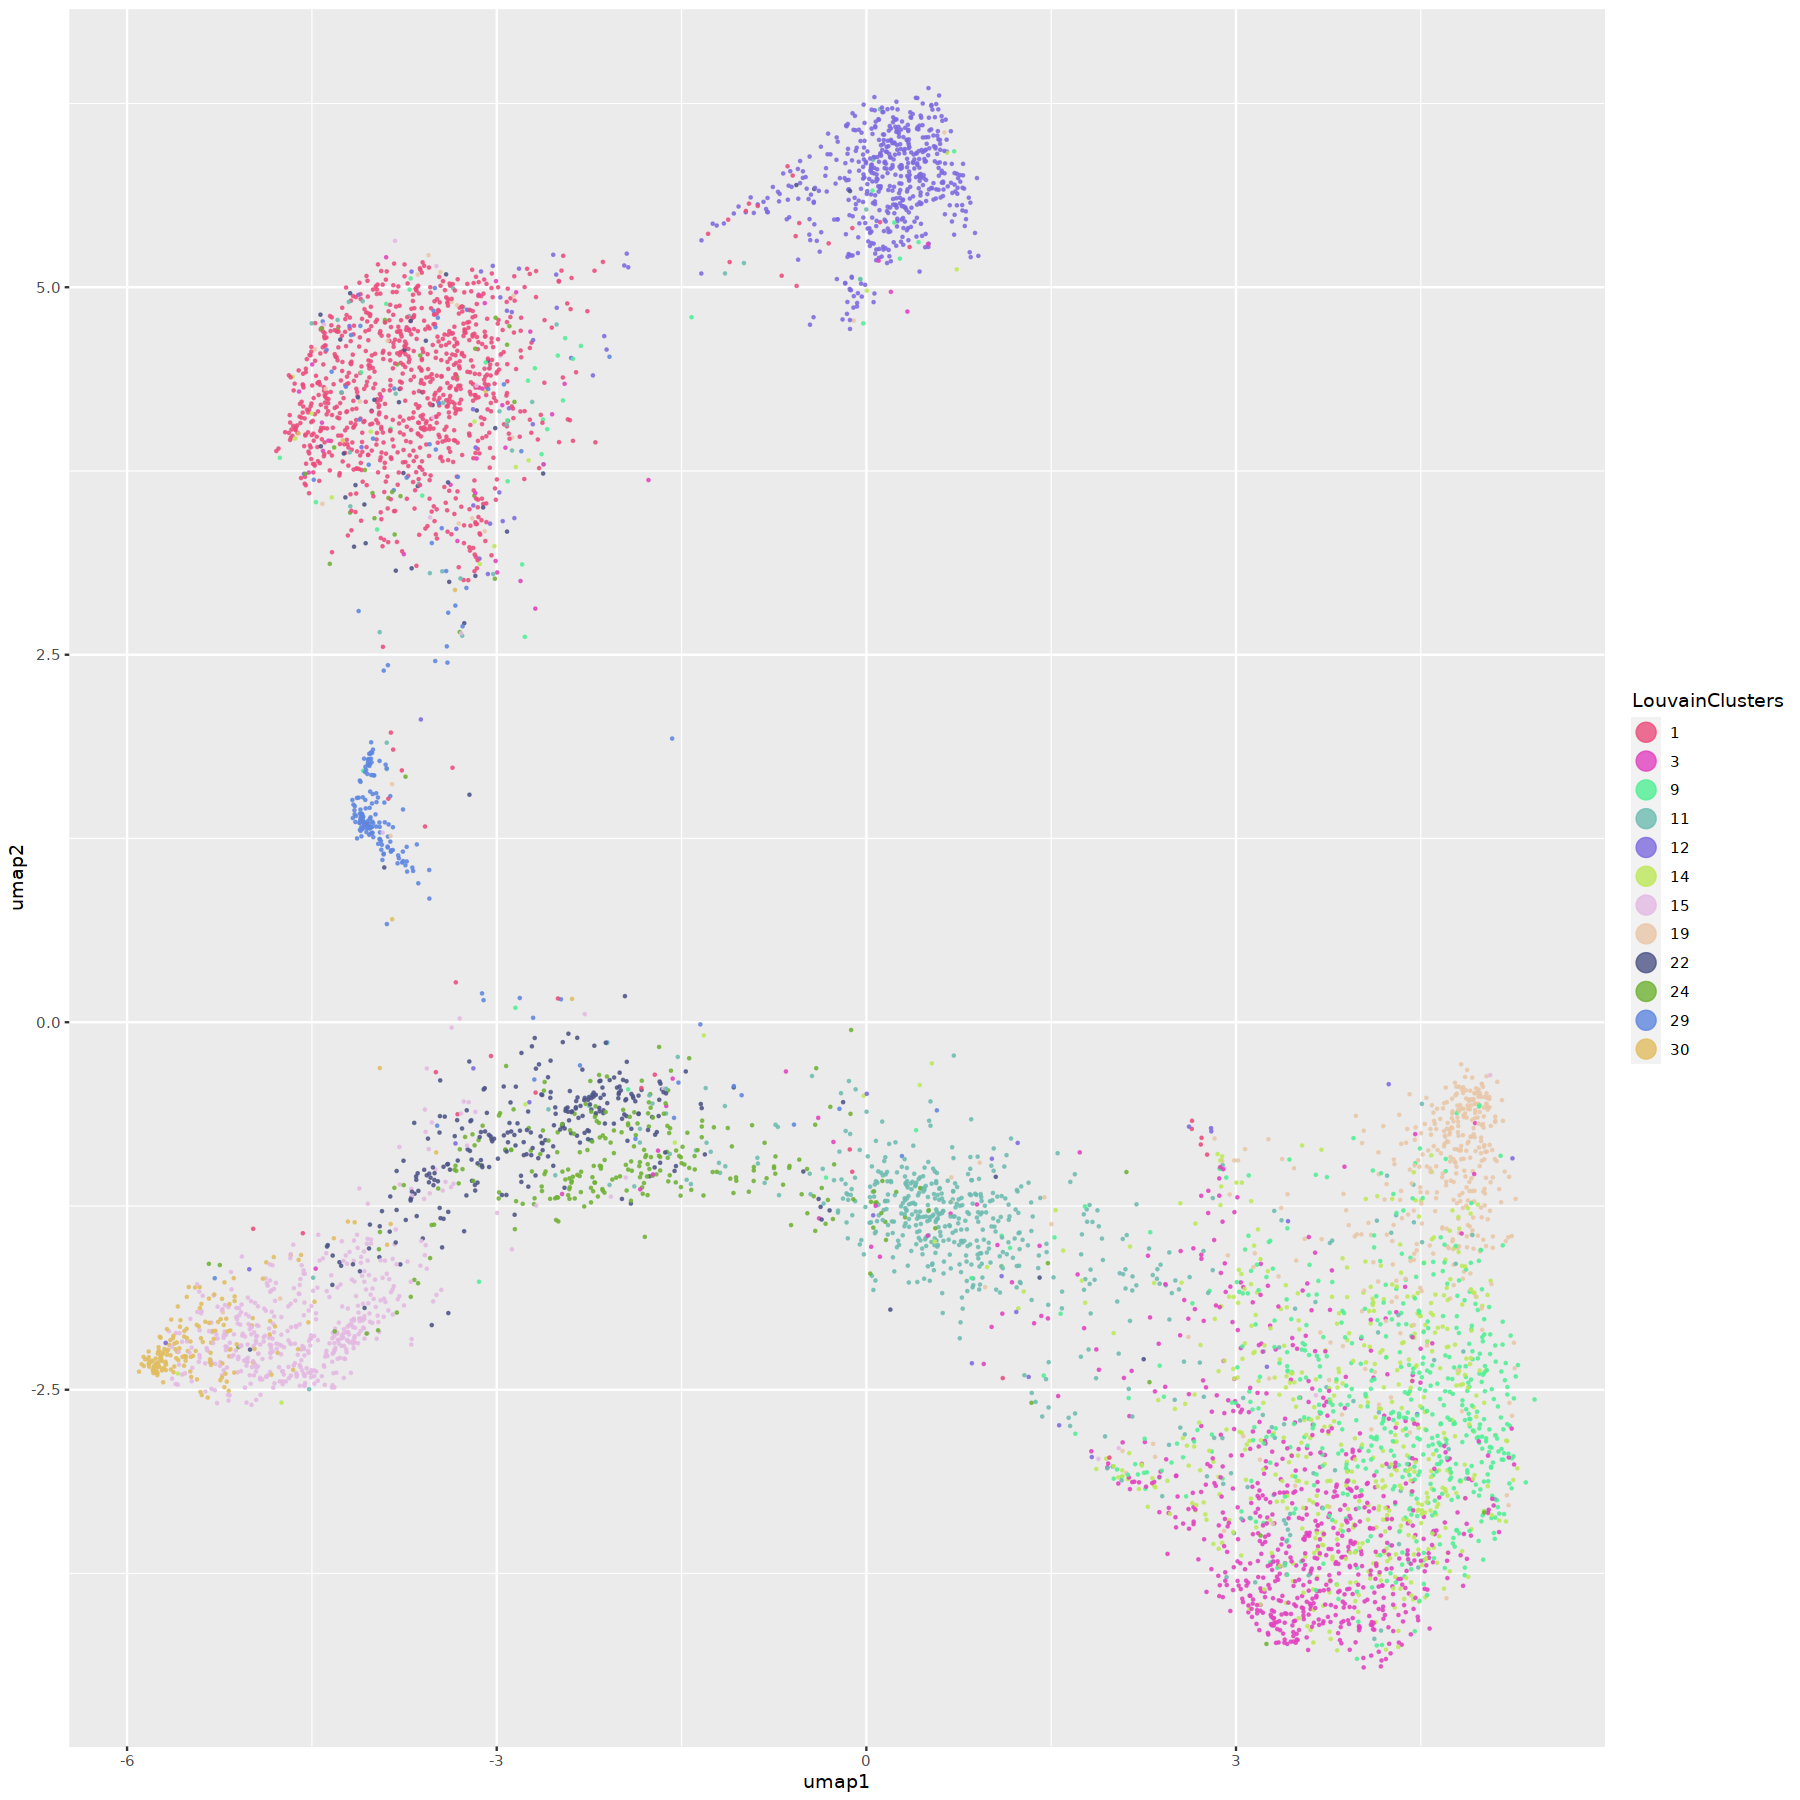

In [23]:
# reduce to 2-dimensions with UMAP ---------------------------------------
Sb.subcluster.mesophyll.tfidf <- projectUMAP(Sb.subcluster.mesophyll.tfidf, 
                       verbose=T,
                       k.near=30,
                       m.dist=0.1,
                       svd_slotName="SVD")


ggplot(Sb.subcluster.mesophyll.tfidf$meta, aes(x=umap1, y = umap2, color = LouvainClusters)) +
  scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8)

In [26]:
# identify clusters using neighborhood graph -----------------------------
Sb.subcluster.mesophyll.tfidf.cluster <- callClusters(Sb.subcluster.mesophyll.tfidf, 
                        res=2.5,
                        k.near = 30,
                        #min.reads=1000,
                        verbose=T,
                        svd_slotName= "SVD",
                        cluster_slotName="sub_cluster",
                        cleanCluster=FALSE)


 - filtering outliers in UMAP manifold (z-score e.thresh = 3) ...

 - creating seurat object for graph-based clustering ...

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 5729
Number of edges: 401175

Running Louvain algorithm...
Maximum modularity in 100 random starts: 0.6194
Number of communities: 14
Elapsed time: 8 seconds


 - finished graph-based clustering ...

 - filtering clusters with low cell/read counts ...



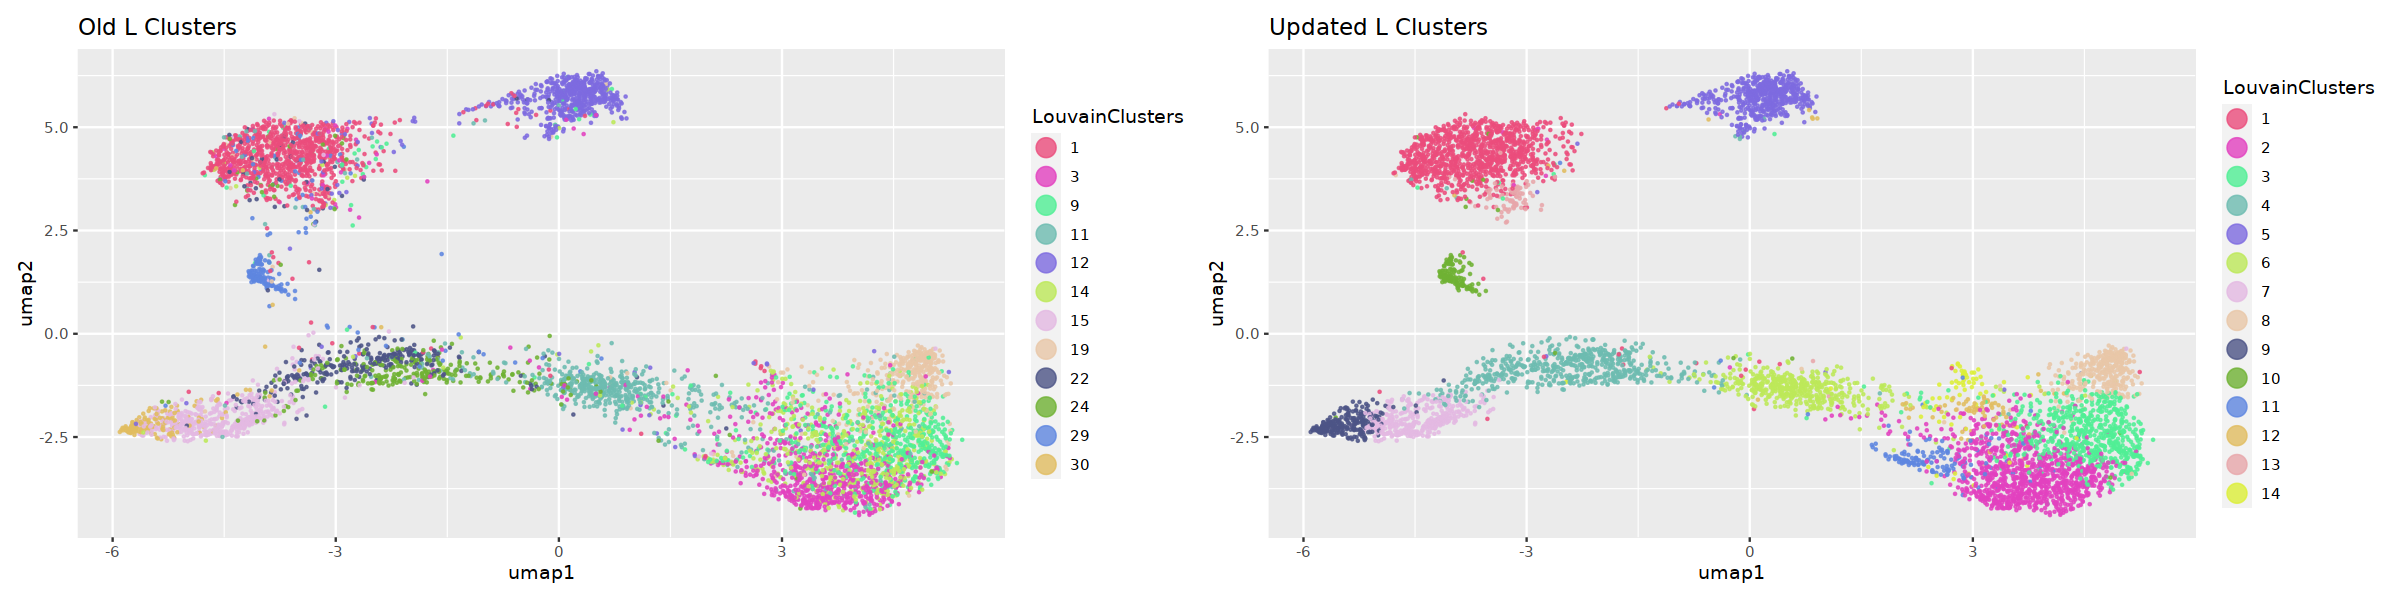

In [27]:
options(repr.plot.width=20, repr.plot.height=5)

old_clusters <- ggplot(Sb.subcluster.mesophyll.tfidf.cluster$meta, aes(x=umap1, y = umap2, color = LouvainClusters)) +
  scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8)+ ggtitle("Old L Clusters")

new_clusters <- ggplot(Sb.subcluster.mesophyll.tfidf.cluster$sub_cluster, aes(x=umap1, y = umap2, color = LouvainClusters)) +
  scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8) + ggtitle("Updated L Clusters")


old_clusters + new_clusters 

In [28]:
### Kernal Corrupted to just linked to the previosly run gene body accessability calculations
Sb.subcluster.mesophyll.tfidf.cluster.cluster <- Sb.subcluster.mesophyll.tfidf.cluster
Sb.subcluster.mesophyll.tfidf.cluster.cluster$acr_counts_raw <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/sorghum_bicolor/clustering/Sb.gene_counts.output"
## Execute Annotation Attempt #1

library(presto)
Sb.subcluster.mesophyll.tfidf.cluster.cluster <- run_presto(Sb.subcluster.mesophyll.tfidf.cluster.cluster,
           meta_slot = "sub_cluster",
           counts_raw = "acr_counts_raw",
           cluster_name = "LouvainClusters")

# A tibble: 6 × 14
  cellID       total   tss  acrs  ptmt nSites log10nSites sampleID  umap1  umap2
  <chr>        <dbl> <dbl> <dbl> <dbl>  <dbl>       <dbl> <chr>     <dbl>  <dbl>
1 BC:Z:CGATG… 159908 50092 29336     0  69127        4.84 rep1     -3.48   4.22 
2 BC:Z:TGACC… 115159 66137 88585     0  35122        4.55 rep1     -2.17  -0.402
3 BC:Z:TTAGG…  97214 55597 66879     0  34587        4.54 rep1     -4.56   3.66 
4 BC:Z:TTAGG…  88482 54555 72636     0  28966        4.46 rep1      0.333  4.83 
5 BC:Z:ACAGT…  85372 44652 47133     0  34058        4.53 rep1     -4.52   3.87 
6 BC:Z:ATCAC…  79947 38798 43908     0  32706        4.51 rep1     -3.42  -0.642
# … with 4 more variables: doubletscore <dbl>, d.type <chr>,
#   LouvainClusters <fct>, Louvain_cluster_safe <chr>
# A tibble: 6 × 3
  gene_name        barcode                                         accessability
  <chr>            <chr>                                                   <dbl>
1 Sobic.001G125600 BC:Z:ACAGTGCTTGTATG

In [29]:
grabbed_top_marker_per_cluster <- top_markers(Sb.subcluster.mesophyll.tfidf.cluster.cluster$presto_marker, 200)

represented_marker_lst <- list()
for (i in unique(Sb.subcluster.mesophyll.tfidf.cluster.cluster$sub_cluster$LouvainClusters)) {
    
    make_set <- setNames("geneID",i) 
    markers_present_in_presto <- left_join(grabbed_top_marker_per_cluster, 
                                           marker_list_sb, by = make_set)  %>% 
    dplyr::filter(is.na(chr) != TRUE)  %>% 
    dplyr::select(rank, i, chr:tissue) %>% 
    dplyr::rename("geneID" = i)
    
    represented_marker_lst[[i]] <- markers_present_in_presto
}
                 
represented_marker_lst

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(i)` instead of `i` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.


$`1`
# A tibble: 0 × 8
# … with 8 variables: rank <int>, geneID <chr>, chr <chr>, start <dbl>,
#   end <dbl>, name <chr>, type <chr>, tissue <chr>

$`4`
# A tibble: 3 × 8
   rank geneID                chr      start      end name  type          tissue
  <int> <chr>                 <chr>    <dbl>    <dbl> <chr> <chr>         <chr> 
1     2 Sorbiv5.1_pg9159.m1.g Chr06 41574374 41588764 ba2   axillary_mer… axill…
2   123 Sobic.002G207900      Chr02 61233338 61239219 gl1   epidermis     axill…
3   185 Sobic.008G193300      Chr08 65745228 65750046 sut2  companion_ce… axill…

$`3`
# A tibble: 2 × 8
   rank geneID                        chr      start      end name  type  tissue
  <int> <chr>                         <chr>    <dbl>    <dbl> <chr> <chr> <chr> 
1     1 Sobic.010G160700              Chr10 48834723 48842334 pepc1 meso… axill…
2     7 Sorbiv5.1_pg15362.valid.m24.g Chr03 63610236 63623676 cah1  meso… axill…

$`7`
# A tibble: 3 × 8
   rank geneID                       chr      start      end name   type  tissue
  <int> <chr>                        <chr>    <dbl>    <dbl> <chr>  <chr> <chr> 
1   108 Sorbiv5.1_pg10258.valid.m1.g Chr10 11111919 11115601 fea4   peri… axill…
2   129 Sobic.001G267100             Chr01 54978216 54983302 ZmLAX2 proc… axill…
3   155 Sobic.001G499200             Chr01 81035681 81040362 nod    stom… axill…

$`5`
# A tibble: 5 × 8
   rank geneID                 chr      start      end name         type  tissue
  <int> <chr>                  <chr>    <dbl>    <dbl> <chr>        <chr> <chr> 
1    41 Sorbiv5.1_pg15531.m1.g Chr03  3341071  3347117 me3_ortho_c… bund… axill…
2    82 Sobic.005G042000       Chr05  3935393  3936843 ssu2__ssu1   bund… axill…
3   142 Sobic.007G141200       Chr07 60395810 60403219 ccr1         vasc… axill…
4   181 Sobic.001G327900       Chr01 65660828 65664161 shr1         matu… axill…
5   186 Sobic.008G094000       Chr08 46768135 46771205 sweet13a_or… abax… leaf  

$`6`
# A tibble: 3 × 8
   rank geneID                        chr      start      end name  type  tissue
  <int> <chr>                         <chr>    <dbl>    <dbl> <chr> <chr> <chr> 
1     7 Sorbiv5.1_pg15362.valid.m24.g Chr03 63610236 63623676 cah1  meso… axill…
2    55 Sobic.010G160700              Chr10 48834723 48842334 pepc1 meso… axill…
3    72 Sobic.008G193300              Chr08 65745228 65750046 sut2  comp… axill…

$`8`
# A tibble: 2 × 8
   rank geneID           chr      start      end name  type               tissue
  <int> <chr>            <chr>    <dbl>    <dbl> <chr> <chr>              <chr> 
1     9 Sobic.010G160700 Chr10 48834723 48842334 pepc1 mesophyll          axill…
2   190 Sobic.004G356500 Chr04 70910283 70912517 brk1  subsidiary_mother… axill…

$`2`
# A tibble: 3 × 8
   rank geneID                        chr      start      end name  type  tissue
  <int> <chr>                         <chr>    <dbl>    <dbl> <chr> <chr> <chr> 
1     1 Sobic.010G160700              Chr10 48834723 48842334 pepc1 meso… axill…
2     3 Sorbiv5.1_pg15362.valid.m24.g Chr03 63610236 63623676 cah1  meso… axill…
3    66 Sobic.005G042000              Chr05  3935393  3936843 ssu2… bund… axill…

$`10`
# A tibble: 4 × 8
   rank geneID                      chr      start      end name    type  tissue
  <int> <chr>                       <chr>    <dbl>    <dbl> <chr>   <chr> <chr> 
1     7 Sobic.001G221900            Chr01 21229983 21235639 ad1     prot… axill…
2    11 Sobic.002G343500            Chr02 72301461 72308725 ZmCPK3… guar… axill…
3    36 Sobic.007G003000            Chr07   278193   279964 vnd7_1  prot… axill…
4    59 Sorbiv5.1_pg5044.valid.m7.g Chr01 66616555 66619678 bk1     vasc… axill…

$`9`
# A tibble: 2 × 8
   rank geneID                       chr      start      end name  type   tissue
  <int> <chr>                        <chr>    <dbl>    <dbl> <chr> <chr>  <chr> 
1    18 Sorbiv5.1_pg14938.valid.m7.g Chr03  8560607  8567782 ocl1  proto… axill…
2   140 Sobic.001G499200             Chr01 81035681 81040362 nod   stoma

In [34]:
gathered_markers <- bind_rows(represented_marker_lst, .id = "LouvainCluster")  %>% 
    arrange(LouvainCluster, rank)


write_delim(gathered_markers, 
            "/home/jpm73279/Mendieta_et_al_comparative_single_cell/metrics/annotations/V3_annotations/Sb_leaf.merged_replicates.Subclustering_mesophyll.LouvainCluster_annot_V3.presto.txt", 
            col_names = TRUE, quote = "none", delim = "\t")

gathered_markers

LouvainCluster rank geneID                        chr   start    end     
1  10               7  Sobic.001G221900              Chr01 21229983 21235639
2  10              11  Sobic.002G343500              Chr02 72301461 72308725
3  10              36  Sobic.007G003000              Chr07   278193   279964
4  10              59  Sorbiv5.1_pg5044.valid.m7.g   Chr01 66616555 66619678
5  11               3  Sobic.010G160700              Chr10 48834723 48842334
6  13             145  Sorbiv5.1_pg7389.valid.m23.g  Chr06 60678690 60686342
7  14             190  Sorbiv5.1_pg3725.valid.m5.g   Chr01 60301159 60308114
8  2                1  Sobic.010G160700              Chr10 48834723 48842334
9  2                3  Sorbiv5.1_pg15362.valid.m24.g Chr03 63610236 63623676
10 2               66  Sobic.005G042000              Chr05  3935393  3936843
11 3                1  Sobic.010G160700              Chr10 48834723 48842334
12 3                7  Sorbiv5.1_pg15362.valid.m24.g Chr03 63610236 63623676
13 4                2  Sorbiv5.1_pg9159.m1.g         Chr06 41574374 41588764
14 4              123  Sobic.002G207900              Chr02 61233338 61239219
15 4              185  Sobic.008G193300              Chr08 65745228 65750046
16 5               41  Sorbiv5.1_pg15531.m1.g        Chr03  3341071  3347117
17 5               82  Sobic.005G042000              Chr05  3935393  3936843
18 5              142  Sobic.007G141200              Chr07 60395810 60403219
19 5              181  Sobic.001G327900              Chr01 65660828 65664161
20 5              186  Sobic.008G094000              Chr08 46768135 46771205
21 6                7  Sorbiv5.1_pg15362.valid.m24.g Chr03 63610236 63623676
22 6               55  Sobic.010G160700              Chr10 48834723 48842334
23 6               72  Sobic.008G193300              Chr08 65745228 65750046
24 7              108  Sorbiv5.1_pg10258.valid.m1.g  Chr10 11111919 11115601
25 7              129  Sobic.001G267100              Chr01 54978216 54983302
26 7              155  Sobic.001G499200              Chr01 81035681 81040362
27 8                9  Sobic.010G160700              Chr10 48834723 48842334
28 8              190  Sobic.004G356500              Chr04 70910283 70912517
29 9               18  Sorbiv5.1_pg14938.valid.m7.g  Chr03  8560607  8567782
30 9              140  Sobic.001G499200              Chr01 81035681 81040362
   name                                                                  
1  ad1                                                                   
2  ZmCPK37__ZmCPK35                                                      
3  vnd7_1                                                                
4  bk1                                                                   
5  pepc1                                                                 
6  ZmMP_1__ZmMP_2                                                        
7  ocl4                                                                  
8  pepc1                                                                 
9  cah1                                                                  
10 ssu2__ssu1                                                            
11 pepc1                                                                 
12 cah1                                                                  
13 ba2                                                                   
14 gl1                                                                   
15 sut2                                                                  
16 me3_ortho_count_1                                                     
17 ssu2__ssu1                                                            
18 ccr1                                                                  
19 shr1                                                                  
20 sweet13a_ortho_count_1__sweet13b_ortho_count_1__sweet13c_ortho_count_1
21 cah1                                                       

In [32]:

prefix <- "Sb_leaf.merged_replicates.Subclustering_mesophyll"
output_location <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/sorghum_bicolor/clustering/"

# output text files
nmf.meta <- Sb.subcluster.mesophyll.tfidf.cluster$sub_cluster
nmf.rd <- Sb.subcluster.mesophyll.tfidf.cluster$SVD

write.table(nmf.meta, file=paste0(output_location,prefix, ".SVD.full.metadata.txt"), quote=F, row.names=T, col.names=T, sep="\t")
write.table(nmf.rd, file=paste0(output_location, prefix, ".SVD.full.reduced_dimensions.txt"), quote=F, row.names=T, col.names=T, sep="\t")


#Generate Sparse Matrix-
trip <- as.data.frame(summary(Sb.subcluster.mesophyll.tfidf.cluster$counts))
trip$i <- rownames(Sb.subcluster.mesophyll.tfidf.cluster$counts)[trip$i]
trip$j <- colnames(Sb.subcluster.mesophyll.tfidf.cluster$counts)[trip$j]

write.table(trip, file=paste0(output_location, prefix, ".SVD.sparse"), quote=F, row.names=T, col.names=T, sep="\t")



In [33]:
saveRDS(Sb.subcluster.mesophyll.tfidf.cluster, file = paste0(output_location, prefix, ".rds"))

# Re-Clustering Unknown Epidermal and Central Lineage




In [7]:
sb.loaded_socrates_data.LC1 <- loaded_socrates_data
cleaned_cluster_meta <- sb.loaded_socrates_data.LC1$Clusters  %>% 
        group_by(LouvainClusters)  %>% 
        mutate(Louvain_cluster_safe = str_c("LouvainC_", LouvainClusters))
    
sb.loaded_socrates_data.LC1$Clusters <- cleaned_cluster_meta

 - converting triplet format to sparseMatrix



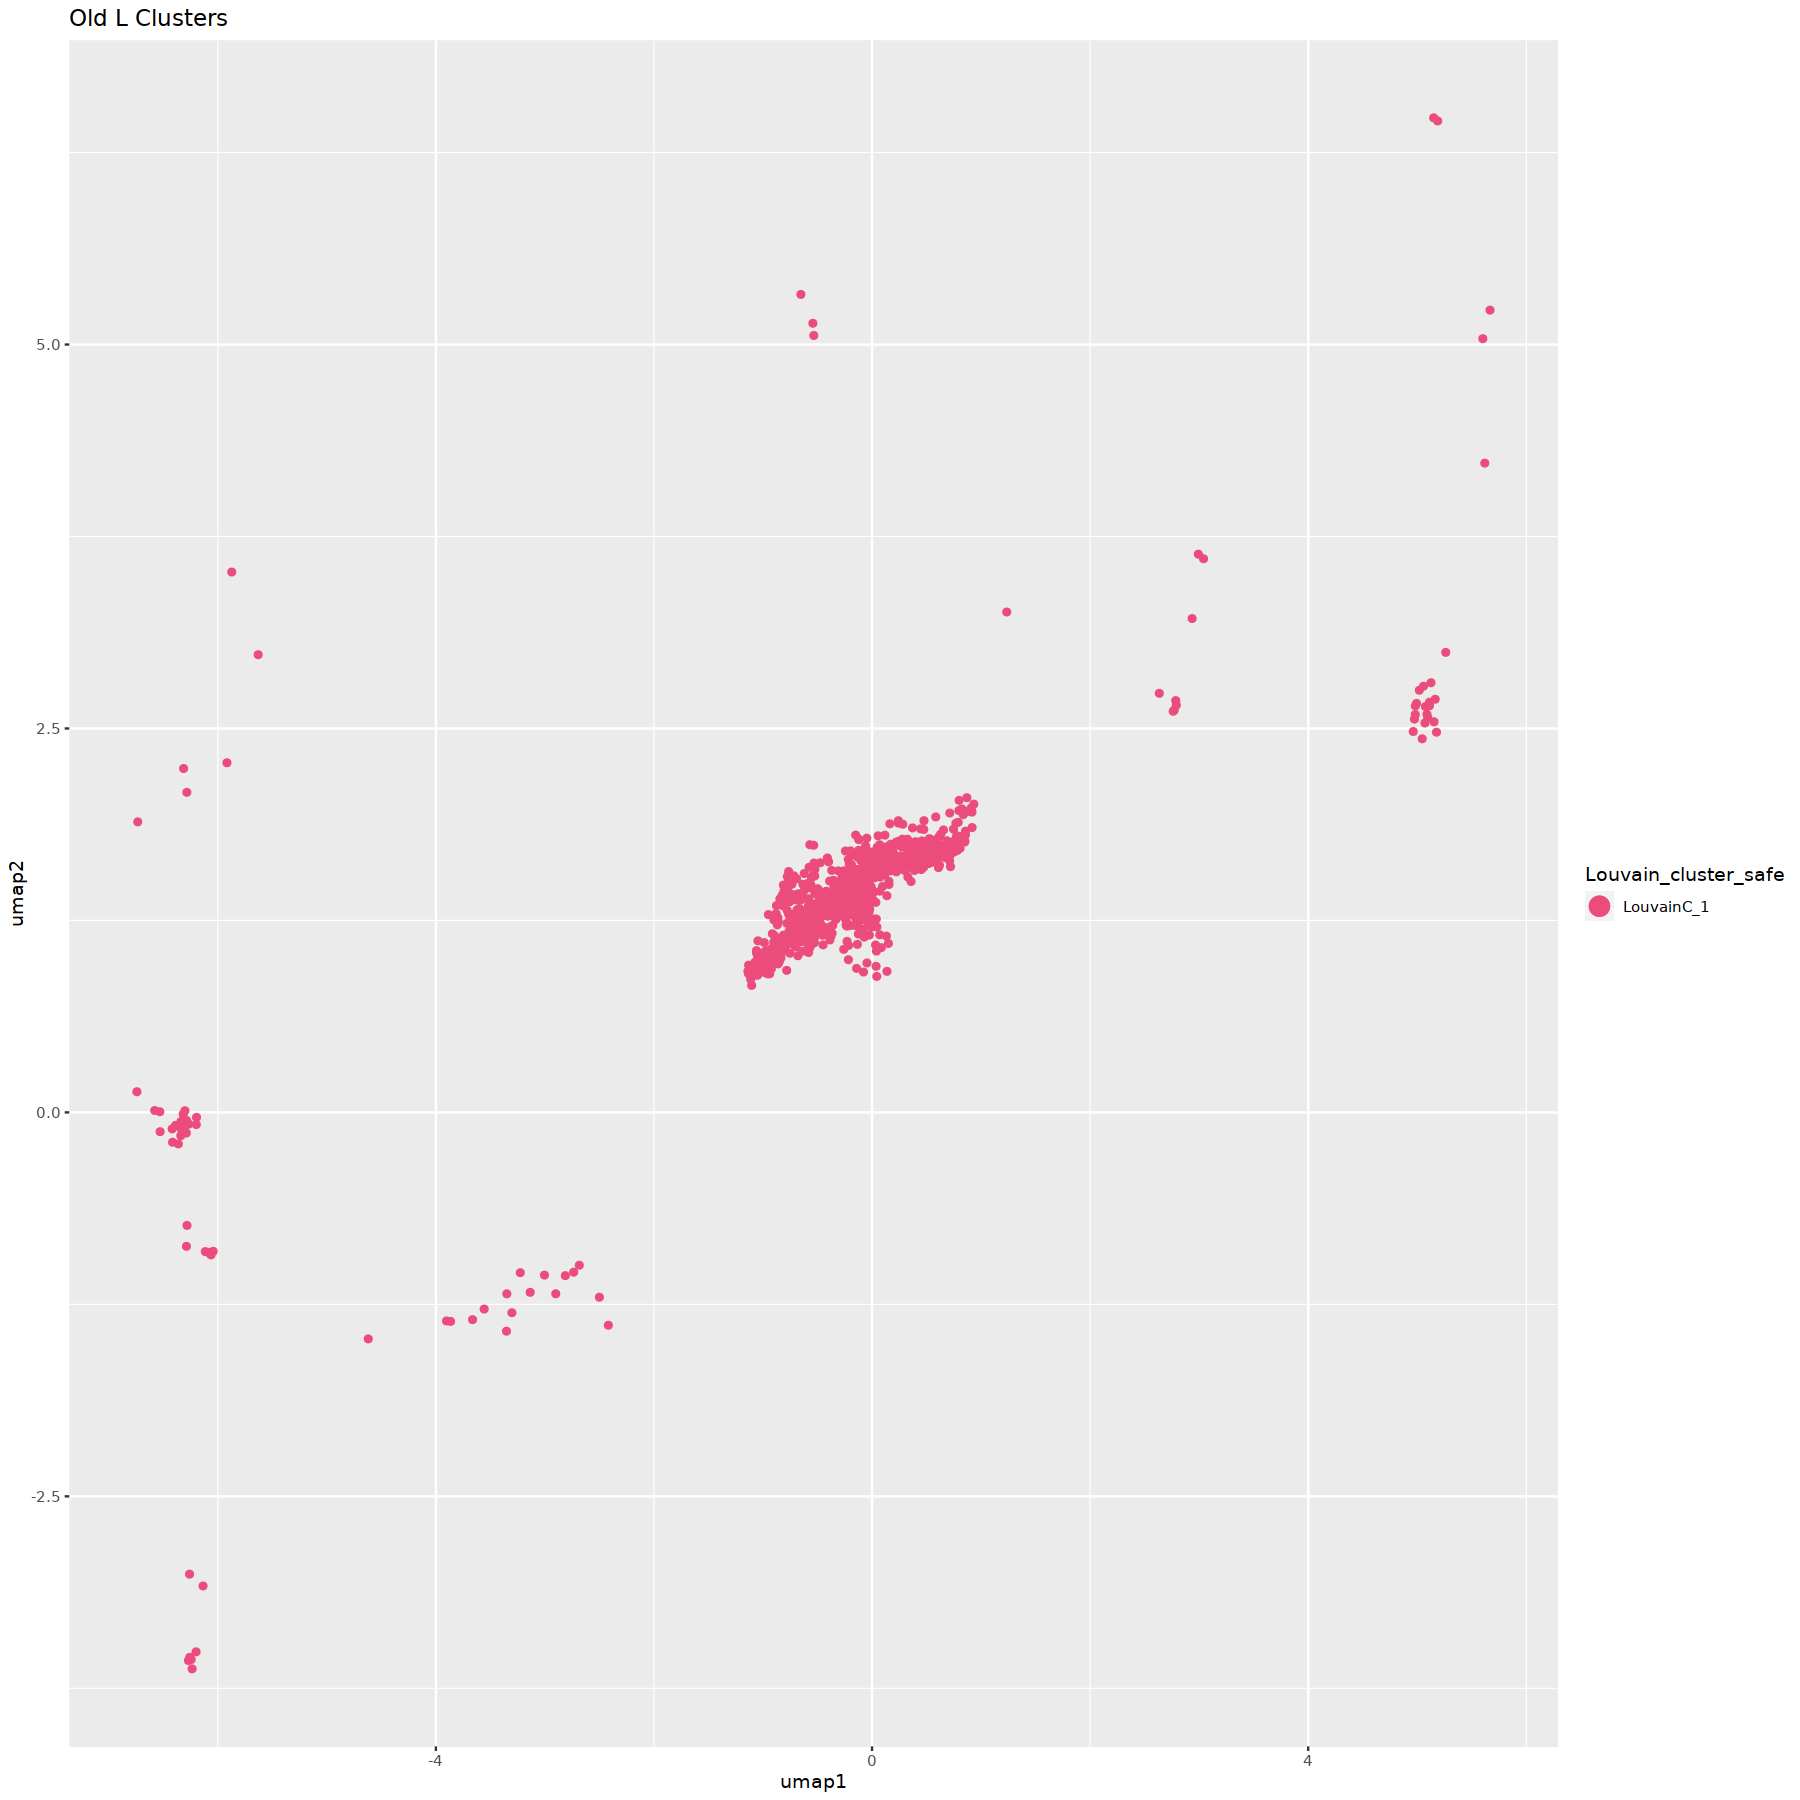

In [21]:
library(cowplot)
library(randomcoloR)
options(repr.plot.width=15, repr.plot.height=15)
other <- randomcoloR::distinctColorPalette(k = 55)
other <- sample(other)


Sb.subcluster.LC1 <- Sb.subcluster

clusters <- c("LouvainC_1")

#c("LouvainC_18","LouvainC_5","LouvainC_7","LouvainC_32",
#  "LouvainC_24","LouvainC_21","LouvainC_8","LouvainC_20","LouvainC_23")

sb.loaded_socrates_data.LC1$Clusters  %>% 
    dplyr::filter(Louvain_cluster_safe %in% clusters) %>% 
    group_by(Louvain_cluster_safe) %>% 
    ggplot(., aes(umap1, umap2, color = Louvain_cluster_safe)) + geom_point() +
 scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8) + ggtitle("Old L Clusters")

chosen_subcluster <- sb.loaded_socrates_data.LC1$Clusters %>% 
    filter(Louvain_cluster_safe %in% clusters)

meta_df <- as.data.frame(chosen_subcluster)
rownames(meta_df) <- meta_df$cellID
Sb.subcluster.LC1$meta <- meta_df
Sb.subcluster.LC1$meta.v3 <- meta_df



Sb.subcluster.LC1$acr <- read.table("/scratch/jpm73279/comparative_single_cell/07.call.ACRs/Sb_peak_calls/Sb.peaks/Sb.cluster_peaks.500bp_peaks.bed")

Sb.subcluster.LC1 <- generateMatrix(Sb.subcluster.LC1, 
                                              filtered=FALSE,
                                              peaks = TRUE,
                                              verbose=TRUE)


## Generate Sparse Matrix
Sb.subcluster.LC1 <- convertSparseData(Sb.subcluster.LC1, verbose = TRUE)

In [22]:
# clean sparse counts matrix ---------------------------------------------
Sb.subcluster.LC1 <- cleanData(Sb.subcluster.LC1, 
                     min.t=0.005,  # minimum feature frequency across cells
                     max.t = .05,
                     verbose=T)


   * Input: cells = 940 | peaks = 80004

   * Filtered: cells = 905 | peaks = 63125



In [23]:
# normalize with TFIDF ---------------------------------------------------
Sb.subcluster.LC1.tfidf <- tfidf(Sb.subcluster.LC1)

# project with NMF -------------------------------------------------------
Sb.subcluster.LC1.tfidf <- reduceDims(Sb.subcluster.LC1.tfidf,
                      method="SVD", 
                      n.pcs=30, 
                      svd_slotName="SVD")

 - non-linear dimensionality reduction with UMAP ...

10:04:43 UMAP embedding parameters a = 1.577 b = 0.8951

10:04:43 Read 905 rows and found 30 numeric columns

10:04:43 Using Annoy for neighbor search, n_neighbors = 30

10:04:43 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:04:44 Writing NN index file to temp file /tmp/RtmpHlvP3Y/file380ec5ae447ad

10:04:44 Searching Annoy index using 16 threads, search_k = 3000

10:04:44 Annoy recall = 100%

10:04:56 Commencing smooth kNN distance calibration using 16 threads

10:04:59 Initializing from normalized Laplacian + noise

10:04:59 Commencing optimization for 500 epochs, with 45554 positive edges

10:05:05 Optimization finished



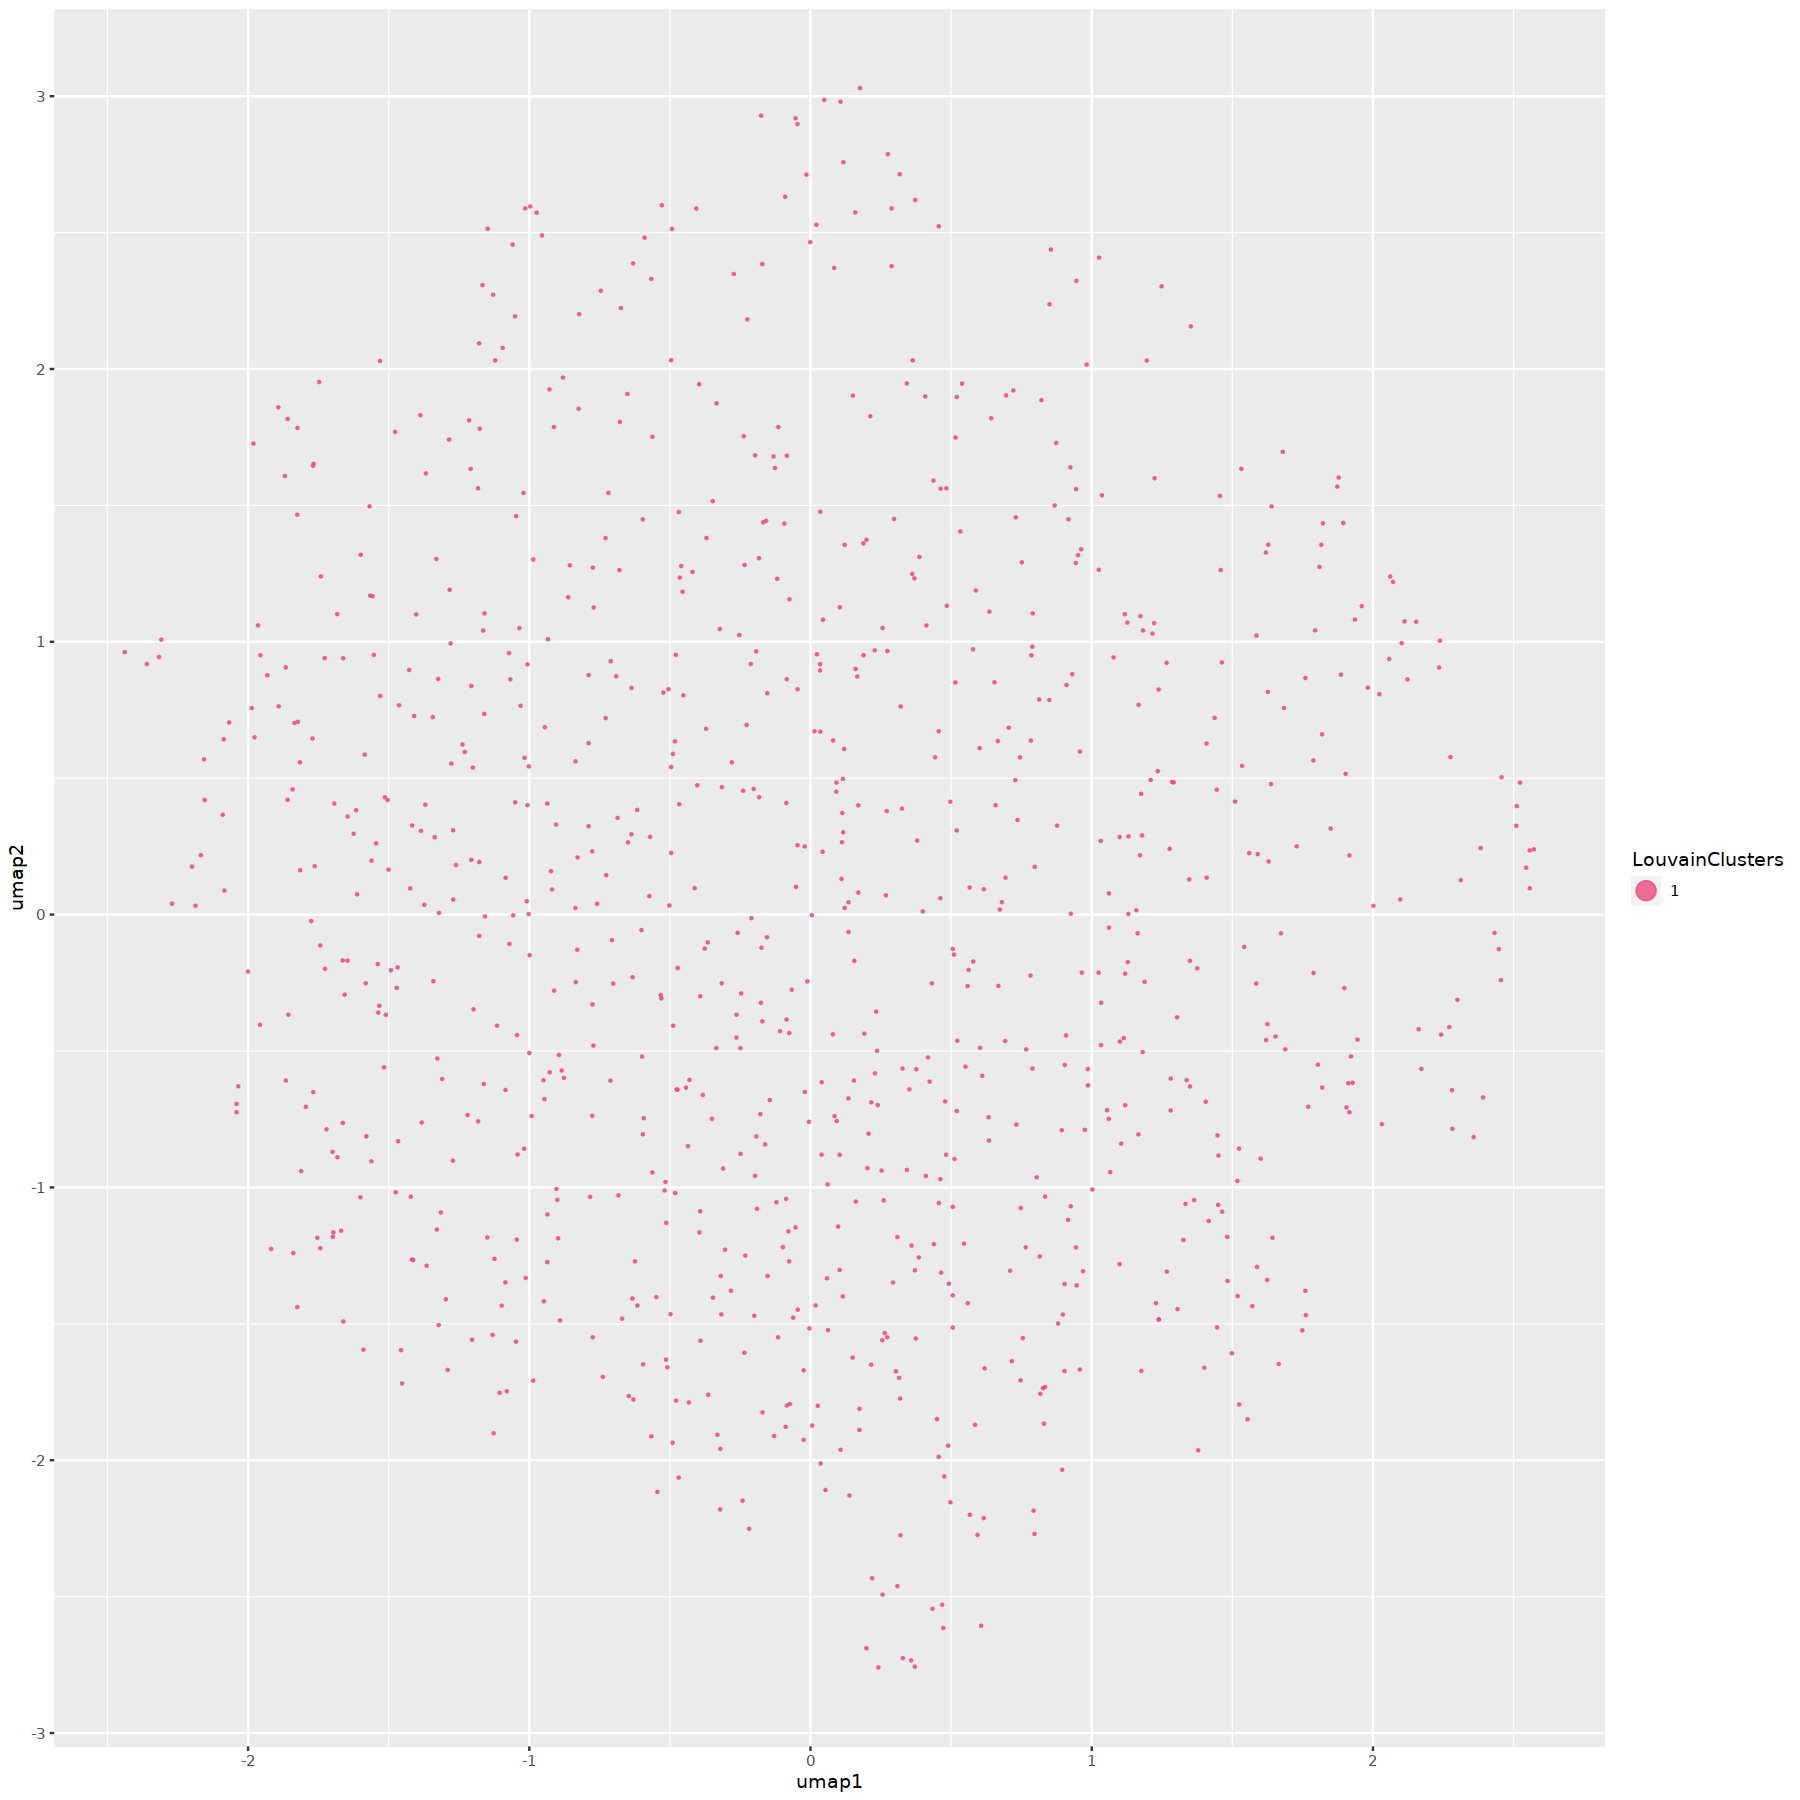

In [24]:
# reduce to 2-dimensions with UMAP ---------------------------------------
Sb.subcluster.LC1.tfidf <- projectUMAP(Sb.subcluster.LC1.tfidf, 
                       verbose=T,
                       k.near=30,
                       m.dist=0.1,
                       svd_slotName="SVD")


ggplot(Sb.subcluster.LC1.tfidf$meta, aes(x=umap1, y = umap2, color = LouvainClusters)) +
  scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8)

In [25]:
# identify clusters using neighborhood graph -----------------------------
Sb.subcluster.LC1.tfidf.cluster <- callClusters(Sb.subcluster.LC1.tfidf, 
                        res=2.5,
                        k.near = 30,
                        #min.reads=1000,
                        verbose=T,
                        svd_slotName= "SVD",
                        cluster_slotName="sub_cluster",
                        cleanCluster=FALSE)


 - filtering outliers in UMAP manifold (z-score e.thresh = 3) ...

 - creating seurat object for graph-based clustering ...

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 893
Number of edges: 94895

Running Louvain algorithm...
Maximum modularity in 100 random starts: 0.0320
Number of communities: 206
Elapsed time: 3 seconds


147 singletons identified. 59 final clusters.

 - finished graph-based clustering ...

 - filtering clusters with low cell/read counts ...



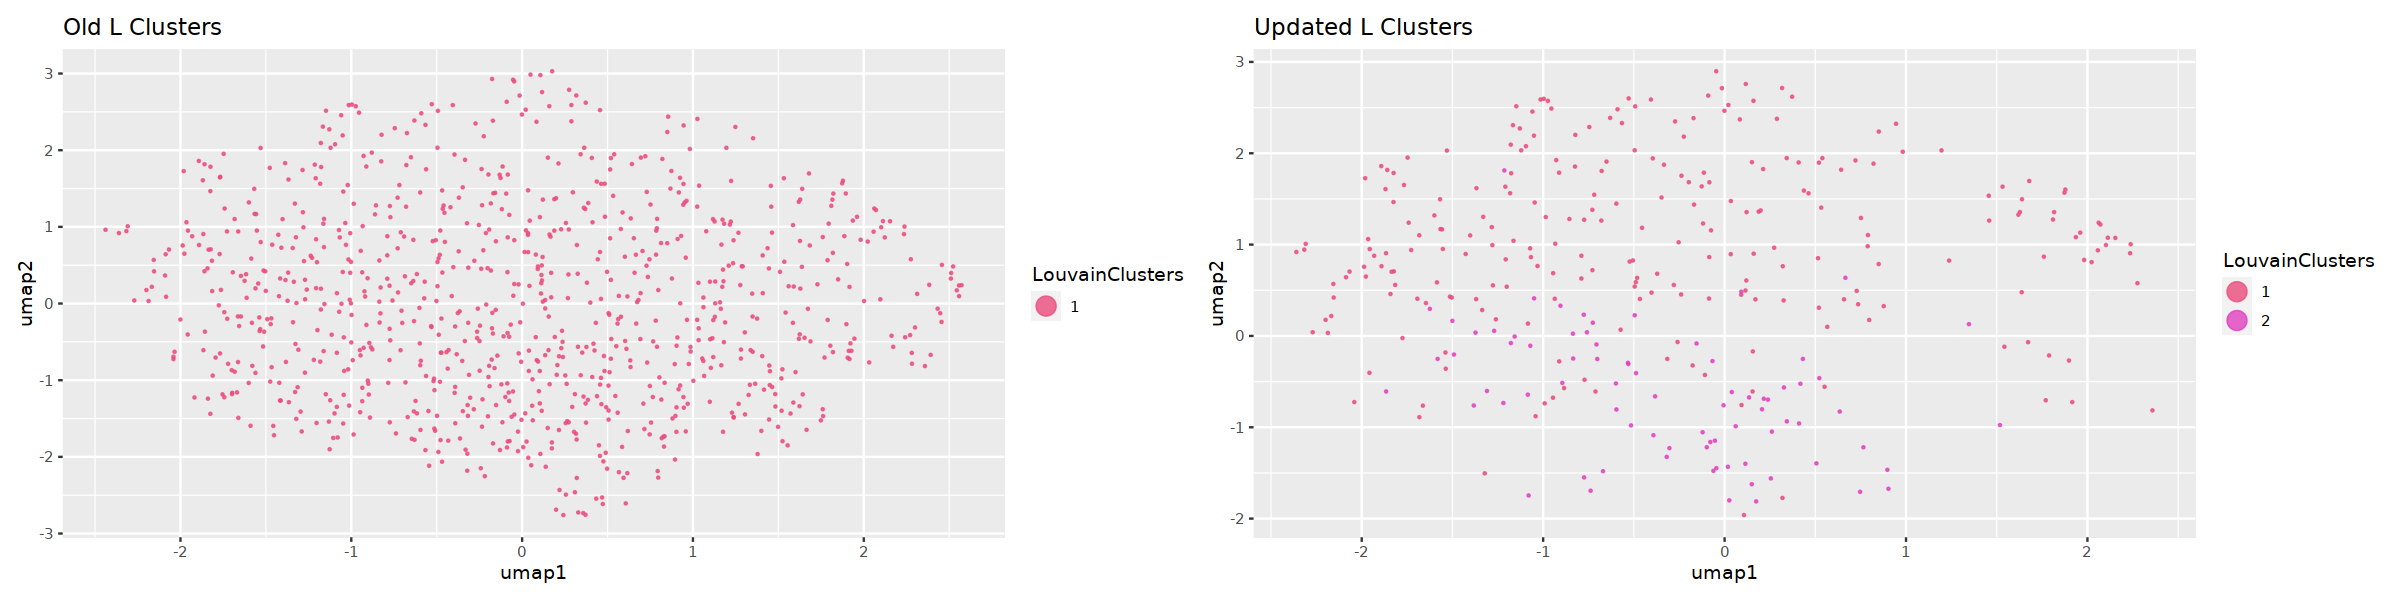

In [26]:
options(repr.plot.width=20, repr.plot.height=5)

old_clusters <- ggplot(Sb.subcluster.LC1.tfidf.cluster$meta, aes(x=umap1, y = umap2, color = LouvainClusters)) +
  scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8)+ ggtitle("Old L Clusters")

new_clusters <- ggplot(Sb.subcluster.LC1.tfidf.cluster$sub_cluster, aes(x=umap1, y = umap2, color = LouvainClusters)) +
  scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8) + ggtitle("Updated L Clusters")


old_clusters + new_clusters 

# Reclustering sieve elements

 - converting triplet format to sparseMatrix



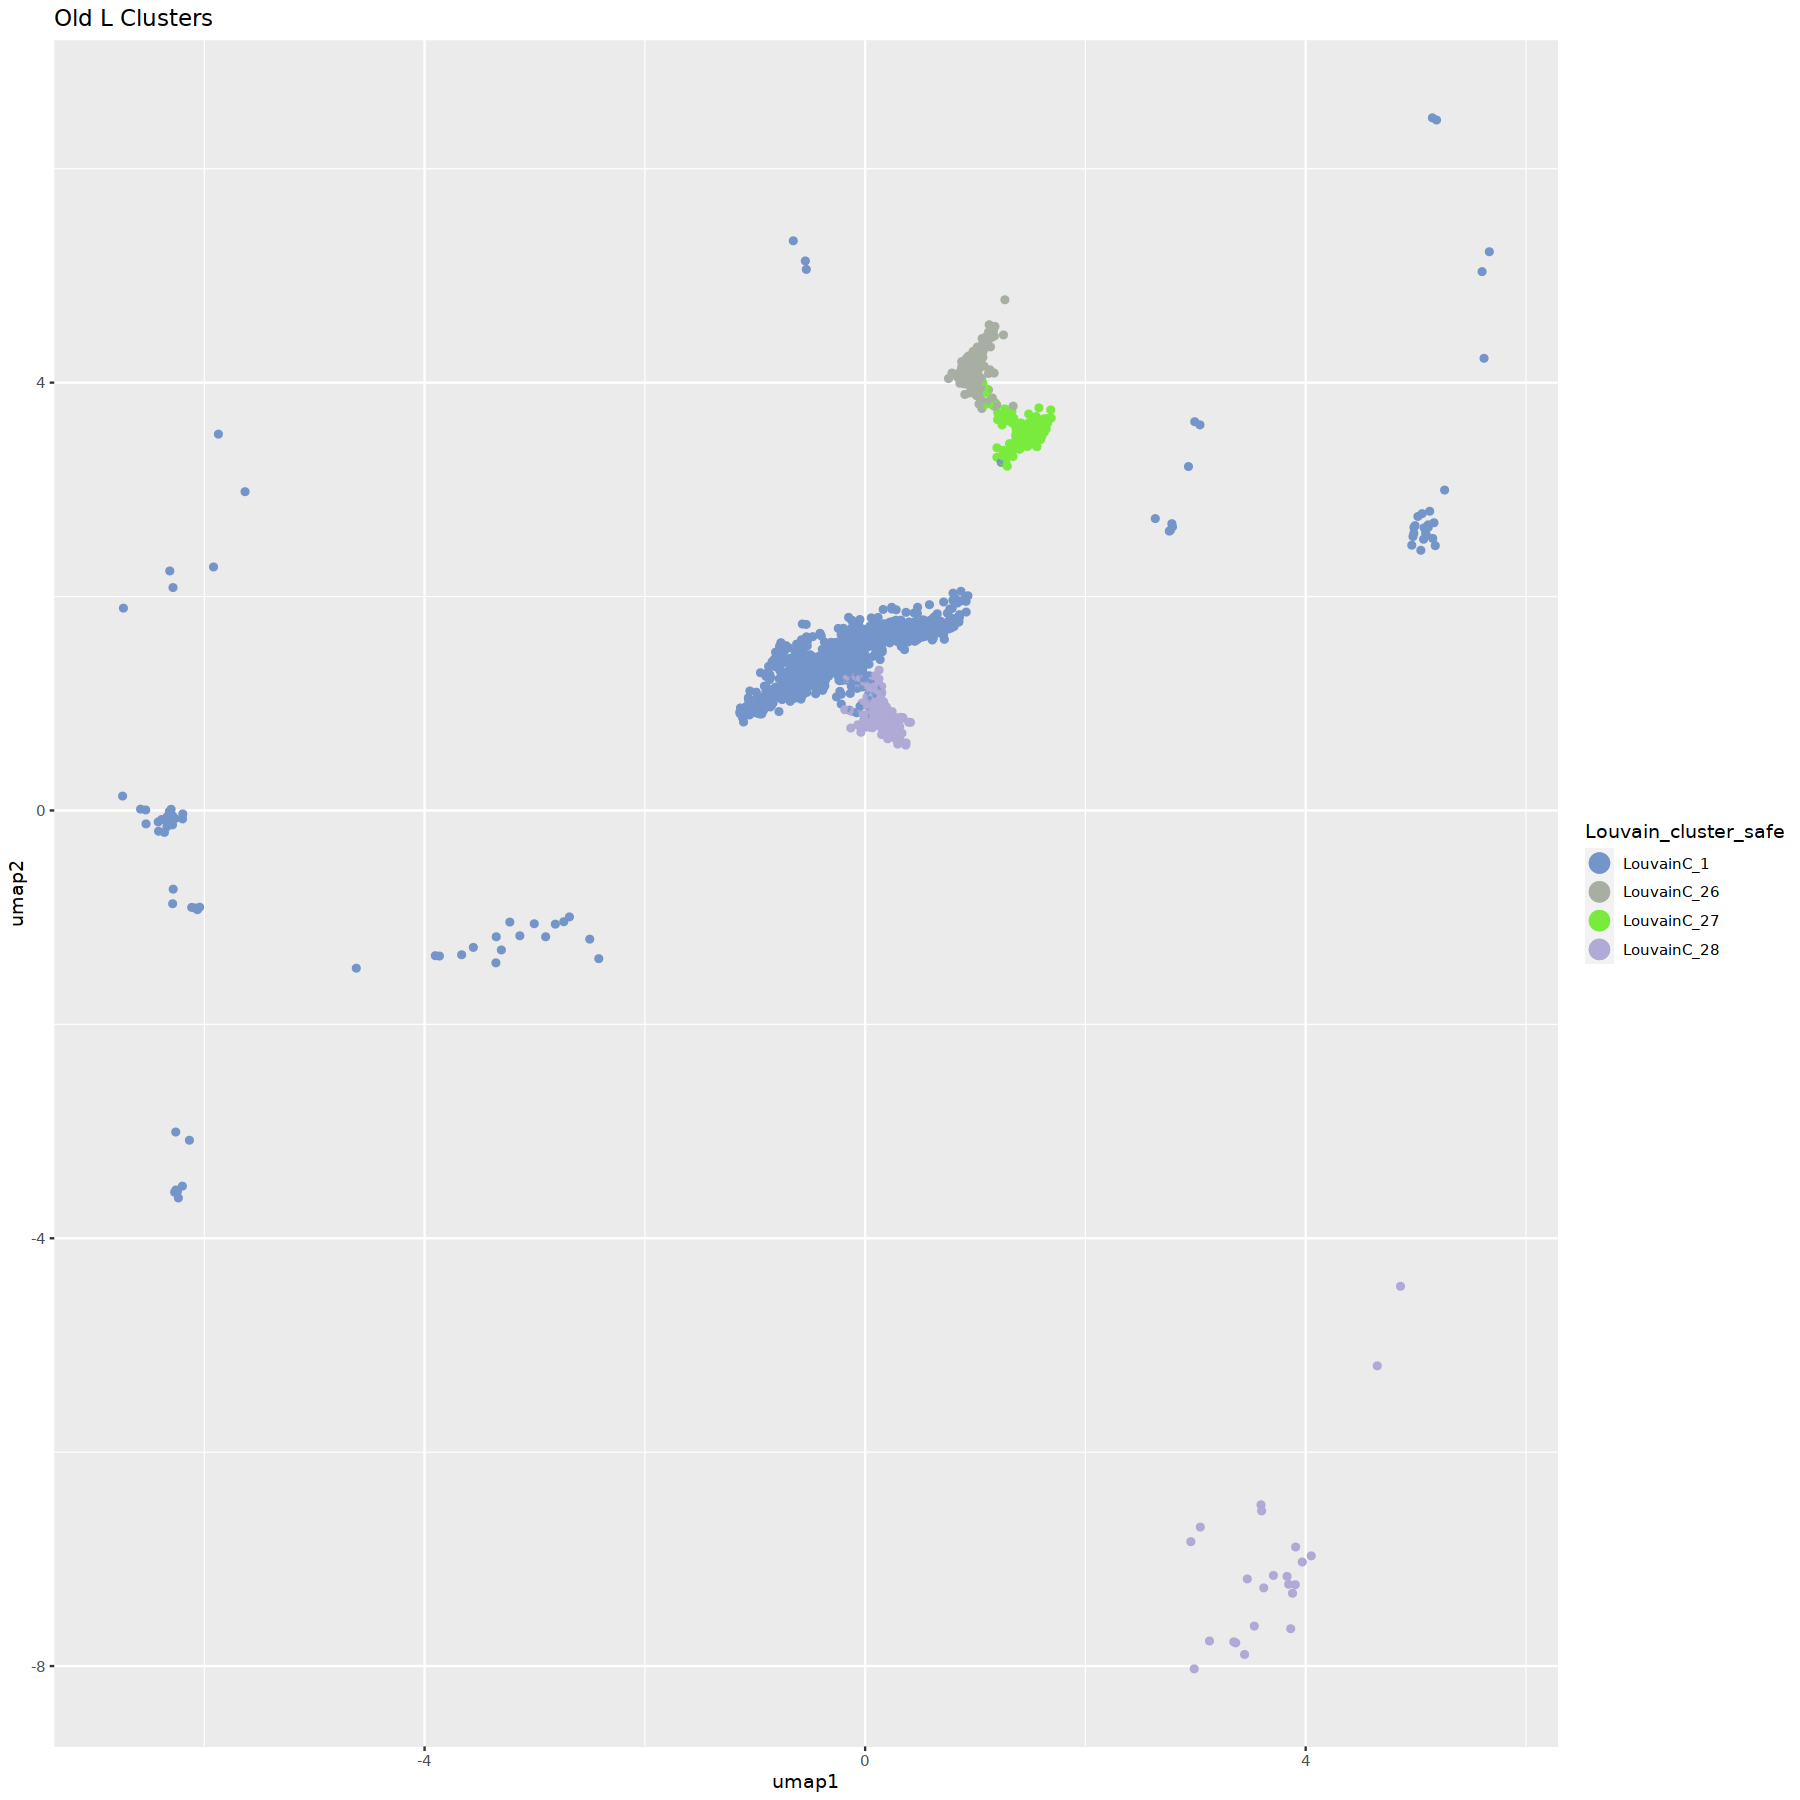

In [28]:
# Re-clustering sievee elements and companion cells

sb.loaded_socrates_data.LC1 <- loaded_socrates_data
cleaned_cluster_meta <- sb.loaded_socrates_data.LC1$Clusters  %>% 
        group_by(LouvainClusters)  %>% 
        mutate(Louvain_cluster_safe = str_c("LouvainC_", LouvainClusters))
    
sb.loaded_socrates_data.LC1$Clusters <- cleaned_cluster_meta

library(cowplot)
library(randomcoloR)
options(repr.plot.width=15, repr.plot.height=15)
other <- randomcoloR::distinctColorPalette(k = 55)
other <- sample(other)


Sb.subcluster.LC1 <- Sb.subcluster

clusters <- c("LouvainC_26", "LouvainC_27", "LouvainC_28", "LouvainC_1")

#c("LouvainC_18","LouvainC_5","LouvainC_7","LouvainC_32",
#  "LouvainC_24","LouvainC_21","LouvainC_8","LouvainC_20","LouvainC_23")

sb.loaded_socrates_data.LC1$Clusters  %>% 
    dplyr::filter(Louvain_cluster_safe %in% clusters) %>% 
    group_by(Louvain_cluster_safe) %>% 
    ggplot(., aes(umap1, umap2, color = Louvain_cluster_safe)) + geom_point() +
 scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8) + ggtitle("Old L Clusters")

chosen_subcluster <- sb.loaded_socrates_data.LC1$Clusters %>% 
    filter(Louvain_cluster_safe %in% clusters)

meta_df <- as.data.frame(chosen_subcluster)
rownames(meta_df) <- meta_df$cellID
Sb.subcluster.LC1$meta <- meta_df
Sb.subcluster.LC1$meta.v3 <- meta_df



Sb.subcluster.LC1$acr <- read.table("/scratch/jpm73279/comparative_single_cell/07.call.ACRs/Sb_peak_calls/Sb.peaks/Sb.cluster_peaks.500bp_peaks.bed")

Sb.subcluster.LC1 <- generateMatrix(Sb.subcluster.LC1, 
                                              filtered=FALSE,
                                              peaks = TRUE,
                                              verbose=TRUE)


## Generate Sparse Matrix
Sb.subcluster.LC1 <- convertSparseData(Sb.subcluster.LC1, verbose = TRUE)

In [38]:
# clean sparse counts matrix ---------------------------------------------
Sb.subcluster.LC1.clean <- cleanData(Sb.subcluster.LC1, 
                     min.t=0.001,  # minimum feature frequency across cells
                     max.t =.001,
                     verbose=T)

   * Input: cells = 1703 | peaks = 80004

   * Filtered: cells = 1698 | peaks = 79235



 - non-linear dimensionality reduction with UMAP ...

13:24:20 UMAP embedding parameters a = 1.577 b = 0.8951

13:24:20 Read 1703 rows and found 30 numeric columns

13:24:20 Using Annoy for neighbor search, n_neighbors = 30

13:24:20 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:24:21 Writing NN index file to temp file /tmp/RtmpNM2R3f/file38e4025ff5843

13:24:21 Searching Annoy index using 16 threads, search_k = 3000

13:24:21 Annoy recall = 100%

13:24:24 Commencing smooth kNN distance calibration using 16 threads

13:24:27 Initializing from normalized Laplacian + noise

13:24:27 Commencing optimization for 500 epochs, with 88402 positive edges

13:24:37 Optimization finished



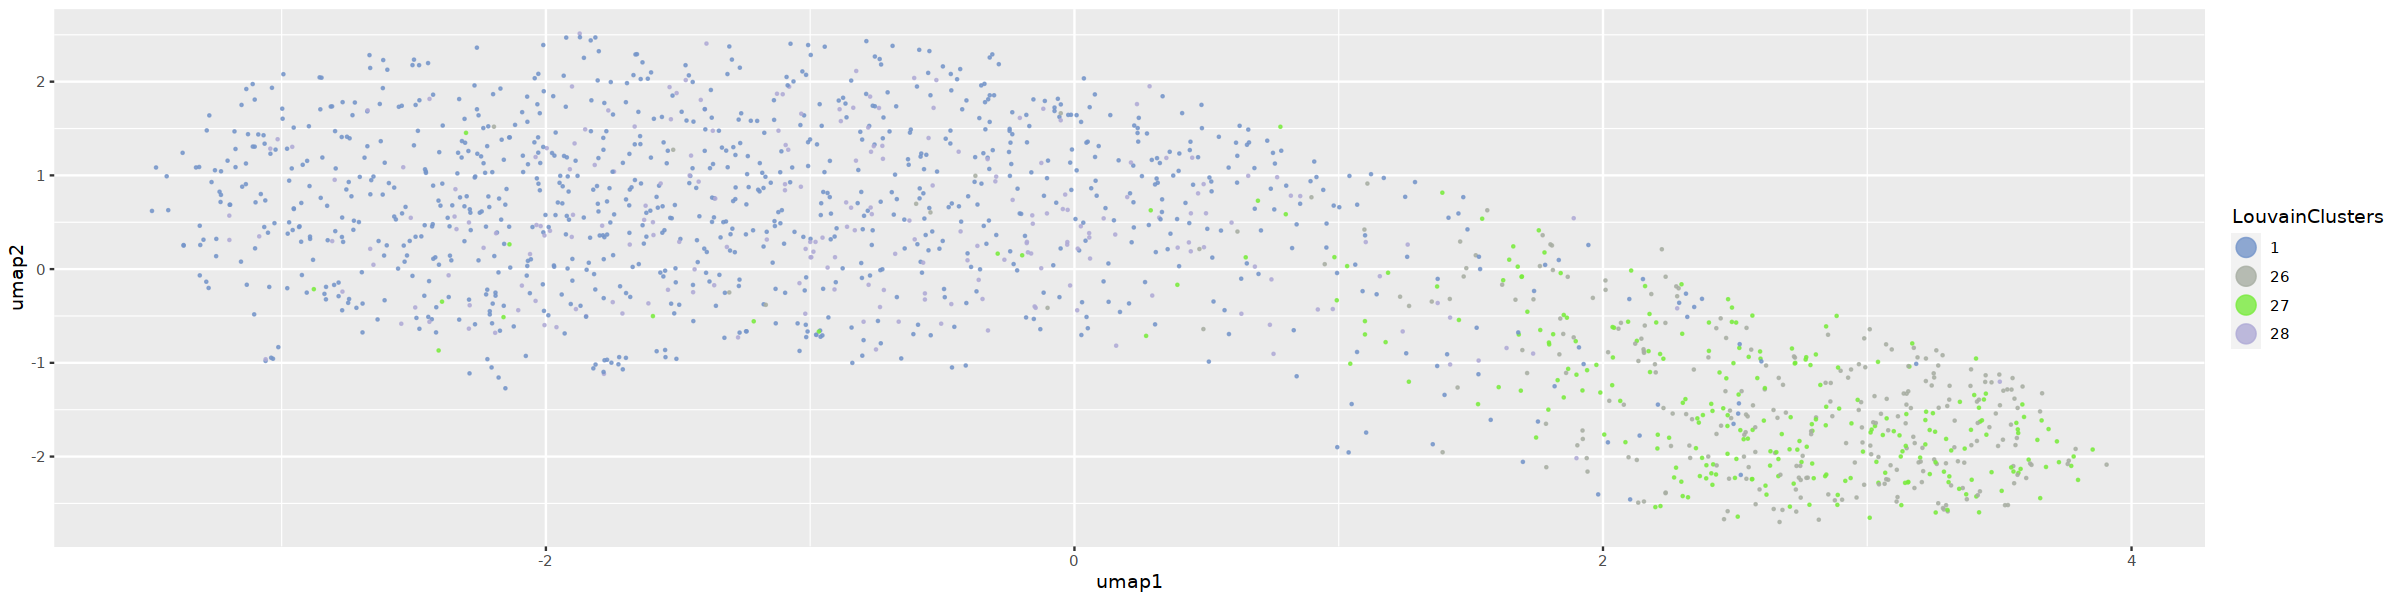

In [39]:
# normalize with TFIDF ---------------------------------------------------
Sb.subcluster.LC1.tfidf <- tfidf(Sb.subcluster.LC1)

# project with NMF -------------------------------------------------------
Sb.subcluster.LC1.tfidf <- reduceDims(Sb.subcluster.LC1.tfidf,
                      method="SVD", 
                      n.pcs=30, 
                      svd_slotName="SVD")

# reduce to 2-dimensions with UMAP ---------------------------------------
Sb.subcluster.LC1.tfidf <- projectUMAP(Sb.subcluster.LC1.tfidf, 
                       verbose=T,
                       k.near=30,
                       m.dist=0.1,
                       svd_slotName="SVD")


ggplot(Sb.subcluster.LC1.tfidf$meta, aes(x=umap1, y = umap2, color = LouvainClusters)) +
  scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8)

 - filtering outliers in UMAP manifold (z-score e.thresh = 3) ...

 - creating seurat object for graph-based clustering ...

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1680
Number of edges: 193741

Running Louvain algorithm...
Maximum modularity in 100 random starts: 0.2145
Number of communities: 7
Elapsed time: 3 seconds


 - finished graph-based clustering ...

 - filtering clusters with low cell/read counts ...



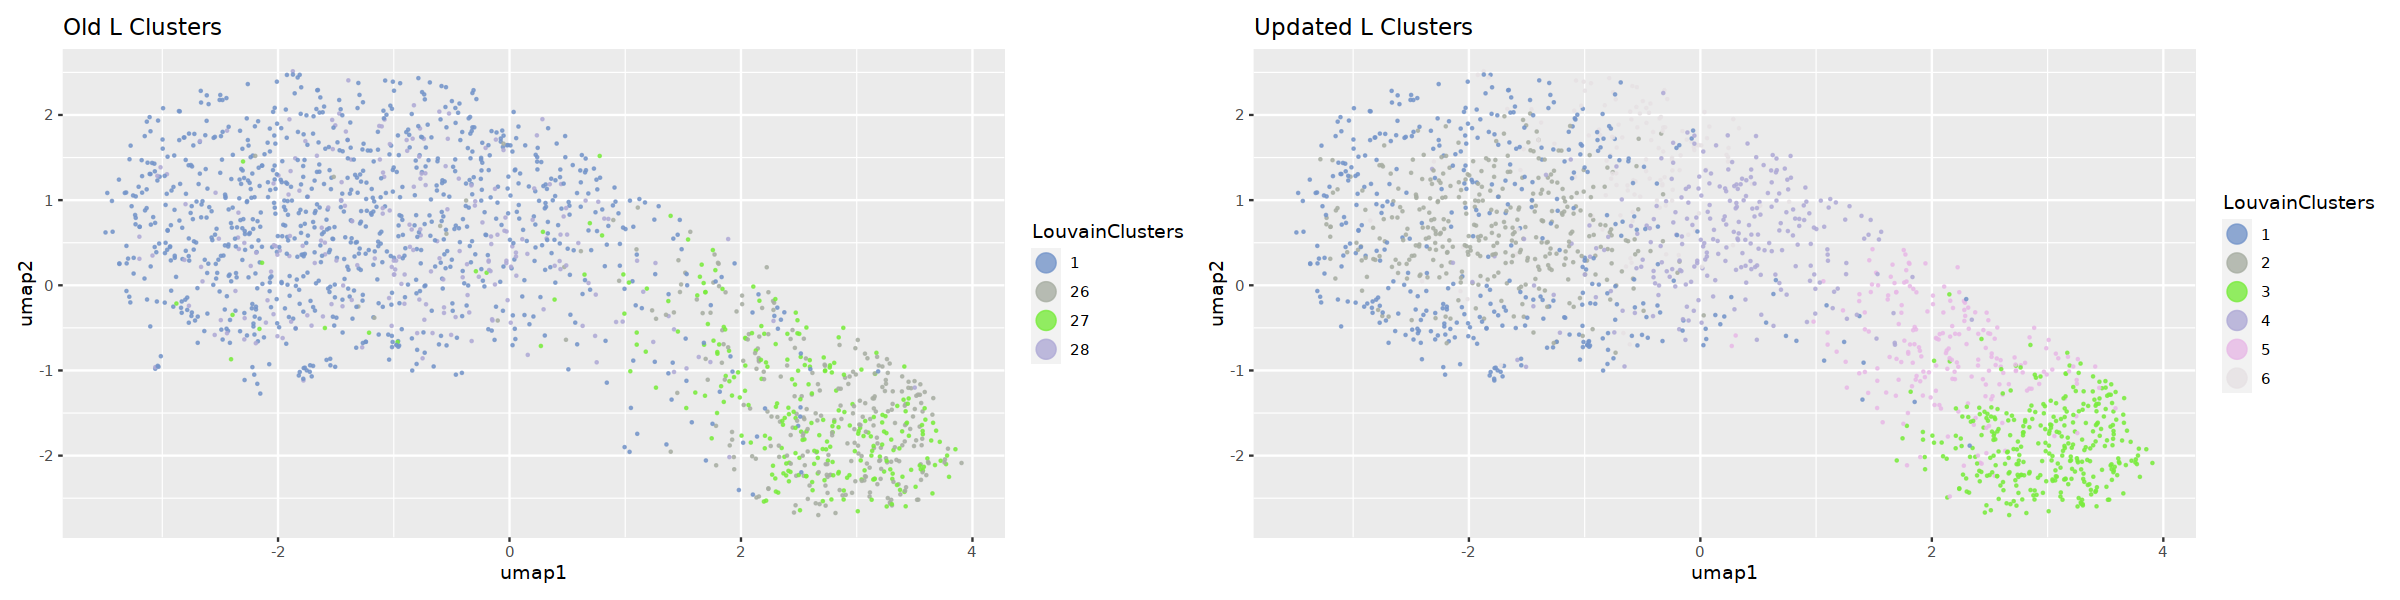

In [40]:
# identify clusters using neighborhood graph -----------------------------
Sb.subcluster.LC1.tfidf.cluster <- callClusters(Sb.subcluster.LC1.tfidf, 
                        res=2,
                        k.near = 30,
                        min.reads=10,
                        verbose=T,
                        svd_slotName= "SVD",
                        cluster_slotName="sub_cluster",
                        cleanCluster=FALSE)


options(repr.plot.width=20, repr.plot.height=5)

old_clusters <- ggplot(Sb.subcluster.LC1.tfidf.cluster$meta, aes(x=umap1, y = umap2, color = LouvainClusters)) +
  scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8)+ ggtitle("Old L Clusters")

new_clusters <- ggplot(Sb.subcluster.LC1.tfidf.cluster$sub_cluster, aes(x=umap1, y = umap2, color = LouvainClusters)) +
  scale_colour_manual(values=other)  + guides(colour = guide_legend(override.aes = list(size=5))) + 
 geom_point(size = .25, alpha = .8) + ggtitle("Updated L Clusters")


old_clusters + new_clusters 

In [42]:
### Kernal Corrupted to just linked to the previosly run gene body accessability calculations
Sb.subcluster.companion_cells.tfidf.cluster.cluster <- Sb.subcluster.LC1.tfidf.cluster
Sb.subcluster.companion_cells.tfidf.cluster.cluster$acr_counts_raw <- "/scratch/jpm73279/comparative_single_cell/02.QC_clustering/sorghum_bicolor/clustering/Sb.gene_counts.output"
## Execute Annotation Attempt #1

library(presto)
Sb.subcluster.companion_cells.tfidf.cluster.cluster <- run_presto(Sb.subcluster.companion_cells.tfidf.cluster.cluster,
           meta_slot = "sub_cluster",
           counts_raw = "acr_counts_raw",
           cluster_name = "LouvainClusters")



grabbed_top_marker_per_cluster <- top_markers(Sb.subcluster.companion_cells.tfidf.cluster.cluster$presto_marker, 200)

represented_marker_lst <- list()
for (i in unique(Sb.subcluster.companion_cells.tfidf.cluster.cluster$sub_cluster$LouvainClusters)) {
    
    make_set <- setNames("geneID",i) 
    markers_present_in_presto <- left_join(grabbed_top_marker_per_cluster, 
    marker_list_sb, by = make_set)  %>% 
    dplyr::filter(is.na(chr) != TRUE)  %>% 
    dplyr::select(rank, i, chr:tissue) %>% 
    dplyr::rename("geneID" = i)
    
    represented_marker_lst[[i]] <- markers_present_in_presto
}
                 
represented_marker_lst

# A tibble: 6 × 14
  cellID      total    tss   acrs  ptmt nSites log10nSites sampleID  umap1 umap2
  <chr>       <dbl>  <dbl>  <dbl> <dbl>  <dbl>       <dbl> <chr>     <dbl> <dbl>
1 BC:Z:GCCA… 193716 115473 154235     0  30754        4.49 rep1      0.519 0.830
2 BC:Z:CGAT… 159908  50092  29336     0  15761        4.20 rep1     -2.24  0.615
3 BC:Z:TTAG…  97214  55597  66879     0  19633        4.29 rep1      0.854 0.697
4 BC:Z:ACAG…  85372  44652  47133     0  16224        4.21 rep1      0.394 1.05 
5 BC:Z:ACAG…  76967  29710  25436     0  11680        4.07 rep1     -0.580 1.23 
6 BC:Z:ACAG…  62553  24175  15366     0   8289        3.92 rep1     -2.23  0.453
# … with 4 more variables: doubletscore <dbl>, d.type <chr>,
#   LouvainClusters <fct>, Louvain_cluster_safe <chr>
# A tibble: 6 × 3
  gene_name        barcode                                         accessability
  <chr>            <chr>                                                   <dbl>
1 Sobic.001G125600 BC:Z:ACAGTGCTTGTATG

$`4`
# A tibble: 4 × 8
   rank geneID                        chr      start      end name  type  tissue
  <int> <chr>                         <chr>    <dbl>    <dbl> <chr> <chr> <chr> 
1     5 Sobic.002G207900              Chr02 61233338 61239219 gl1   epid… axill…
2    23 Sorbiv5.1_pg15362.valid.m24.g Chr03 63610236 63623676 cah1  meso… axill…
3   147 Sobic.004G062500              Chr04  5115447  5120789 bm5   vasc… axill…
4   198 Sorbiv5.1_pg14938.valid.m7.g  Chr03  8560607  8567782 ocl1  prot… axill…

$`2`
# A tibble: 0 × 8
# … with 8 variables: rank <int>, geneID <chr>, chr <chr>, start <dbl>,
#   end <dbl>, name <chr>, type <chr>, tissue <chr>

$`6`
# A tibble: 5 × 8
   rank geneID                        chr      start      end name  type  tissue
  <int> <chr>                         <chr>    <dbl>    <dbl> <chr> <chr> <chr> 
1     5 Sobic.002G207900              Chr02 61233338 61239219 gl1   epid… axill…
2   131 Sorbiv5.1_pg15362.valid.m24.g Chr03 63610236 63623676 cah1  meso… axill…
3   141 Sorbiv5.1_pg18563.valid.m1.g  Chr07  6900132  6906079 ocl5  prot… axill…
4   145 Sobic.001G157400              Chr01 12875142 12881054 ZmHB… pith… axill…
5   173 Sorbiv5.1_pg7967.valid.m15.g  Chr06 58346770 58354051 pdf2  prot… axill…

$`5`
# A tibble: 1 × 8
   rank geneID           chr      start      end name  type               tissue
  <int> <chr>            <chr>    <dbl>    <dbl> <chr> <chr>              <chr> 
1    61 Sobic.001G537300 Chr01 84195608 84203525 rld1  SAM,leaf_primordi… axill…

$`3`
# A tibble: 4 × 8
   rank geneID                       chr      start      end name   type  tissue
  <int> <chr>                        <chr>    <dbl>    <dbl> <chr>  <chr> <chr> 
1    41 Sobic.001G488700             Chr01 80047831 80054246 sut1_… comp… axill…
2    56 Sorbiv5.1_pg26238.m1.g       Chr02 19991876 19997282 hp2    prot… axill…
3   114 Sorbiv5.1_pg26255.valid.m1.g Chr02 13930257 13934220 acl5   xylem axill…
4   173 Sorbiv5.1_pg1793.valid.m1.g  Chr01 13056142 13064330 bhlh43 bund… axill…

$`1`
# A tibble: 0 × 8
# … with 8 variables: rank <int>, geneID <chr>, chr <chr>, start <dbl>,
#   end <dbl>, name <chr>, type <chr>, tissue <chr>